The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
(683, 11) (9, 500) (1, 500) (9, 182) (1, 182)
Cost after iteration 0: 0.673967
Cost after iteration 500: 0.113924


C:\Users\Kjæreng\AppData\Local\Temp\ipykernel_10288\4126233654.py:139: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print ("Cost after iteration %i: %f" %(i, loss))


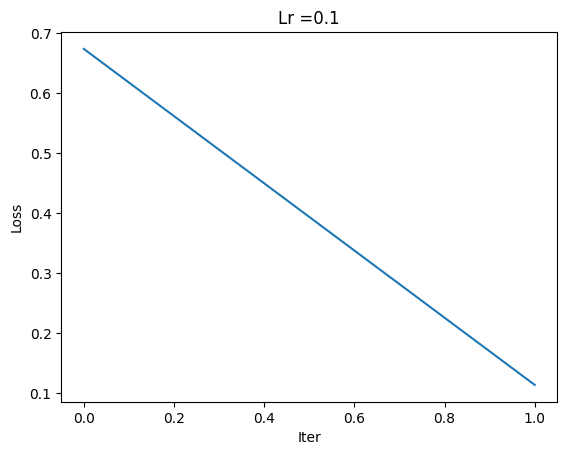

Acc: 0.9600000000000003
Acc: 1.0
Acc: 0.9600000000000003


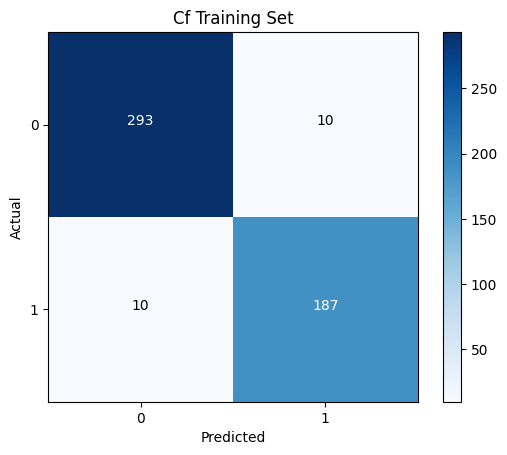

Acc: 0.9600000000000003


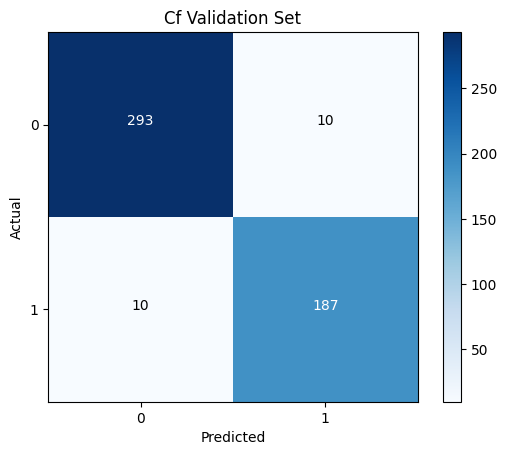

Acc: 0.9500000000000003


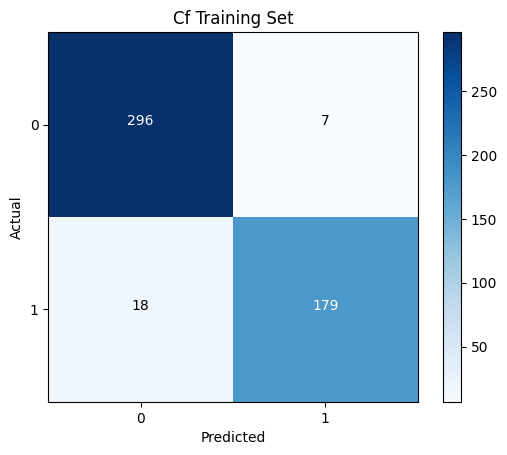

Acc: 0.9500000000000003


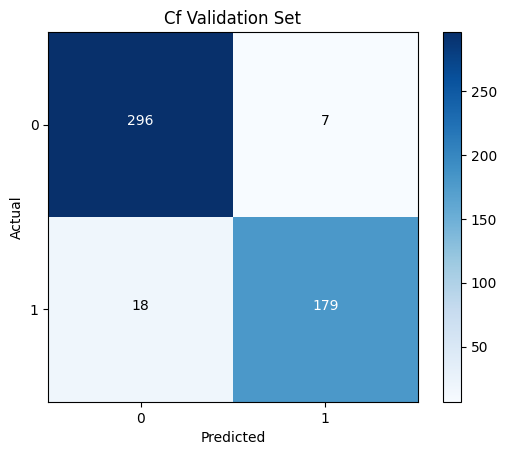

Acc: 0.9240000000000003


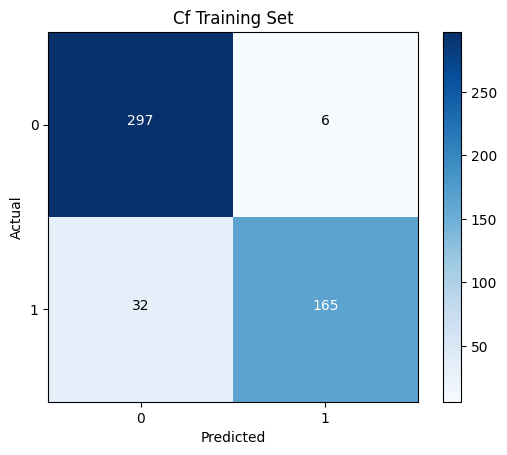

Acc: 0.9240000000000003


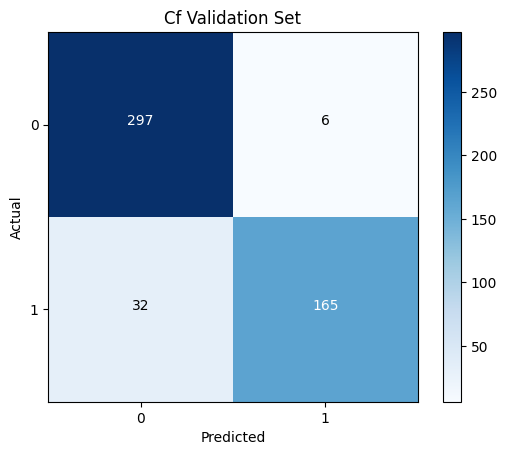


y [[0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 1]]

yh [[0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 1]] 



In [120]:
#Classification analysis of a Binary Classification Problem using the Cross-Entropy Cost Function and the sigmoid activation function,
#using the Wisconsin Breast Cancer Dataset(Using Analytical Expressions for the Gradients), results explained in a Confusion Matrix.
#The code is implemented with an emphasis on object-oriented programming with emphasis on functions, the code expands to usage of different
#learning rates and L2 regularization, to try to see whether it is the learning rates or L2 regularization that creates the biggest
#effects, it later has cross-validation, and a comparison with Scikit-Learn. Of course,
#the same functionality has also been implemented using Logistic Regression:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import itertools

np.set_printoptions(threshold=np.inf)

%matplotlib inline
%load_ext autoreload
%autoreload 2

def plotCf(a,b,t):
    cf =confusion_matrix(a,b)
    plt.imshow(cf,cmap=plt.cm.Blues,interpolation='nearest')
    plt.colorbar()
    plt.title(t)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    tick_marks = np.arange(len(set(a))) # length of classes
    class_labels = ['0','1']
    plt.xticks(tick_marks,class_labels)
    plt.yticks(tick_marks,class_labels)
    thresh = cf.max() / 2.
    for i,j in itertools.product(range(cf.shape[0]),range(cf.shape[1])):
        plt.text(j,i,format(cf[i,j],'d'),horizontalalignment='center',color='white' if cf[i,j] >thresh else 'black')
    plt.show();

def Sigmoid(Z):
    return 1/(1+np.exp(-Z))

def Relu(Z):
    return np.maximum(0,Z)

def dRelu2(dZ, Z):    
    dZ[Z <= 0] = 0    
    return dZ

def dRelu(x):
    x[x<=0] = 0
    x[x>0] = 1
    return x

def dSigmoid(Z):
    s = 1/(1+np.exp(-Z))
    dZ = s * (1-s)
    return dZ

class dlnet:
    def __init__(self, x, y):
        self.debug = 0;
        self.X=x
        self.Y=y
        self.Yh=np.zeros((1,self.Y.shape[1])) 
        self.L=2
        self.dims = [9, 15, 1] 
        self.param = {}
        self.ch = {}
        self.grad = {}
        self.loss = []
        self.lr=0.003
        self.sam = self.Y.shape[1]
        self.threshold=0.5
        
    def nInit(self):    
        np.random.seed(1)
        self.param['W1'] = np.random.randn(self.dims[1], self.dims[0]) / np.sqrt(self.dims[0]) 
        self.param['b1'] = np.zeros((self.dims[1], 1))        
        self.param['W2'] = np.random.randn(self.dims[2], self.dims[1]) / np.sqrt(self.dims[1]) 
        self.param['b2'] = np.zeros((self.dims[2], 1))                
        return 

    def forward(self):    
        Z1 = self.param['W1'].dot(self.X) + self.param['b1'] 
        A1 = Relu(Z1)
        self.ch['Z1'],self.ch['A1']=Z1,A1
        
        Z2 = self.param['W2'].dot(A1) + self.param['b2']  
        A2 = Sigmoid(Z2)
        self.ch['Z2'],self.ch['A2']=Z2,A2

        self.Yh=A2
        loss=self.nloss(A2)
        return self.Yh, loss

    def nloss(self,Yh):
        loss = (1./self.sam) * (-np.dot(self.Y,np.log(Yh).T) - np.dot(1-self.Y, np.log(1-Yh).T))    
        return loss

    def backward(self):
        dLoss_Yh = - (np.divide(self.Y, self.Yh ) - np.divide(1 - self.Y, 1 - self.Yh))    
        
        dLoss_Z2 = dLoss_Yh * dSigmoid(self.ch['Z2'])    
        dLoss_A1 = np.dot(self.param["W2"].T,dLoss_Z2)
        dLoss_W2 = 1./self.ch['A1'].shape[1] * np.dot(dLoss_Z2,self.ch['A1'].T)
        dLoss_b2 = 1./self.ch['A1'].shape[1] * np.dot(dLoss_Z2, np.ones([dLoss_Z2.shape[1],1])) 
                            
        dLoss_Z1 = dLoss_A1 * dRelu(self.ch['Z1'])        
        dLoss_A0 = np.dot(self.param["W1"].T,dLoss_Z1)
        dLoss_W1 = 1./self.X.shape[1] * np.dot(dLoss_Z1,self.X.T)
        dLoss_b1 = 1./self.X.shape[1] * np.dot(dLoss_Z1, np.ones([dLoss_Z1.shape[1],1]))  
        
        self.param["W1"] = self.param["W1"] - self.lr * dLoss_W1
        self.param["b1"] = self.param["b1"] - self.lr * dLoss_b1
        self.param["W2"] = self.param["W2"] - self.lr * dLoss_W2
        self.param["b2"] = self.param["b2"] - self.lr * dLoss_b2
        
        return

    def pred(self,x, y):  
        self.X=x
        self.Y=y
        comp = np.zeros((1,x.shape[1]))
        pred, loss= self.forward()    
    
        for i in range(0, pred.shape[1]):
            if pred[0,i] > self.threshold: comp[0,i] = 1
            else: comp[0,i] = 0
    
        print("Acc: " + str(np.sum((comp == y)/x.shape[1])))
        
        return comp
    
    def gd(self,X, Y, iter = 3000):
        np.random.seed(1)                         
    
        self.nInit()
    
        for i in range(0, iter):
            Yh, loss=self.forward()
            self.backward()
        
            if i % 500 == 0:
                print ("Cost after iteration %i: %f" %(i, loss))
                self.loss.append(loss)

        plt.plot(np.squeeze(self.loss))
        plt.ylabel('Loss')
        plt.xlabel('Iter')
        plt.title("Lr =" + str(self.lr))
        plt.show()
    
        return 

df = pd.read_csv('data1.csv',header=None)
df = df[~df[6].isin(['?'])]
df = df.astype(float)
df.iloc[:,10].replace(2, 0,inplace=True)
df.iloc[:,10].replace(4, 1,inplace=True)

df.head(3)
scaled_df=df
names = df.columns[0:10]
scaler = MinMaxScaler() 
scaled_df = scaler.fit_transform(df.iloc[:,0:10]) 
scaled_df = pd.DataFrame(scaled_df, columns=names)

x=scaled_df.iloc[0:500,1:10].values.transpose()
y=df.iloc[0:500,10:].values.transpose()

xval=scaled_df.iloc[501:683,1:10].values.transpose()
yval=df.iloc[501:683,10:].values.transpose()

print(df.shape, x.shape, y.shape, xval.shape, yval.shape)

nn = dlnet(x,y)
nn.lr=0.1
nn.dims = [9, 15, 1] 

nn.gd(x, y, iter = 1000)

pred_train = nn.pred(x, y)
pred_test = nn.pred(xval, yval)

nn.threshold=0.5

nn.X,nn.Y=x, y 
target = np.around(np.squeeze(y), decimals=0).astype(int)
predicted = np.around(np.squeeze(nn.pred(x, y)), decimals=0).astype(int)
plotCf(target,predicted,'Cf Training Set')

nn.X,nn.Y=xval, yval 
target = np.around(np.squeeze(y), decimals=0).astype(int)
predicted = np.around(np.squeeze(nn.pred(x, y)), decimals=0).astype(int)
plotCf(target,predicted,'Cf Validation Set')

nn.threshold=0.7

nn.X,nn.Y=x, y 
target = np.around(np.squeeze(y), decimals=0).astype(int)
predicted = np.around(np.squeeze(nn.pred(x, y)), decimals=0).astype(int)
plotCf(target,predicted,'Cf Training Set')

nn.X,nn.Y=xval, yval 
target = np.around(np.squeeze(y), decimals=0).astype(int)
predicted = np.around(np.squeeze(nn.pred(x, y)), decimals=0).astype(int)
plotCf(target,predicted,'Cf Validation Set')

nn.threshold=0.9

nn.X,nn.Y=x, y 
target = np.around(np.squeeze(y), decimals=0).astype(int)
predicted = np.around(np.squeeze(nn.pred(x, y)), decimals=0).astype(int)
plotCf(target,predicted,'Cf Training Set')

nn.X,nn.Y=xval, yval 
target = np.around(np.squeeze(y), decimals=0).astype(int)
predicted = np.around(np.squeeze(nn.pred(x, y)), decimals=0).astype(int)
plotCf(target,predicted,'Cf Validation Set')

nn.X,nn.Y=xval, yval 
yvalh, loss = nn.forward()
print("\ny",np.around(yval[:,0:50,], decimals=0).astype(int))       
print("\nyh",np.around(yvalh[:,0:50,], decimals=0).astype(int),"\n") 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
(683, 11) (9, 500) (1, 500) (9, 182) (1, 182)
Cost after iteration 0: 0.673967


C:\Users\Kjæreng\AppData\Local\Temp\ipykernel_8336\3004175372.py:146: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print ("Cost after iteration %i: %f" %(i, loss))


Cost after iteration 500: 0.113924


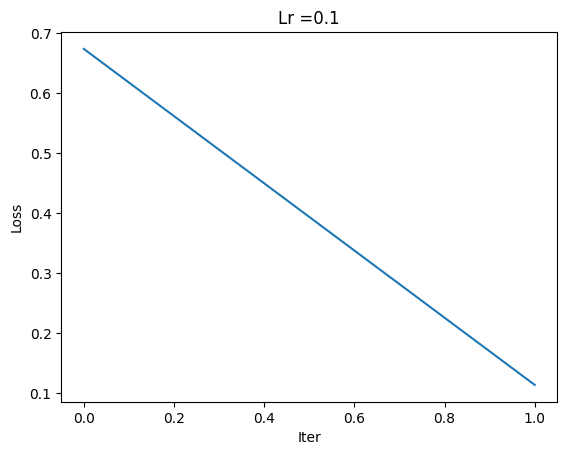

Acc: 0.9600000000000003
Acc: 1.0
Acc: 0.9600000000000003


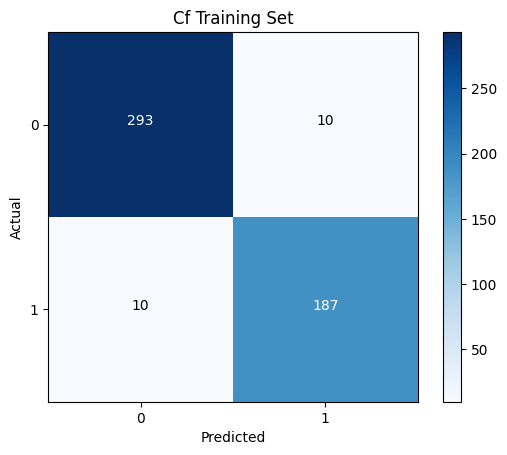

Acc: 0.9600000000000003


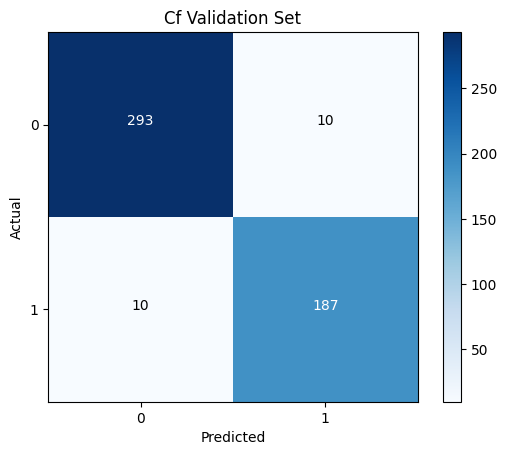

Acc: 0.9500000000000003


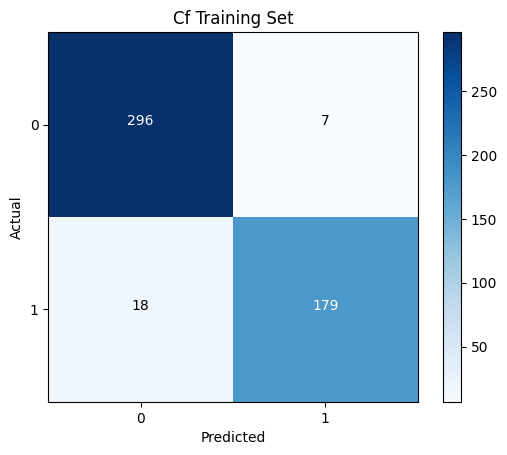

Acc: 0.9500000000000003


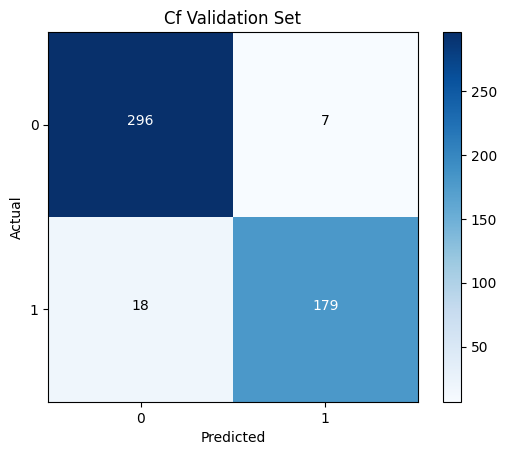

Acc: 0.9240000000000003


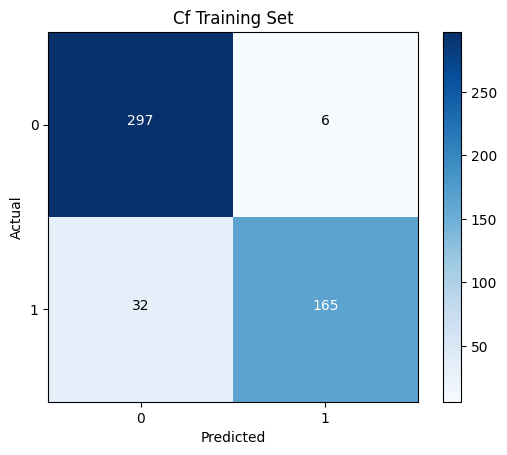

Acc: 0.9240000000000003


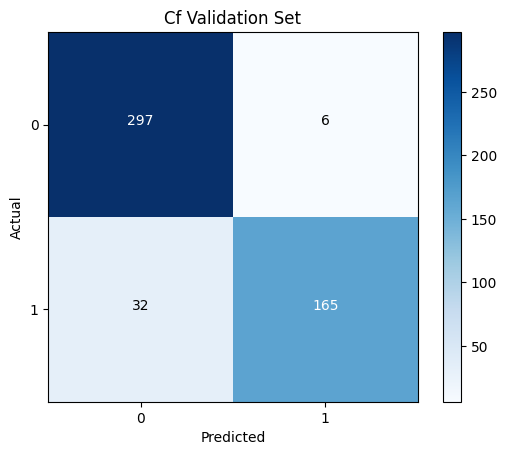


y [[0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 1]]

yh [[0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 1]] 



In [88]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import itertools

np.set_printoptions(threshold=np.inf)

%matplotlib inline
%load_ext autoreload
%autoreload 2

def plotCf(a,b,t):
    cf =confusion_matrix(a,b)
    plt.imshow(cf,cmap=plt.cm.Blues,interpolation='nearest')
    plt.colorbar()
    plt.title(t)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    tick_marks = np.arange(len(set(a))) # length of classes
    class_labels = ['0','1']
    plt.xticks(tick_marks,class_labels)
    plt.yticks(tick_marks,class_labels)
    thresh = cf.max() / 2.
    for i,j in itertools.product(range(cf.shape[0]),range(cf.shape[1])):
        plt.text(j,i,format(cf[i,j],'d'),horizontalalignment='center',color='white' if cf[i,j] >thresh else 'black')
    plt.show();

def Sigmoid(Z):
    return 1/(1+np.exp(-Z))

def Relu(Z):
    return np.maximum(0,Z)

def dRelu2(dZ, Z):    
    dZ[Z <= 0] = 0    
    return dZ

def dRelu(x):
    x[x<=0] = 0
    x[x>0] = 1
    return x

def dSigmoid(Z):
    s = 1/(1+np.exp(-Z))
    dZ = s * (1-s)
    return dZ

class dlnet:
    def __init__(self, x, y):
        self.debug = 0;
        self.X=x
        self.Y=y
        self.Yh=np.zeros((1,self.Y.shape[1])) 
        self.L=2
        self.dims = [9, 15, 1]
        self.dropout_prob = 1
        self.param = {}
        self.ch = {}
        self.grad = {}
        self.loss = []
        self.lr=0.003
        self.sam = self.Y.shape[1]
        self.threshold=0.5
        
    def nInit(self):    
        np.random.seed(1)
        self.param['W1'] = np.random.randn(self.dims[1], self.dims[0]) / np.sqrt(self.dims[0]) 
        self.param['b1'] = np.zeros((self.dims[1], 1))        
        self.param['W2'] = np.random.randn(self.dims[2], self.dims[1]) / np.sqrt(self.dims[1]) 
        self.param['b2'] = np.zeros((self.dims[2], 1))                
        return 

    def forward(self):    
        Z1 = self.param['W1'].dot(self.X) + self.param['b1'] 
        A1 = Relu(Z1)
        self.ch['Z1'],self.ch['A1']=Z1,A1
        
        Z2 = self.param['W2'].dot(A1) + self.param['b2']  
        A2 = Sigmoid(Z2)
        self.ch['Z2'],self.ch['A2']=Z2,A2

        A1 = Relu(Z1)
        D1 = (np.random.rand(*A1.shape) < self.dropout_prob) / self.dropout_prob
        A1 *= D1  # Apply dropout to A1
        self.ch['Z1'], self.ch['A1'], self.ch['D1'] = Z1, A1, D1

        self.Yh=A2
        loss=self.nloss(A2)
        return self.Yh, loss

    def nloss(self,Yh):
        loss = (1./self.sam) * (-np.dot(self.Y,np.log(Yh).T) - np.dot(1-self.Y, np.log(1-Yh).T))    
        return loss

    def backward(self):
        dLoss_Yh = - (np.divide(self.Y, self.Yh ) - np.divide(1 - self.Y, 1 - self.Yh))    
        
        dLoss_Z2 = dLoss_Yh * dSigmoid(self.ch['Z2'])    
        dLoss_A1 = np.dot(self.param["W2"].T,dLoss_Z2)
        dLoss_W2 = 1./self.ch['A1'].shape[1] * np.dot(dLoss_Z2,self.ch['A1'].T)
        dLoss_b2 = 1./self.ch['A1'].shape[1] * np.dot(dLoss_Z2, np.ones([dLoss_Z2.shape[1],1])) 
                            
        dLoss_Z1 = dLoss_A1 * dRelu(self.ch['Z1'])        
        dLoss_A0 = np.dot(self.param["W1"].T,dLoss_Z1)
        dLoss_W1 = 1./self.X.shape[1] * np.dot(dLoss_Z1,self.X.T)
        dLoss_b1 = 1./self.X.shape[1] * np.dot(dLoss_Z1, np.ones([dLoss_Z1.shape[1],1]))  

        dLoss_A1 *= self.ch['D1']  # Apply dropout gradient
        dLoss_Z1 = dLoss_A1 * dRelu(self.ch['Z1'])
        
        self.param["W1"] = self.param["W1"] - self.lr * dLoss_W1
        self.param["b1"] = self.param["b1"] - self.lr * dLoss_b1
        self.param["W2"] = self.param["W2"] - self.lr * dLoss_W2
        self.param["b2"] = self.param["b2"] - self.lr * dLoss_b2
        
        return

    def pred(self,x, y):  
        self.X=x
        self.Y=y
        comp = np.zeros((1,x.shape[1]))
        pred, loss= self.forward()    
    
        for i in range(0, pred.shape[1]):
            if pred[0,i] > self.threshold: comp[0,i] = 1
            else: comp[0,i] = 0
    
        print("Acc: " + str(np.sum((comp == y)/x.shape[1])))
        
        return comp
    
    def gd(self,X, Y, iter = 3000):
        np.random.seed(1)                         
    
        self.nInit()
    
        for i in range(0, iter):
            Yh, loss=self.forward()
            self.backward()
        
            if i % 500 == 0:
                print ("Cost after iteration %i: %f" %(i, loss))
                self.loss.append(loss)

        plt.plot(np.squeeze(self.loss))
        plt.ylabel('Loss')
        plt.xlabel('Iter')
        plt.title("Lr =" + str(self.lr))
        plt.show()
    
        return 

df = pd.read_csv('data1.csv',header=None)
df = df[~df[6].isin(['?'])]
df = df.astype(float)
df.iloc[:,10].replace(2, 0,inplace=True)
df.iloc[:,10].replace(4, 1,inplace=True)

df.head(3)
scaled_df=df
names = df.columns[0:10]
scaler = MinMaxScaler() 
scaled_df = scaler.fit_transform(df.iloc[:,0:10]) 
scaled_df = pd.DataFrame(scaled_df, columns=names)

x=scaled_df.iloc[0:500,1:10].values.transpose()
y=df.iloc[0:500,10:].values.transpose()

xval=scaled_df.iloc[501:683,1:10].values.transpose()
yval=df.iloc[501:683,10:].values.transpose()

print(df.shape, x.shape, y.shape, xval.shape, yval.shape)

nn = dlnet(x,y)
nn.lr=0.1
nn.dims = [9, 15, 1] 

nn.gd(x, y, iter = 1000)

pred_train = nn.pred(x, y)
pred_test = nn.pred(xval, yval)

nn.threshold=0.5

nn.X,nn.Y=x, y 
target = np.around(np.squeeze(y), decimals=0).astype(int)
predicted = np.around(np.squeeze(nn.pred(x, y)), decimals=0).astype(int)
plotCf(target,predicted,'Cf Training Set')

nn.X,nn.Y=xval, yval 
target = np.around(np.squeeze(y), decimals=0).astype(int)
predicted = np.around(np.squeeze(nn.pred(x, y)), decimals=0).astype(int)
plotCf(target,predicted,'Cf Validation Set')

nn.threshold=0.7

nn.X,nn.Y=x, y 
target = np.around(np.squeeze(y), decimals=0).astype(int)
predicted = np.around(np.squeeze(nn.pred(x, y)), decimals=0).astype(int)
plotCf(target,predicted,'Cf Training Set')

nn.X,nn.Y=xval, yval 
target = np.around(np.squeeze(y), decimals=0).astype(int)
predicted = np.around(np.squeeze(nn.pred(x, y)), decimals=0).astype(int)
plotCf(target,predicted,'Cf Validation Set')

nn.threshold=0.9

nn.X,nn.Y=x, y 
target = np.around(np.squeeze(y), decimals=0).astype(int)
predicted = np.around(np.squeeze(nn.pred(x, y)), decimals=0).astype(int)
plotCf(target,predicted,'Cf Training Set')

nn.X,nn.Y=xval, yval 
target = np.around(np.squeeze(y), decimals=0).astype(int)
predicted = np.around(np.squeeze(nn.pred(x, y)), decimals=0).astype(int)
plotCf(target,predicted,'Cf Validation Set')

nn.X,nn.Y=xval, yval 
yvalh, loss = nn.forward()
print("\ny",np.around(yval[:,0:50,], decimals=0).astype(int))       
print("\nyh",np.around(yvalh[:,0:50,], decimals=0).astype(int),"\n") 

In [85]:
#Classification analysis of a Binary Classification Problem using the Cross-Entropy Cost Function,
#using the Wisconsin Breast Cancer Dataset(Using Analytical Expressions for the Gradients), results explained in a Confusion Matrix, 
#this time using LeakyRELU:


ValueError: operands could not be broadcast together with shapes (1,500) (1,9) 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
(683, 11) (9, 500) (1, 500) (9, 182) (1, 182)
Cost after iteration 0: 0.673967


C:\Users\Kjæreng\AppData\Local\Temp\ipykernel_8336\163225787.py:149: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print ("Cost after iteration %i: %f" %(i, loss))


Cost after iteration 500: 0.113962


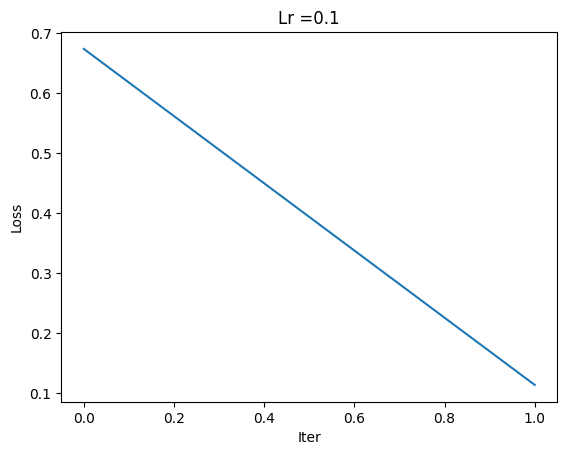

Acc: 0.9600000000000003
Acc: 1.0
Acc: 0.9600000000000003


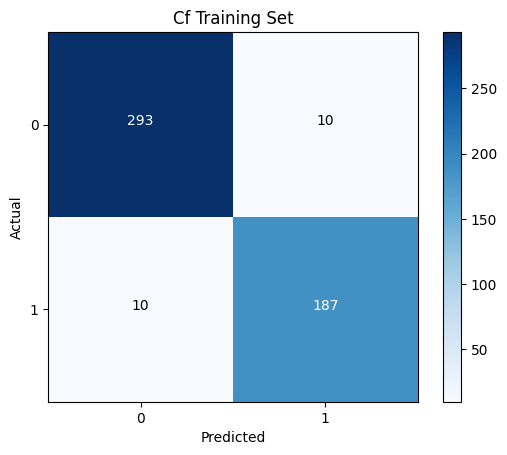

Acc: 0.9600000000000003


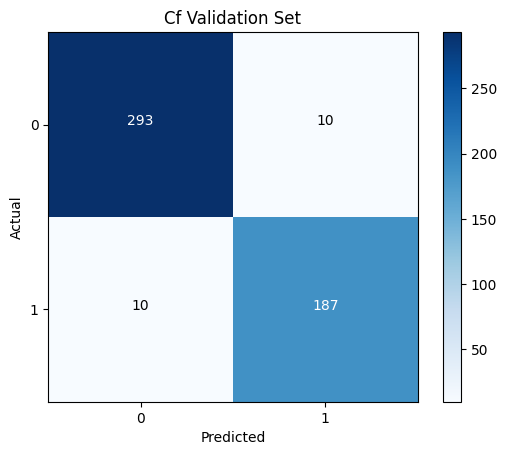

Acc: 0.9500000000000003


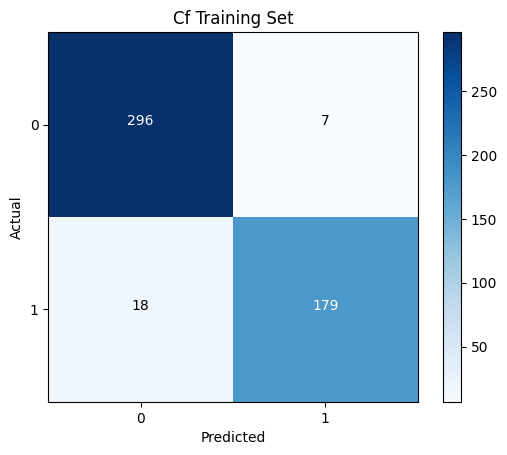

Acc: 0.9500000000000003


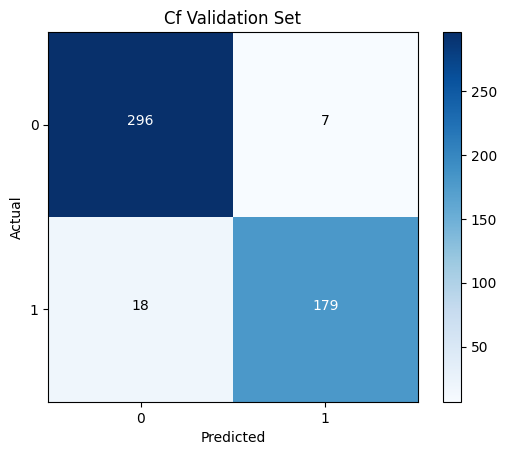

Acc: 0.9240000000000003


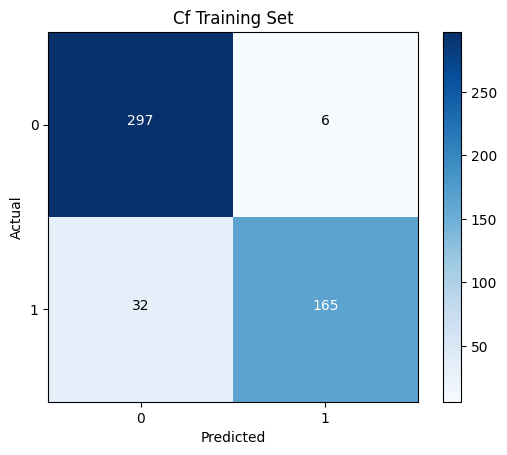

Acc: 0.9240000000000003


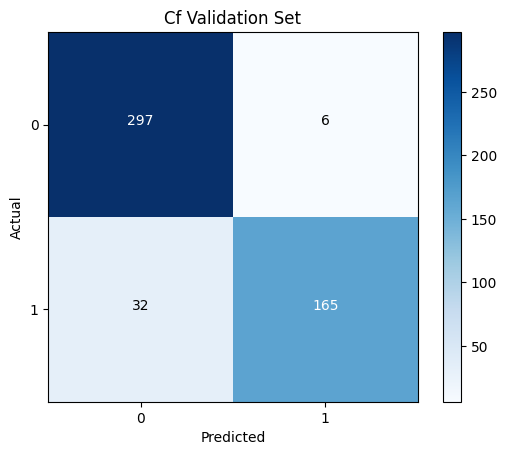


y [[0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 1]]

yh [[0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 1]] 



In [86]:
#Classification analysis of a Binary Classification Problem using the Cross-Entropy Cost Function,
#using the Wisconsin Breast Cancer Dataset(Using Analytical Expressions for the Gradients), results explained in a Confusion Matrix:
#Using LeakyRELU:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import itertools

np.set_printoptions(threshold=np.inf)

%matplotlib inline
%load_ext autoreload
%autoreload 2

def plotCf(a, b, t):
    cf = confusion_matrix(a, b)
    plt.imshow(cf, cmap=plt.cm.Blues, interpolation='nearest')
    plt.colorbar()
    plt.title(t)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    tick_marks = np.arange(len(set(a)))  # length of classes
    class_labels = ['0', '1']
    plt.xticks(tick_marks, class_labels)
    plt.yticks(tick_marks, class_labels)
    thresh = cf.max() / 2.
    for i, j in itertools.product(range(cf.shape[0]), range(cf.shape[1])):
        plt.text(j, i, format(cf[i, j], 'd'), horizontalalignment='center', color='white' if cf[i, j] > thresh else 'black')
    plt.show()

def Sigmoid(Z):
    return 1 / (1 + np.exp(-Z))

def LeakyRelu(Z, alpha=0.01):
    return np.where(Z > 0, Z, alpha * Z)

def dLeakyRelu(Z, alpha=0.01):
    return np.where(Z > 0, 1, alpha)

def dSigmoid(Z):
    s = 1 / (1 + np.exp(-Z))
    dZ = s * (1 - s)
    return dZ

class dlnet:
    def __init__(self, x, y):
        self.debug = 0
        self.X = x
        self.Y = y
        self.Yh = np.zeros((1, self.Y.shape[1]))
        self.L = 2
        self.dims = [9, 15, 1]
        self.param = {}
        self.ch = {}
        self.grad = {}
        self.loss = []
        self.lr = 0.003
        self.sam = self.Y.shape[1]
        self.threshold = 0.5

    def nInit(self):
        np.random.seed(1)
        self.param['W1'] = np.random.randn(self.dims[1], self.dims[0]) / np.sqrt(self.dims[0])
        self.param['b1'] = np.zeros((self.dims[1], 1))
        self.param['W2'] = np.random.randn(self.dims[2], self.dims[1]) / np.sqrt(self.dims[1])
        self.param['b2'] = np.zeros((self.dims[2], 1))
        return

    def forward(self):
        Z1 = self.param['W1'].dot(self.X) + self.param['b1']
        A1 = LeakyRelu(Z1)
        self.ch['Z1'], self.ch['A1'] = Z1, A1

        Z2 = self.param['W2'].dot(A1) + self.param['b2']
        A2 = Sigmoid(Z2)
        self.ch['Z2'], self.ch['A2'] = Z2, A2

        self.Yh = A2
        loss = self.nloss(A2)
        return self.Yh, loss

    def nloss(self, Yh):
        loss = (1. / self.sam) * (-np.dot(self.Y, np.log(Yh).T) - np.dot(1 - self.Y, np.log(1 - Yh).T))
        return loss

    def backward(self):
        dLoss_Yh = - (np.divide(self.Y, self.Yh) - np.divide(1 - self.Y, 1 - self.Yh))

        dLoss_Z2 = dLoss_Yh * dSigmoid(self.ch['Z2'])
        dLoss_A1 = np.dot(self.param["W2"].T, dLoss_Z2)
        dLoss_W2 = 1. / self.ch['A1'].shape[1] * np.dot(dLoss_Z2, self.ch['A1'].T)
        dLoss_b2 = 1. / self.ch['A1'].shape[1] * np.dot(dLoss_Z2, np.ones([dLoss_Z2.shape[1], 1]))

        dLoss_Z1 = dLoss_A1 * dLeakyRelu(self.ch['Z1'])
        dLoss_A0 = np.dot(self.param["W1"].T, dLoss_Z1)
        dLoss_W1 = 1. / self.X.shape[1] * np.dot(dLoss_Z1, self.X.T)
        dLoss_b1 = 1. / self.X.shape[1] * np.dot(dLoss_Z1, np.ones([dLoss_Z1.shape[1], 1]))

        self.param["W1"] = self.param["W1"] - self.lr * dLoss_W1
        self.param["b1"] = self.param["b1"] - self.lr * dLoss_b1
        self.param["W2"] = self.param["W2"] - self.lr * dLoss_W2
        self.param["b2"] = self.param["b2"] - self.lr * dLoss_b2

        return

    def pred(self, x, y):
        self.X = x
        self.Y = y
        comp = np.zeros((1, x.shape[1]))
        pred, loss = self.forward()

        for i in range(0, pred.shape[1]):
            if pred[0, i] > self.threshold:
                comp[0, i] = 1
            else:
                comp[0, i] = 0

        print("Acc: " + str(np.sum((comp == y) / x.shape[1])))

        return comp

    def gd(self, X, Y, iterations=1000):
        np.random.seed(1)
        self.nInit()

        for i in range(0, iterations):
            Yh, loss = self.forward()
            self.backward()

            if i % 500 == 0:
                print("Cost after iteration %i: %f" % (i, loss))
            self.loss.append(loss)

        plt.plot(np.squeeze(self.loss))
        plt.ylabel('Loss')
        plt.xlabel('Iter')
        plt.title("Lr =" + str(self.lr))
        plt.show()

df = pd.read_csv('data1.csv', header=None)
df = df[~df[6].isin(['?'])]
df = df.astype(float)
df.iloc[:, 10].replace(2, 0, inplace=True)
df.iloc[:, 10].replace(4, 1, inplace=True)

df.head(3)
scaled_df = df
names = df.columns[0:10]
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(df.iloc[:, 0:10])
scaled_df = pd.DataFrame(scaled_df, columns=names)

x = scaled_df.iloc[0:500, 1:10].values.transpose()
y = df.iloc[0:500, 10:].values.transpose()

xval = scaled_df.iloc[501:683, 1:10].values.transpose()
yval = df.iloc[501:683, 10:].values.transpose()

print(df.shape, x.shape, y.shape, xval.shape, yval.shape)

nn = dlnet(x, y)
nn.lr = 0.1
nn.dims = [9, 15, 1]

nn.gd(x, y, iterations=1000)

pred_train = nn.pred(x, y)
pred_test = nn.pred(xval, yval)

nn.threshold = 0.5

nn.X, nn.Y = x, y
target = np.around(np.squeeze(y), decimals=0).astype(int)
predicted = np.around(np.squeeze(nn.pred(x, y)), decimals=0).astype(int)
plotCf(target, predicted, 'Cf Training Set')

nn.X, nn.Y = xval, yval
target = np.around(np.squeeze(y), decimals=0).astype(int)
predicted = np.around(np.squeeze(nn.pred(x, y)), decimals=0).astype(int)
plotCf(target, predicted, 'Cf Validation Set')

nn.threshold = 0.7

nn.X, nn.Y = x, y
target = np.around(np.squeeze(y), decimals=0).astype(int)
predicted = np.around(np.squeeze(nn.pred(x, y)), decimals=0).astype(int)
plotCf(target, predicted, 'Cf Training Set')

nn.X, nn.Y = xval, yval
target = np.around(np.squeeze(y), decimals=0).astype(int)
predicted = np.around(np.squeeze(nn.pred(x, y)), decimals=0).astype(int)
plotCf(target, predicted, 'Cf Validation Set')

nn.threshold = 0.9

nn.X, nn.Y = x, y
target = np.around(np.squeeze(y), decimals=0).astype(int)
predicted = np.around(np.squeeze(nn.pred(x, y)), decimals=0).astype(int)
plotCf(target, predicted, 'Cf Training Set')

nn.X, nn.Y = xval, yval
target = np.around(np.squeeze(y), decimals=0).astype(int)
predicted = np.around(np.squeeze(nn.pred(x, y)), decimals=0).astype(int)
plotCf(target, predicted, 'Cf Validation Set')

nn.X, nn.Y = xval, yval
yvalh, loss = nn.forward()
print("\ny", np.around(yval[:, 0:50, ], decimals=0).astype(int))
print("\nyh", np.around(yvalh[:, 0:50, ], decimals=0).astype(int), "\n")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
(683, 11) (9, 500) (1, 500) (9, 182) (1, 182)
Cost after iteration 0: 0.656782
Cost after iteration 500: 0.113855


C:\Users\Kjæreng\AppData\Local\Temp\ipykernel_10288\868130475.py:131: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Cost after iteration %i: %f" % (i, loss))


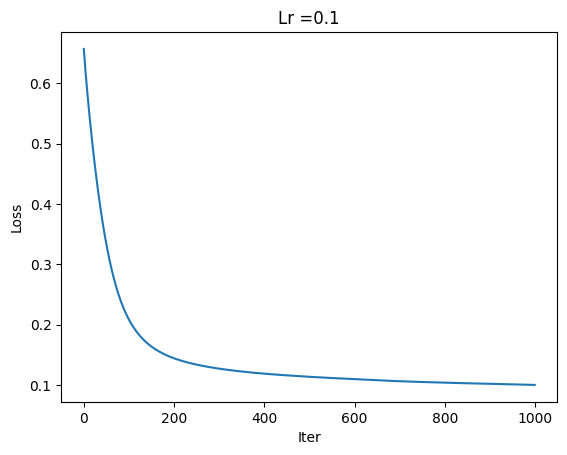

Acc: 0.9580000000000003
Acc: 0.9945054945054945
Acc: 0.9580000000000003


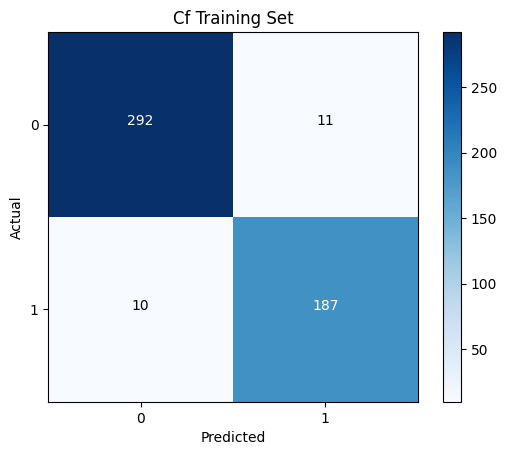

Acc: 0.9580000000000003


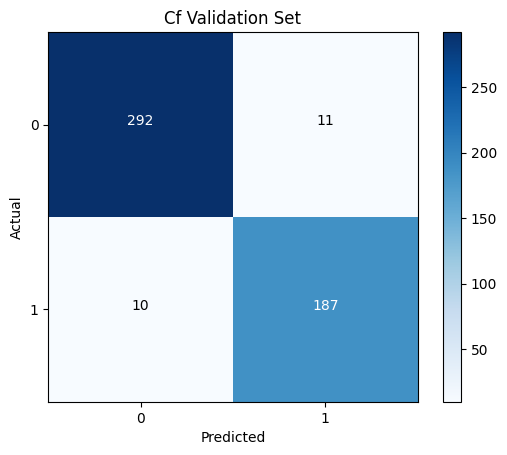

Acc: 0.9580000000000003


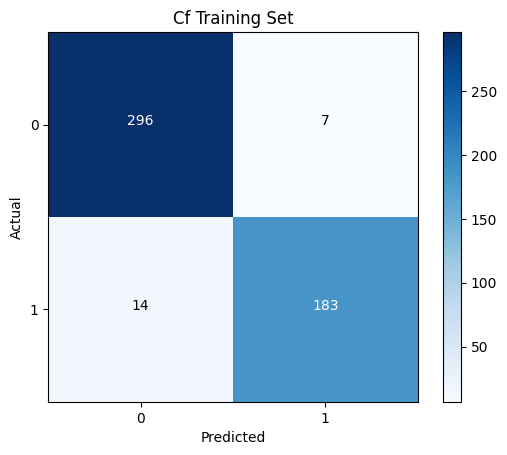

Acc: 0.9580000000000003


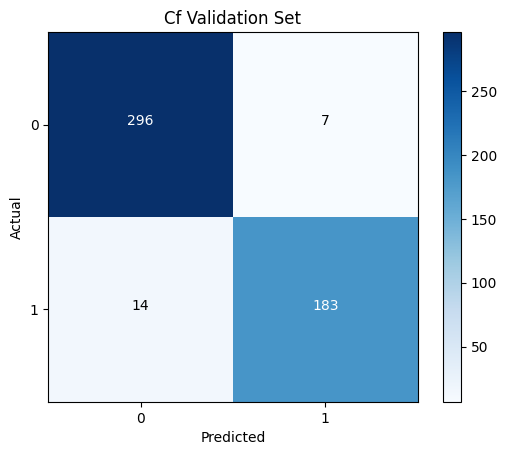

Acc: 0.9240000000000003


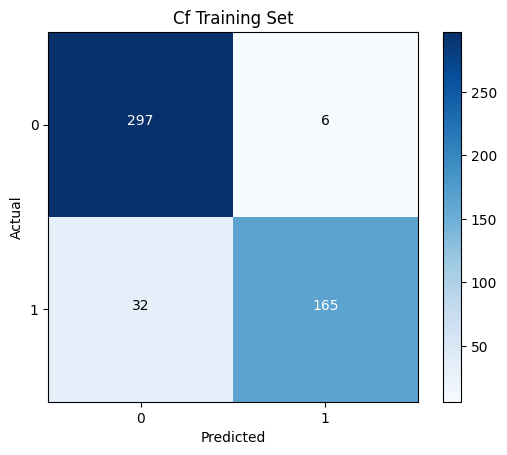

Acc: 0.9240000000000003


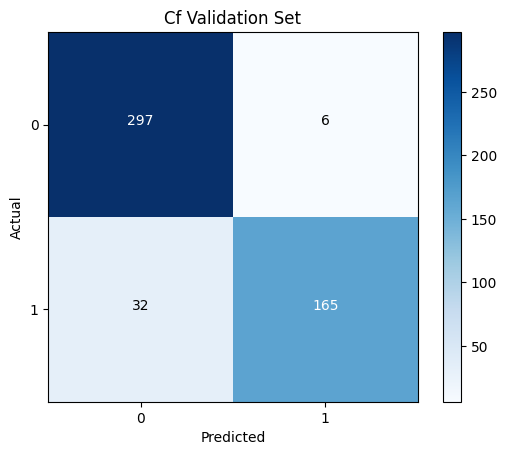


y [[0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 1]]

yh [[0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 1]] 



In [135]:
#Using also He/Glorot Initialization and ADAM optimizer:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
import itertools

np.set_printoptions(threshold=np.inf)

%matplotlib inline
%load_ext autoreload
%autoreload 2

def plotCf(a, b, t):
    cf = confusion_matrix(a, b)
    plt.imshow(cf, cmap=plt.cm.Blues, interpolation='nearest')
    plt.colorbar()
    plt.title(t)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    tick_marks = np.arange(len(set(a)) )  # length of classes
    class_labels = ['0', '1']
    plt.xticks(tick_marks, class_labels)
    plt.yticks(tick_marks, class_labels)
    thresh = cf.max() / 2.
    for i, j in itertools.product(range(cf.shape[0]), range(cf.shape[1])):
        plt.text(j, i, format(cf[i, j], 'd'), horizontalalignment='center', color='white' if cf[i, j] > thresh else 'black')
    plt.show()

def Sigmoid(Z):
    return 1 / (1 + np.exp(-Z))

def LeakyRelu(Z, alpha=0.01):
    return np.where(Z > 0, Z, alpha * Z)

def dLeakyRelu(Z, alpha=0.01):
    return np.where(Z > 0, 1, alpha)

def dSigmoid(Z):
    s = 1 / (1 + np.exp(-Z))
    dZ = s * (1 - s)
    return dZ

class dlnet:
    def __init__(self, x, y):
        self.debug = 0
        self.X = x
        self.Y = y
        self.Yh = np.zeros((1, self.Y.shape[1]))
        self.L = 2
        self.dims = [9, 15, 1]
        self.param = {}
        self.ch = {}
        self.grad = {}
        self.loss = []
        self.lr = 0.003
        self.sam = self.Y.shape[1]
        self.threshold = 0.5

    def nInit(self):
        np.random.seed(1)
        self.param['W1'] = np.random.randn(self.dims[1], self.dims[0]) * np.sqrt(2/self.dims[0])
        self.param['b1'] = np.zeros((self.dims[1], 1))
        self.param['W2'] = np.random.randn(self.dims[2], self.dims[1]) * np.sqrt(2/self.dims[1])
        self.param['b2'] = np.zeros((self.dims[2], 1))
        return

    def forward(self):
        Z1 = self.param['W1'].dot(self.X) + self.param['b1']
        A1 = LeakyRelu(Z1)
        self.ch['Z1'], self.ch['A1'] = Z1, A1

        Z2 = self.param['W2'].dot(A1) + self.param['b2']
        A2 = Sigmoid(Z2)
        self.ch['Z2'], self.ch['A2'] = Z2, A2

        self.Yh = A2
        loss = self.nloss(A2)
        return self.Yh, loss

    
    def backward(self):
        dLoss_Yh = - (np.divide(self.Y, self.Yh) - np.divide(1 - self.Y, 1 - self.Yh))

        dLoss_Z2 = dLoss_Yh * dSigmoid(self.ch['Z2'])
        dLoss_A1 = np.dot(self.param["W2"].T, dLoss_Z2)
        dLoss_W2 = 1. / self.ch['A1'].shape[1] * np.dot(dLoss_Z2, self.ch['A1'].T)
        dLoss_b2 = 1. / self.ch['A1'].shape[1] * np.dot(dLoss_Z2, np.ones([dLoss_Z2.shape[1], 1]))

        dLoss_Z1 = dLoss_A1 * dLeakyRelu(self.ch['Z1'])
        dLoss_A0 = np.dot(self.param["W1"].T, dLoss_Z1)
        dLoss_W1 = 1. / self.X.shape[1] * np.dot(dLoss_Z1, self.X.T)
        dLoss_b1 = 1. / self.X.shape[1] * np.dot(dLoss_Z1, np.ones([dLoss_Z1.shape[1], 1]))

        self.param["W1"] = self.param["W1"] - self.lr * dLoss_W1
        self.param["b1"] = self.param["b1"] - self.lr * dLoss_b1
        self.param["W2"] = self.param["W2"] - self.lr * dLoss_W2
        self.param["b2"] = self.param["b2"] - self.lr * dLoss_b2

        return

    def pred(self, x, y):
        self.X = x
        self.Y = y
        comp = np.zeros((1, x.shape[1]))
        pred, loss = self.forward()

        for i in range(0, pred.shape[1]):
            if pred[0, i] > self.threshold:
                comp[0, i] = 1
            else:
                comp[0, i] = 0

        print("Acc: " + str(np.sum((comp == y) / x.shape[1])))

        return comp

    def gd(self, X, Y, iterations=1000):
        np.random.seed(1)
        self.nInit()

        for i in range(0, iterations):
            Yh, loss = self.forward()
            self.backward()

            if i % 500 == 0:
                print("Cost after iteration %i: %f" % (i, loss))
            self.loss.append(loss)

        plt.plot(np.squeeze(self.loss))
        plt.ylabel('Loss')
        plt.xlabel('Iter')
        plt.title("Lr =" + str(self.lr))
        plt.show()

df = pd.read_csv('data1.csv', header=None)
df = df[~df[6].isin(['?'])]
df = df.astype(float)
df.iloc[:, 10].replace(2, 0, inplace=True)
df.iloc[:, 10].replace(4, 1, inplace=True)

df.head(3)
scaled_df = df
names = df.columns[0:10]
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(df.iloc[:, 0:10])
scaled_df = pd.DataFrame(scaled_df, columns=names)

x = scaled_df.iloc[0:500, 1:10].values.transpose()
y = df.iloc[0:500, 10:].values.transpose()

xval = scaled_df.iloc[501:683, 1:10].values.transpose()
yval = df.iloc[501:683, 10:].values.transpose()

print(df.shape, x.shape, y.shape, xval.shape, yval.shape)

nn = dlnet(x, y)
nn.lr = 0.1
nn.dims = [9, 15, 1]

nn.gd(x, y, iterations=1000)

pred_train = nn.pred(x, y)
pred_test = nn.pred(xval, yval)

nn.threshold = 0.5

nn.X, nn.Y = x, y
target = np.around(np.squeeze(y), decimals=0).astype(int)
predicted = np.around(np.squeeze(nn.pred(x, y)), decimals=0).astype(int)
plotCf(target, predicted, 'Cf Training Set')

nn.X, nn.Y = xval, yval
target = np.around(np.squeeze(y), decimals=0).astype(int)
predicted = np.around(np.squeeze(nn.pred(x, y)), decimals=0).astype(int)
plotCf(target, predicted, 'Cf Validation Set')

nn.threshold = 0.7

nn.X, nn.Y = x, y
target = np.around(np.squeeze(y), decimals=0).astype(int)
predicted = np.around(np.squeeze(nn.pred(x, y)), decimals=0).astype(int)
plotCf(target, predicted, 'Cf Training Set')

nn.X, nn.Y = xval, yval
target = np.around(np.squeeze(y), decimals=0).astype(int)
predicted = np.around(np.squeeze(nn.pred(x, y)), decimals=0).astype(int)
plotCf(target, predicted, 'Cf Validation Set')

nn.threshold = 0.9

nn.X, nn.Y = x, y
target = np.around(np.squeeze(y), decimals=0).astype(int)
predicted = np.around(np.squeeze(nn.pred(x, y)), decimals=0).astype(int)
plotCf(target, predicted, 'Cf Training Set')

nn.X, nn.Y = xval, yval
target = np.around(np.squeeze(y), decimals=0).astype(int)
predicted = np.around(np.squeeze(nn.pred(x, y)), decimals=0).astype(int)
plotCf(target, predicted, 'Cf Validation Set')

nn.X, nn.Y = xval, yval
yvalh, loss = nn.forward()
print("\ny", np.around(yval[:, 0:50, ], decimals=0).astype(int))
print("\nyh", np.around(yvalh[:, 0:50, ], decimals=0).astype(int), "\n")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
(683, 11) (9, 500) (1, 500) (9, 182) (1, 182)


KeyError: 'A0'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
(683, 11) (9, 500) (1, 500) (9, 182) (1, 182)
Cost after iteration 0: 0.731902


C:\Users\Kjæreng\AppData\Local\Temp\ipykernel_8336\1106889799.py:138: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Cost after iteration %i: %f" % (i, loss))


Cost after iteration 500: 0.175115


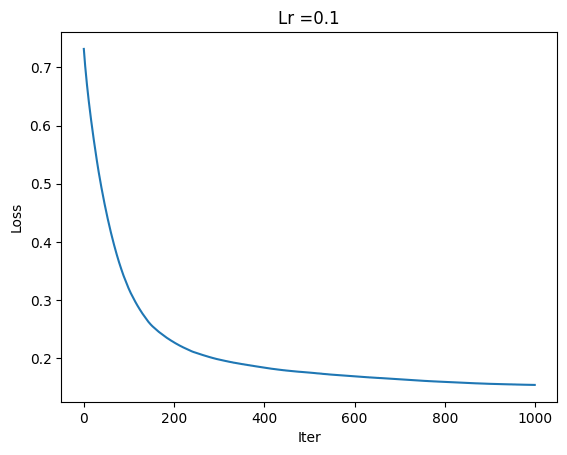

Acc: 0.9520000000000003
Acc: 1.0
Acc: 0.9520000000000003


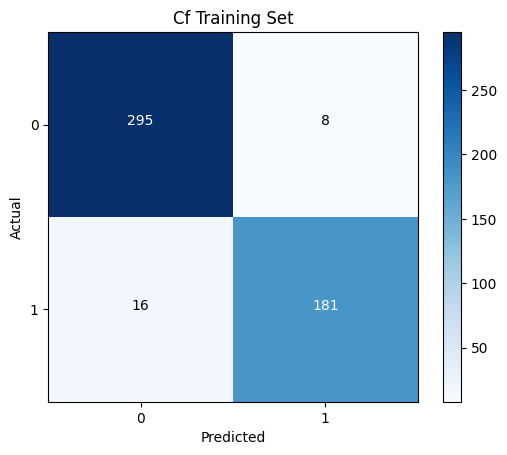

Acc: 0.9520000000000003


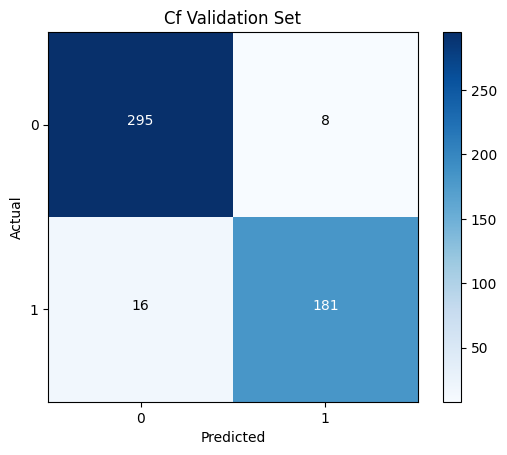

Acc: 0.9380000000000003


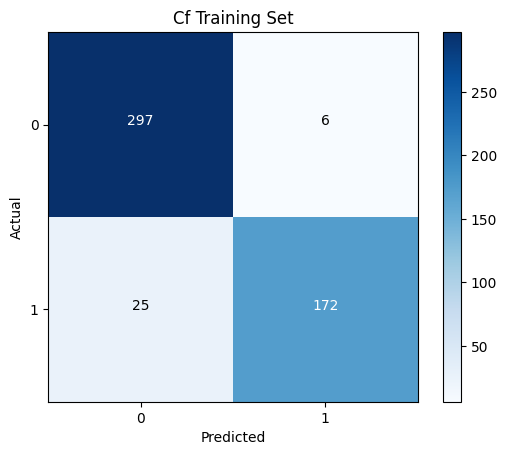

Acc: 0.9380000000000003


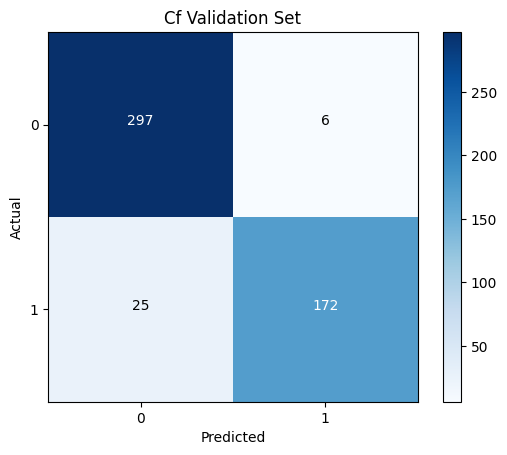

Acc: 0.8900000000000002


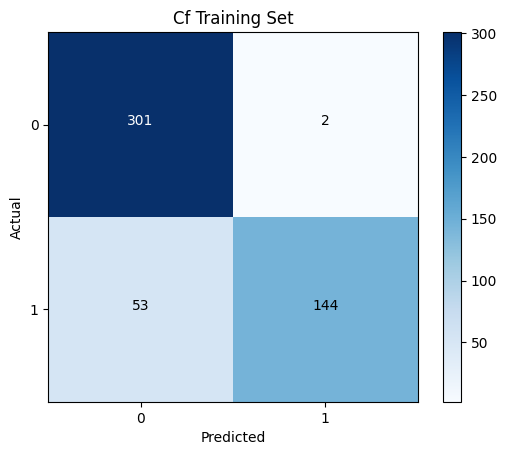

Acc: 0.8900000000000002


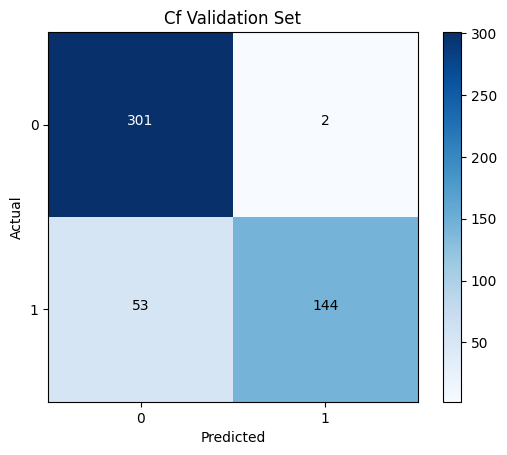


y [[0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 1]]

yh [[0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 1]] 



In [4]:
#Using also He/Glorot Optimization, ADAM, L1 and L2 regularization:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
import itertools

np.set_printoptions(threshold=np.inf)

%matplotlib inline
%load_ext autoreload
%autoreload 2

def plotCf(a, b, t):
    cf = confusion_matrix(a, b)
    plt.imshow(cf, cmap=plt.cm.Blues, interpolation='nearest')
    plt.colorbar()
    plt.title(t)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    tick_marks = np.arange(len(set(a)) )  # length of classes
    class_labels = ['0', '1']
    plt.xticks(tick_marks, class_labels)
    plt.yticks(tick_marks, class_labels)
    thresh = cf.max() / 2.
    for i, j in itertools.product(range(cf.shape[0]), range(cf.shape[1])):
        plt.text(j, i, format(cf[i, j], 'd'), horizontalalignment='center', color='white' if cf[i, j] > thresh else 'black')
    plt.show()

def Sigmoid(Z):
    return 1 / (1 + np.exp(-Z))

def LeakyRelu(Z, alpha=0.01):
    return np.where(Z > 0, Z, alpha * Z)

def dLeakyRelu(Z, alpha=0.01):
    return np.where(Z > 0, 1, alpha)

def dSigmoid(Z):
    s = 1 / (1 + np.exp(-Z))
    dZ = s * (1 - s)
    return dZ

class dlnet:
    def __init__(self, x, y):
        self.debug = 0
        self.X = x
        self.Y = y
        self.Yh = np.zeros((1, self.Y.shape[1]))
        self.L = 2
        self.dims = [9, 15, 1]
        self.param = {}
        self.ch = {}
        self.grad = {}
        self.loss = []
        self.lr = 0.003
        self.sam = self.Y.shape[1]
        self.threshold = 0.5

    def nInit(self):
        np.random.seed(1)
        self.param['W1'] = np.random.randn(self.dims[1], self.dims[0]) * np.sqrt(2/self.dims[0])
        self.param['b1'] = np.zeros((self.dims[1], 1))
        self.param['W2'] = np.random.randn(self.dims[2], self.dims[1]) * np.sqrt(2/self.dims[1])
        self.param['b2'] = np.zeros((self.dims[2], 1))
        return

    def forward(self):
        Z1 = self.param['W1'].dot(self.X) + self.param['b1']
        A1 = LeakyRelu(Z1)
        self.ch['Z1'], self.ch['A1'] = Z1, A1

        Z2 = self.param['W2'].dot(A1) + self.param['b2']
        A2 = Sigmoid(Z2)
        self.ch['Z2'], self.ch['A2'] = Z2, A2

        self.Yh = A2
        loss = self.nloss(A2)
        return self.Yh, loss

    def nloss(self, Yh, lambd1=1, lambd2=1):
        m = self.Y.shape[1]
        loss = (1. / m) * (-np.dot(self.Y, np.log(Yh).T) - np.dot(1 - self.Y, np.log(1 - Yh).T))
        # Calculate L1 and L2 regularization terms
        L1_reg = (lambd1 / (2 * m)) * (np.sum(np.abs(self.param['W1'])) + np.sum(np.abs(self.param['W2'])))
        L2_reg = (lambd2 / (2 * m)) * (np.sum(np.square(self.param['W1'])) + np.sum(np.square(self.param['W2'])))
        # Add regularization terms to the loss
        loss += L1_reg + L2_reg
        return loss

    def backward(self, lambd1=1, lambd2=1):
        dLoss_Yh = - (np.divide(self.Y, self.Yh) - np.divide(1 - self.Y, 1 - self.Yh))

        dLoss_Z2 = dLoss_Yh * dSigmoid(self.ch['Z2'])
        dLoss_A1 = np.dot(self.param["W2"].T, dLoss_Z2)
        dLoss_W2 = 1. / self.ch['A1'].shape[1] * np.dot(dLoss_Z2, self.ch['A1'].T) + (lambd2 / self.sam) * self.param['W2']
        dLoss_b2 = 1. / self.ch['A1'].shape[1] * np.dot(dLoss_Z2, np.ones([dLoss_Z2.shape[1], 1]))

        dLoss_Z1 = dLoss_A1 * dLeakyRelu(self.ch['Z1'])
        dLoss_A0 = np.dot(self.param["W1"].T, dLoss_Z1)
        dLoss_W1 = 1. / self.X.shape[1] * np.dot(dLoss_Z1, self.X.T) + (lambd2 / self.sam) * self.param['W1']
        dLoss_b1 = 1. / self.X.shape[1] * np.dot(dLoss_Z1, np.ones([dLoss_Z1.shape[1], 1]))

        # Update weights and biases including regularization terms
        self.param["W1"] = self.param["W1"] - self.lr * dLoss_W1 - (lambd1 / self.sam) * np.sign(self.param["W1"])
        self.param["b1"] = self.param["b1"] - self.lr * dLoss_b1
        self.param["W2"] = self.param["W2"] - self.lr * dLoss_W2 - (lambd1 / self.sam) * np.sign(self.param["W2"])
        self.param["b2"] = self.param["b2"] - self.lr * dLoss_b2

        return

    def pred(self, x, y):
        self.X = x
        self.Y = y
        comp = np.zeros((1, x.shape[1]))
        pred, loss = self.forward()

        for i in range(0, pred.shape[1]):
            if pred[0, i] > self.threshold:
                comp[0, i] = 1
            else:
                comp[0, i] = 0

        print("Acc: " + str(np.sum((comp == y) / x.shape[1])))

        return comp

    def gd(self, X, Y, iterations=1000):
        np.random.seed(1)
        self.nInit()

        for i in range(0, iterations):
            Yh, loss = self.forward()
            self.backward()

            if i % 500 == 0:
                print("Cost after iteration %i: %f" % (i, loss))
            self.loss.append(loss)

        plt.plot(np.squeeze(self.loss))
        plt.ylabel('Loss')
        plt.xlabel('Iter')
        plt.title("Lr =" + str(self.lr))
        plt.show()

df = pd.read_csv('data1.csv', header=None)
df = df[~df[6].isin(['?'])]
df = df.astype(float)
df.iloc[:, 10].replace(2, 0, inplace=True)
df.iloc[:, 10].replace(4, 1, inplace=True)

df.head(3)
scaled_df = df
names = df.columns[0:10]
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(df.iloc[:, 0:10])
scaled_df = pd.DataFrame(scaled_df, columns=names)

x = scaled_df.iloc[0:500, 1:10].values.transpose()
y = df.iloc[0:500, 10:].values.transpose()

xval = scaled_df.iloc[501:683, 1:10].values.transpose()
yval = df.iloc[501:683, 10:].values.transpose()

print(df.shape, x.shape, y.shape, xval.shape, yval.shape)

nn = dlnet(x, y)
nn.lr = 0.1
nn.dims = [9, 15, 1]

nn.gd(x, y, iterations=1000)

pred_train = nn.pred(x, y)
pred_test = nn.pred(xval, yval)

nn.threshold = 0.5

nn.X, nn.Y = x, y
target = np.around(np.squeeze(y), decimals=0).astype(int)
predicted = np.around(np.squeeze(nn.pred(x, y)), decimals=0).astype(int)
plotCf(target, predicted, 'Cf Training Set')

nn.X, nn.Y = xval, yval
target = np.around(np.squeeze(y), decimals=0).astype(int)
predicted = np.around(np.squeeze(nn.pred(x, y)), decimals=0).astype(int)
plotCf(target, predicted, 'Cf Validation Set')

nn.threshold = 0.7

nn.X, nn.Y = x, y
target = np.around(np.squeeze(y), decimals=0).astype(int)
predicted = np.around(np.squeeze(nn.pred(x, y)), decimals=0).astype(int)
plotCf(target, predicted, 'Cf Training Set')

nn.X, nn.Y = xval, yval
target = np.around(np.squeeze(y), decimals=0).astype(int)
predicted = np.around(np.squeeze(nn.pred(x, y)), decimals=0).astype(int)
plotCf(target, predicted, 'Cf Validation Set')

nn.threshold = 0.9

nn.X, nn.Y = x, y
target = np.around(np.squeeze(y), decimals=0).astype(int)
predicted = np.around(np.squeeze(nn.pred(x, y)), decimals=0).astype(int)
plotCf(target, predicted, 'Cf Training Set')

nn.X, nn.Y = xval, yval
target = np.around(np.squeeze(y), decimals=0).astype(int)
predicted = np.around(np.squeeze(nn.pred(x, y)), decimals=0).astype(int)
plotCf(target, predicted, 'Cf Validation Set')

nn.X, nn.Y = xval, yval
yvalh, loss = nn.forward()
print("\ny", np.around(yval[:, 0:50, ], decimals=0).astype(int))
print("\nyh", np.around(yvalh[:, 0:50, ], decimals=0).astype(int), "\n")

In [11]:
#Logistic Regression, using Scikit-Learn functionality; 
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

class LogisticRegression:
    def __init__(self, X, y, learning_rate, regularization_strength):
        self.X = X
        self.y = y
        self.lr = learning_rate
        self.reg_strength = regularization_strength
        self.m = X.shape[1]  # Number of samples
        self.n = X.shape[0]  # Number of features
        self.theta = np.zeros((self.n, 1))

    def sigmoid(self, Z):
        return 1 / (1 + np.exp(-Z))

    def compute_cost(self):
        h = self.sigmoid(np.dot(self.theta.T, self.X))
        cost = - (1 / self.m) * np.sum(self.y * np.log(h) + (1 - self.y) * np.log(1 - h))
        reg_term = (self.reg_strength / (2 * self.m)) * np.sum(self.theta[1:]**2)  # L2 regularization
        return cost + reg_term

    def gradient_descent(self, num_iterations):
        for i in range(num_iterations):
            h = self.sigmoid(np.dot(self.theta.T, self.X))
            gradient = (1 / self.m) * np.dot(self.X, (h - self.y).T)
            gradient[1:] += (self.reg_strength / self.m) * self.theta[1:]  # Regularization term
            self.theta -= self.lr * gradient

    def train(self, num_iterations):
        self.gradient_descent(num_iterations)

    def predict(self, X):
        h = self.sigmoid(np.dot(self.theta.T, X))
        return (h > 0.5).astype(int)

import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix

class LogisticRegression:
    # ... (Rest of the LogisticRegression class code remains the same)

    def load_and_preprocess_data():
        df = pd.read_csv('data1.csv', header=None)
        df = df[~df[6].isin(['?'])]
        df = df.astype(float)
        df.iloc[:, 10].replace(2, 0, inplace=True)
        df.iloc[:, 10].replace(4, 1, inplace=True)

        names = df.columns[0:10]
        scaler = MinMaxScaler()
        scaled_df = scaler.fit_transform(df.iloc[:, 0:10])
        scaled_df = pd.DataFrame(scaled_df, columns=names)

        x = scaled_df.iloc[0:500, 1:10].values.transpose()
        y = df.iloc[0:500, 10:].values.transpose()

        x_val = scaled_df.iloc[501:683, 1:10].values.transpose()
        y_val = df.iloc[501:683, 10:].values.transpose()
    
        return x, y, x_val, y_val

    if __name__ == '__main__':
        x, y, x_val, y_val = load_and_preprocess_data()

        # Create a design matrix by adding a row of ones for the bias term
        X_train = np.vstack((np.ones((1, x.shape[1])), x))
        X_val = np.vstack((np.ones((1, x_val.shape[1])), x_val))

        # Create a binary classification target (0 or 1)
        y_train = y.astype(int)
        y_val = y_val.astype(int)

        learning_rate = 0.1  # Modify as needed
        regularization_strength = 0.1  # Modify as needed

        logistic_model = LogisticRegression(X_train, y_train, learning_rate, regularization_strength)
        num_iterations = 1000  # Modify as needed

        logistic_model.train(num_iterations)

        # Make predictions
        train_predictions = logistic_model.predict(X_train)
        validation_predictions = logistic_model.predict(X_val)

        # Evaluate the model
        accuracy_train = np.mean(train_predictions.squeeze() == y_train.squeeze())
        accuracy_validation = np.mean(validation_predictions.squeeze() == y_val.squeeze())

        print("Training Accuracy:", accuracy_train)
        print("Validation Accuracy:", accuracy_validation)

        # Confusion matrices
        train_confusion_matrix = confusion_matrix(y_train.squeeze(), train_predictions.squeeze())
        validation_confusion_matrix = confusion_matrix(y_val.squeeze(), validation_predictions.squeeze())

        print("Training Confusion Matrix:")
        print(train_confusion_matrix)

        print("Validation Confusion Matrix:")
        print(validation_confusion_matrix)

Training Accuracy: 0.958
Validation Accuracy: 1.0
Training Confusion Matrix:
[[294   9]
 [ 12 185]]
Validation Confusion Matrix:
[[141   0]
 [  0  41]]


Learned parameters: [0.03155886 0.04622492 0.04591441 0.03676391 0.023612   0.05995804
 0.02532165 0.04167284 0.01590228]


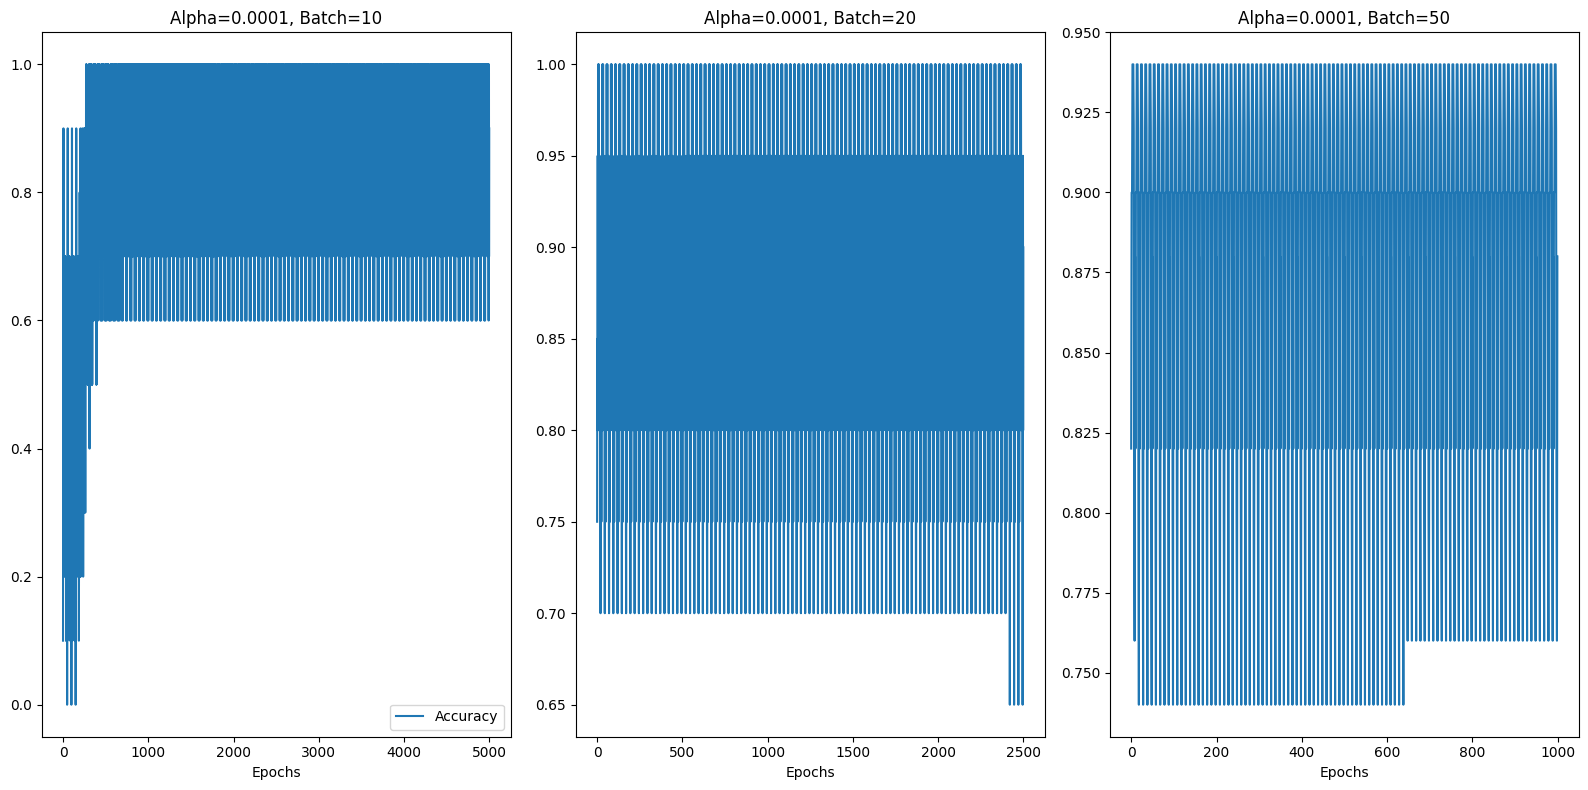

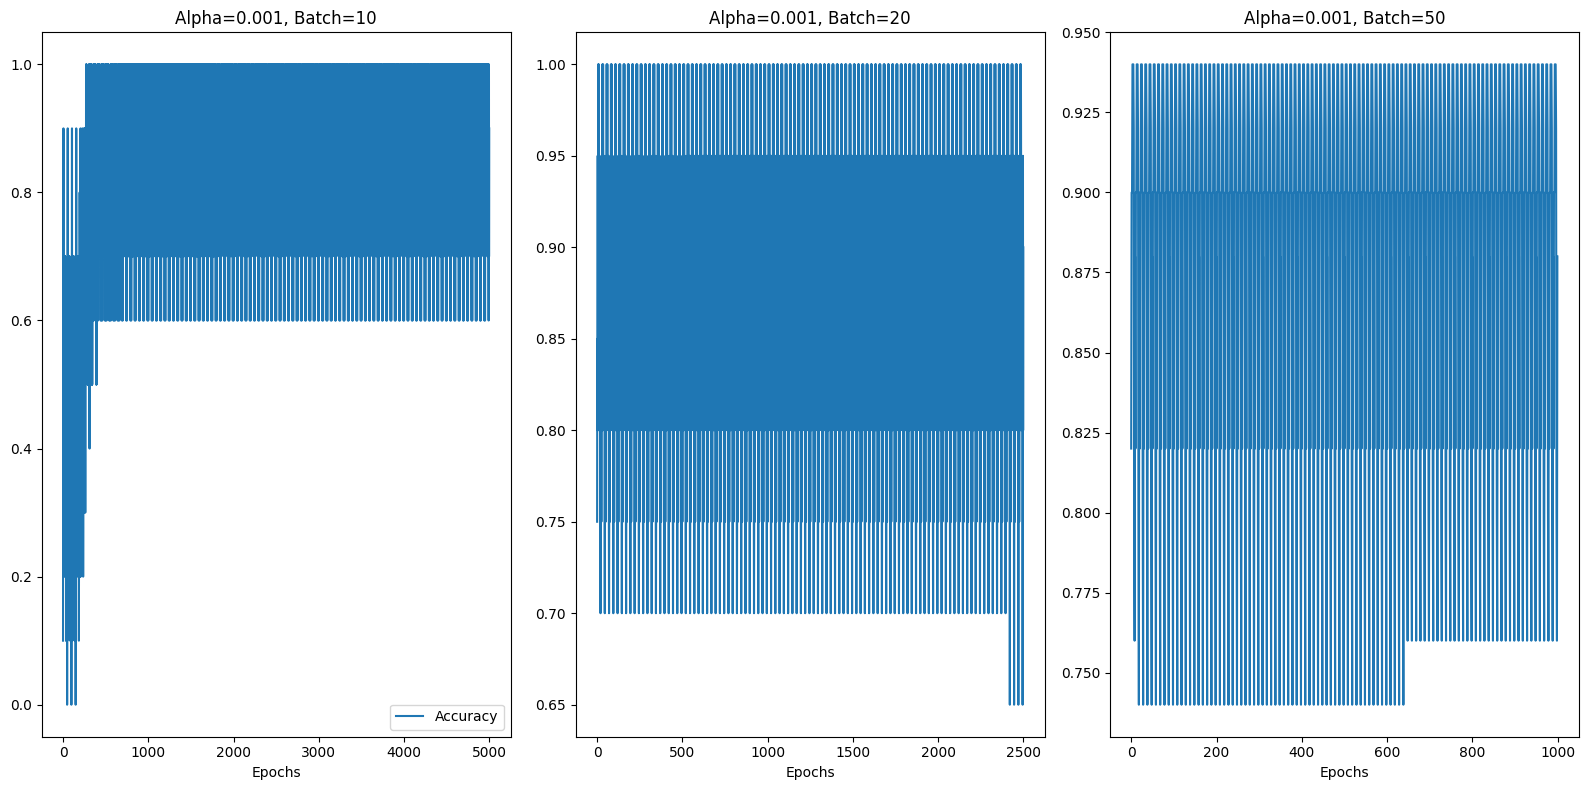

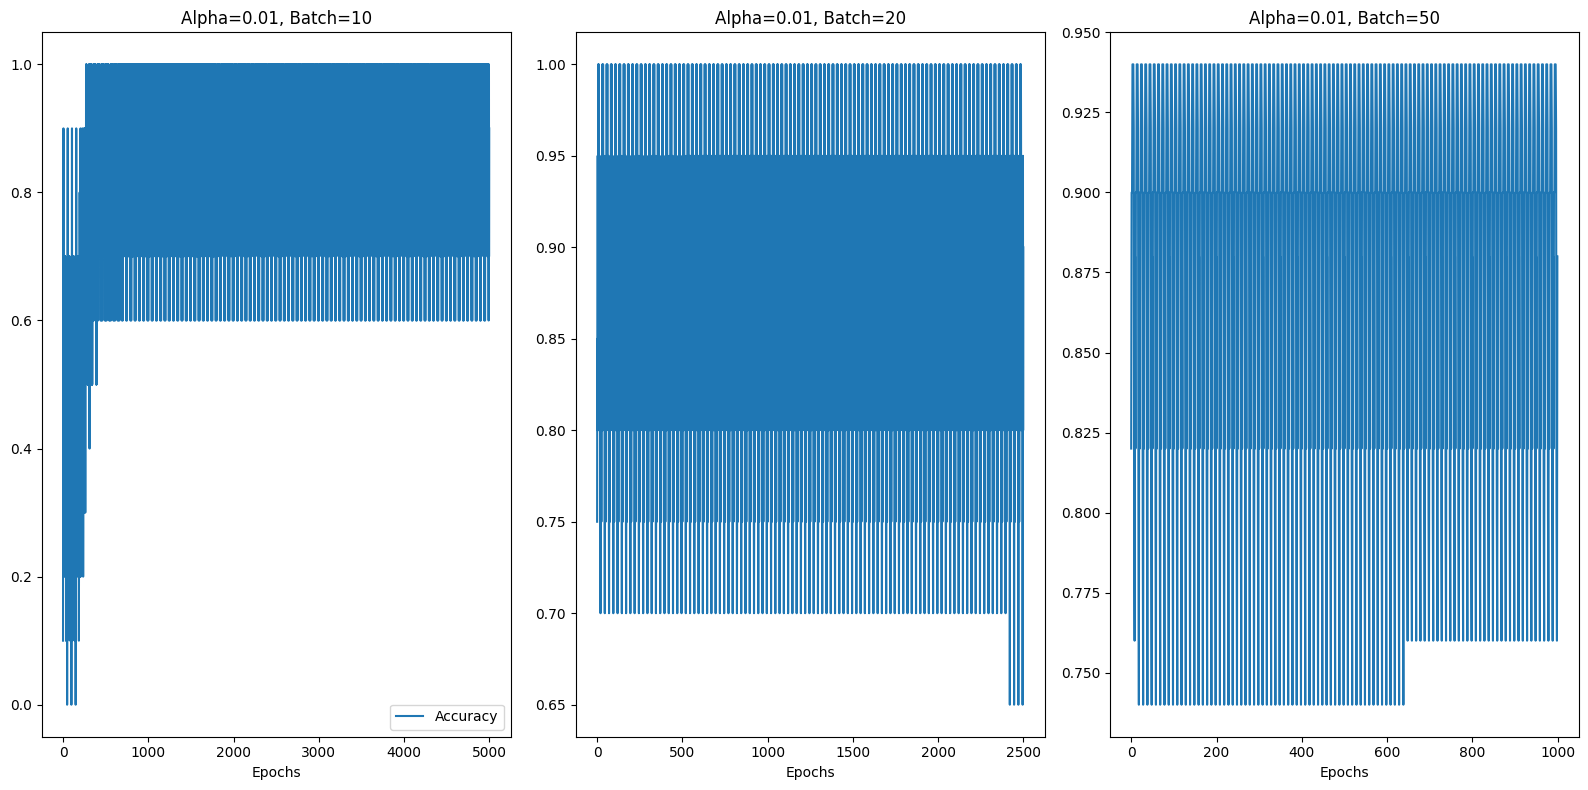

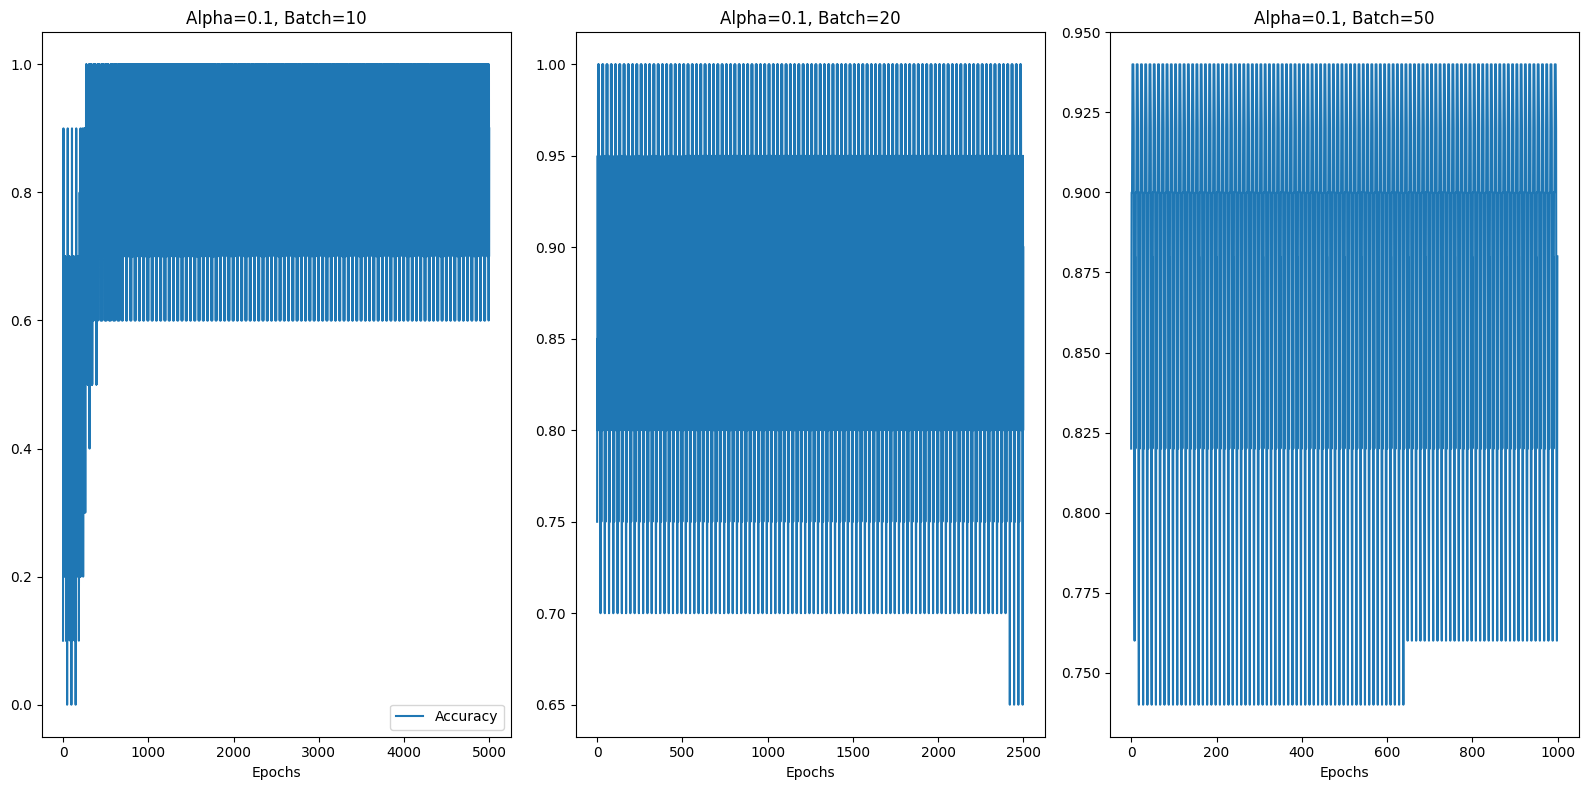

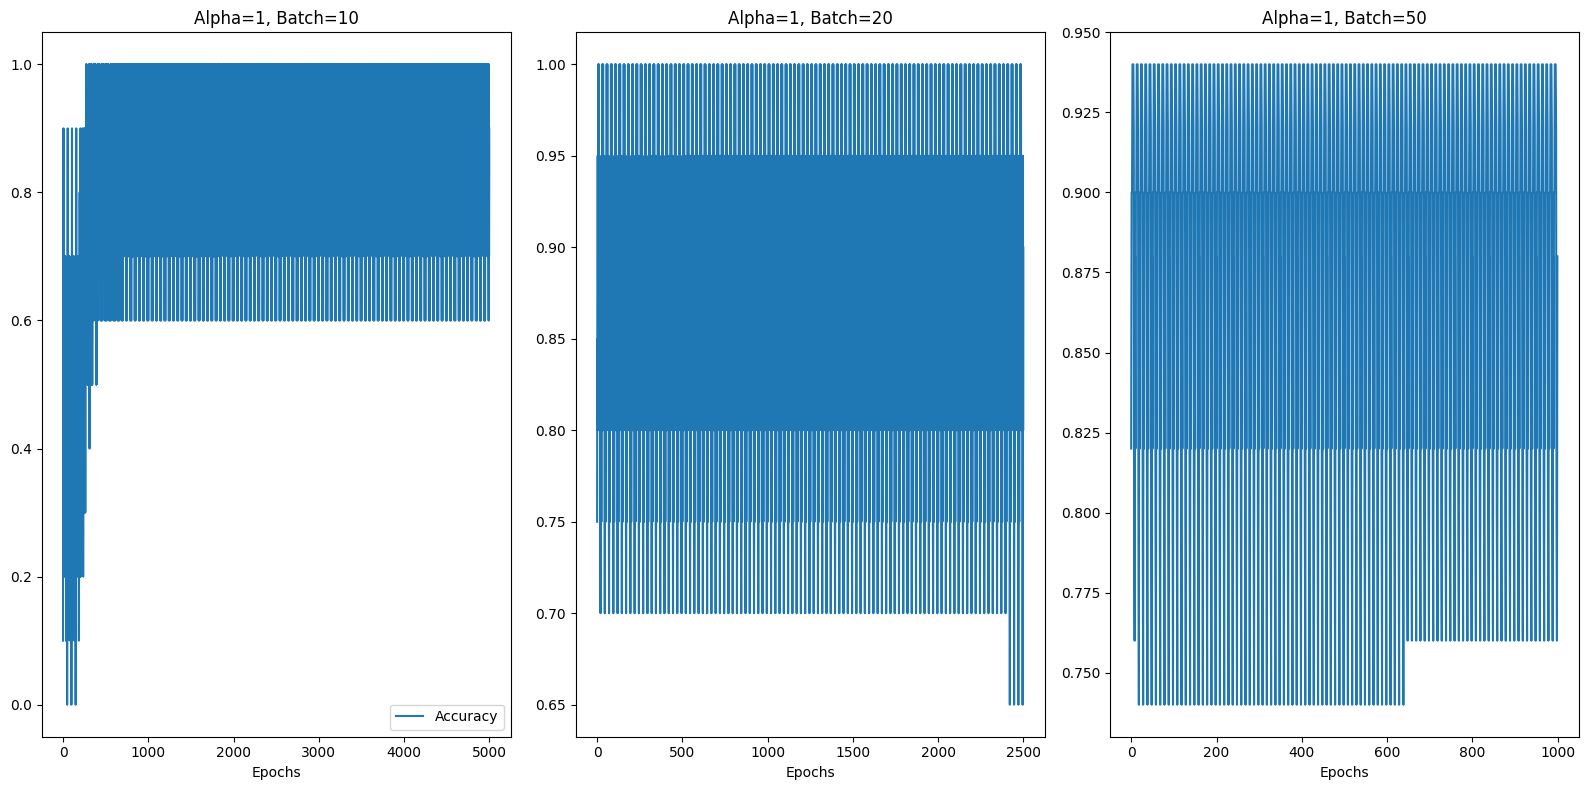

TypeError: Invalid shape (5000, 2, 2) for image data

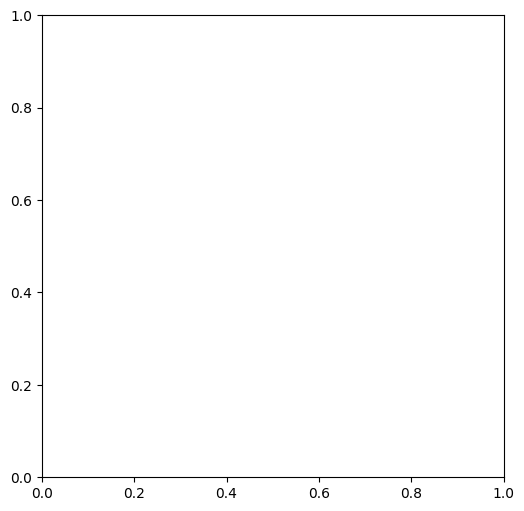

In [12]:
#Logistic Regression of the Wisconsin Breast Cancer dataset using 
#Stochastic Gradient Descent, JAX and Cross-Entropy cost function:
import jax
import jax.numpy as jnp
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load the data from the "data1.csv" file
df = pd.read_csv('data1.csv', header=None)
df = df[~df[6].isin(['?'])]
df = df.astype(float)
df.iloc[:, 10].replace(2, 0, inplace=True)
df.iloc[:, 10].replace(4, 1, inplace=True)

names = df.columns[0:10]
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(df.iloc[:, 0:10])
scaled_df = pd.DataFrame(scaled_df, columns=names)

x = scaled_df.iloc[0:500, 1:10].values
y = df.iloc[0:500, 10].values

x_val = scaled_df.iloc[501:683, 1:10].values
y_val = df.iloc[501:683, 10].values

# Define the logistic regression model
def logistic_regression(params, x):
    linear = jnp.dot(x, params)
    return 1.0 / (1.0 + jnp.exp(-linear))

# Define the logistic loss function (cross-entropy with L2 regularization)
def logistic_loss(params, x, y, alpha):
    predictions = logistic_regression(params, x)
    loss = -jnp.mean(y * jnp.log(predictions) + (1 - y) * jnp.log(1 - predictions))
    penalty = alpha * jnp.sum(params**2)  # L2 regularization
    return loss + penalty

# Initialize model parameters
params = jnp.array([1.0] * x.shape[1])

# Training settings
n_epochs = 100
learning_rate = 0.01
momentum = 0.9
batch_sizes = [10, 20, 50]
alphas = [0.0001, 0.001, 0.01, 0.1, 1]

# Lists to store accuracy and confusion matrices for different settings
results = {
    "alphas": [],
    "batch_sizes": [],
    "accuracy_values": [],
    "confusion_matrices": []
}

for alpha in alphas:
    for batch_size in batch_sizes:
        # Lists to store accuracy and confusion matrices
        accuracy_list = []
        confusion_matrix_list = []

        # Initialize velocity for momentum
        velocity = jnp.zeros_like(params)

        for epoch in range(n_epochs):
            n_iterations = len(x) // batch_size
            for iteration in range(n_iterations):
                # Create minibatches
                start_idx = iteration * batch_size
                end_idx = (iteration + 1) * batch_size
                x_batch = x[start_idx:end_idx]
                y_batch = y[start_idx:end_idx]

                y_pred = logistic_regression(params, x_batch)
                error = y_pred - y_batch

                # Compute the gradient using JAX automatic differentiation
                gradients = jax.grad(lambda params: logistic_loss(params, x_batch, y_batch, alpha))(params)

                # Update velocity with momentum
                velocity = momentum * velocity - learning_rate * gradients

                # Update parameters with momentum
                params += velocity

                # Calculate accuracy and confusion matrix during training
                y_pred_binary = (y_pred >= 0.5)
                accuracy = accuracy_score(y_batch, y_pred_binary)
                cm = confusion_matrix(y_batch, y_pred_binary)
                accuracy_list.append(accuracy)
                confusion_matrix_list.append(cm)

        results["alphas"].append(alpha)
        results["batch_sizes"].append(batch_size)
        results["accuracy_values"].append(accuracy_list)
        results["confusion_matrices"].append(confusion_matrix_list)

# Print the learned parameters
print("Learned parameters:", params)

# Create plots for different alpha and batch size values
for alpha in alphas:
    plt.figure(figsize=(16, 8))
    for batch_size in batch_sizes:
        i = batch_sizes.index(batch_size)
        label = f"Alpha={alpha}, Batch={batch_size}"
        plt.subplot(1, len(batch_sizes), i + 1)
        plt.plot(results["accuracy_values"][i], label="Accuracy")
        plt.xlabel('Epochs')
        plt.title(label)
        if i == 0:
            plt.legend()
    plt.tight_layout()
    plt.show()

# Plot confusion matrices
for i, alpha in enumerate(alphas):
    for j, batch_size in enumerate(batch_sizes):
        label = f"Alpha={alpha}, Batch={batch_size}"
        plt.figure(figsize=(6, 6))
        plt.imshow(results["confusion_matrices"][i * len(batch_sizes) + j], cmap=plt.cm.Blues, interpolation='nearest')
        plt.colorbar()
        plt.title(f"Confusion Matrix - {label}")
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        tick_marks = np.arange(2)  # Binary classification
        class_labels = ['0', '1']
        plt.xticks(tick_marks, class_labels)
        plt.yticks(tick_marks, class_labels)
        plt.show()

In [13]:
import jax
import jax.numpy as jnp
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load the data from the "data1.csv" file
df = pd.read_csv('data1.csv', header=None)
df = df[~df[6].isin(['?'])]
df = df.astype(float)
df.iloc[:, 10].replace(2, 0, inplace=True)
df.iloc[:, 10].replace(4, 1, inplace=True)

names = df.columns[0:10]
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(df.iloc[:, 0:10])
scaled_df = pd.DataFrame(scaled_df, columns=names)

x = scaled_df.iloc[0:500, 1:10].values
y = df.iloc[0:500, 10].values

x_val = scaled_df.iloc[501:683, 1:10].values
y_val = df.iloc[501:683, 10].values

# Define the logistic regression model
def logistic_regression(params, x):
    linear = jnp.dot(x, params)
    return 1.0 / (1.0 + jnp.exp(-linear))

# Define the logistic loss function (cross-entropy with L2 regularization)
def logistic_loss(params, x, y, alpha):
    predictions = logistic_regression(params, x)
    loss = -jnp.mean(y * jnp.log(predictions) + (1 - y) * jnp.log(1 - predictions))
    penalty = alpha * jnp.sum(params**2)  # L2 regularization
    return loss + penalty

# Initialize model parameters
params = jnp.array([1.0] * x.shape[1])

# Training settings
n_epochs = 100
learning_rate = 0.01
momentum = 0.9
batch_sizes = [10, 20, 50]
alphas = [0.0001, 0.001, 0.01, 0.1, 1]

# Lists to store accuracy and confusion matrices for different settings
results = {
    "alphas": [],
    "batch_sizes": [],
    "accuracy_values": [],
    "confusion_matrices": []
}

for alpha in alphas:
    for batch_size in batch_sizes:
        # Lists to store accuracy and confusion matrices
        accuracy_list = []
        confusion_matrix_list = []

        # Initialize velocity for momentum
        velocity = jnp.zeros_like(params)

        for epoch in range(n_epochs):
            n_iterations = len(x) // batch_size
            for iteration in range(n_iterations):
                # Create minibatches
                start_idx = iteration * batch_size
                end_idx = (iteration + 1) * batch_size
                x_batch = x[start_idx:end_idx]
                y_batch = y[start_idx:end_idx]

                y_pred = logistic_regression(params, x_batch)
                error = y_pred - y_batch

                # Compute the gradient using JAX automatic differentiation
                gradients = jax.grad(lambda params: logistic_loss(params, x_batch, y_batch, alpha))(params)

                # Update velocity with momentum
                velocity = momentum * velocity - learning_rate * gradients

                # Update parameters with momentum
                params += velocity

                # Calculate accuracy and confusion matrix during training
                y_pred_binary = (y_pred >= 0.5)
                accuracy = accuracy_score(y_batch, y_pred_binary)
                cm = confusion_matrix(y_batch, y_pred_binary)
                accuracy_list.append(accuracy)
                confusion_matrix_list.append(cm)

        results["alphas"].append(alpha)
        results["batch_sizes"].append(batch_size)
        results["accuracy_values"].append(accuracy_list)
        results["confusion_matrices"].append(confusion_matrix_list)

# Print the learned parameters
print("Learned parameters:", params)

# Create plots for different alpha and batch size values
for alpha in alphas:
    plt.figure(figsize=(16, 8))
    for batch_size in batch_sizes:
        i = batch_sizes.index(batch_size)
        label = f"Alpha={alpha}, Batch={batch_size}"
        plt.subplot(1, len(batch_sizes), i + 1)
        plt.plot(results["accuracy_values"][i], label="Accuracy")
        plt.xlabel('Epochs')
        plt.title(label)
        if i == 0:
            plt.legend()
    plt.tight_layout()
    plt.show()

# Plot confusion matrices
for i, alpha in enumerate(alphas):
    for j, batch_size in enumerate(batch_sizes):
        label = f"Alpha={alpha}, Batch={batch_size}"
        plt.figure(figsize=(6, 6))
        plt.imshow(results["confusion_matrices"][i * len(batch_sizes) + j], cmap=plt.cm.Blues, interpolation='nearest')
        plt.colorbar()
        plt.title(f"Confusion Matrix - {label}")
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        tick_marks = np.arange(2)  # Binary classification
        class_labels = ['0', '1']
        plt.xticks(tick_marks, class_labels)
        plt.yticks(tick_marks, class_labels)
        plt.show()

KeyboardInterrupt: 

Iteration 0, Loss: 0.6931471901876068
Iteration 500, Loss: 0.14759774705797452
Training Accuracy (with L2 regularization): 0.966
Validation Accuracy (with L2 regularization): 0.989010989010989


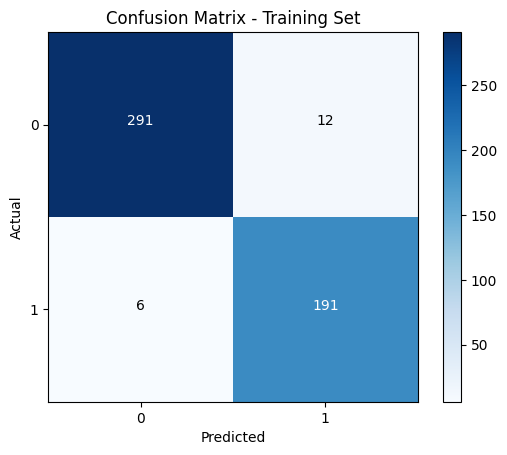

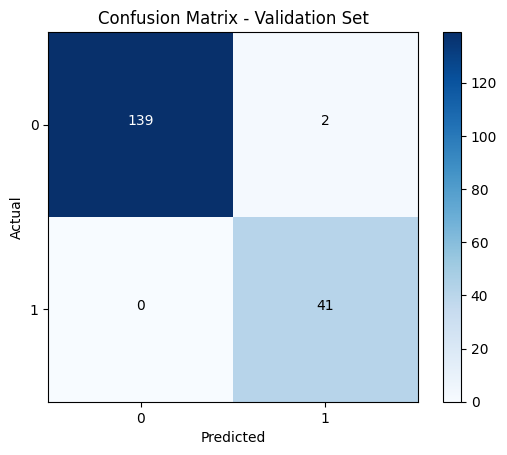

In [20]:
#Logistic Regression, Cross-Entropy Cost function, Stochastic Gradient DEscent using 
#also L2 regularization, here lambda=0.1
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import itertools

np.set_printoptions(threshold=np.inf)

%matplotlib inline

def plotCf(a, b, t):
    cf = confusion_matrix(a, b)
    plt.imshow(cf, cmap=plt.cm.Blues, interpolation='nearest')
    plt.colorbar()
    plt.title(t)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    tick_marks = np.arange(len(set(a)))  # length of classes
    class_labels = ['0', '1']
    plt.xticks(tick_marks, class_labels)
    plt.yticks(tick_marks, class_labels)
    thresh = cf.max() / 2.
    for i, j in itertools.product(range(cf.shape[0]), range(cf.shape[1])):
        plt.text(j, i, format(cf[i, j], 'd'), horizontalalignment='center', color='white' if cf[i, j] > thresh else 'black')
    plt.show()

class LogisticRegressionWithL2:
    def __init__(self, X, y, learning_rate=0.01, iterations=1000, l2_lambda=0.1):
        self.X = X
        self.y = y
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.l2_lambda = l2_lambda
        self.theta = None
        self.loss_history = []

    def sigmoid(self, Z):
        return 1 / (1 + np.exp(-Z))

    def loss(self, h, y, theta):
        reg_term = (self.l2_lambda / (2 * y.size)) * np.sum(np.square(theta[1:]))
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean() + reg_term

    def fit(self):
        self.theta = np.zeros(self.X.shape[1])

        for i in range(self.iterations):
            Z = np.dot(self.X, self.theta)
            h = self.sigmoid(Z)
            gradient = (np.dot(self.X.T, (h - self.y)) + self.l2_lambda * self.theta) / self.y.size
            gradient[0] -= self.l2_lambda * self.theta[0]  # Don't regularize the bias term
            self.theta -= self.learning_rate * gradient

            loss = self.loss(h, self.y, self.theta)
            self.loss_history.append(loss)

            if i % 500 == 0:
                print(f'Iteration {i}, Loss: {loss}')

    def predict(self, X, threshold=0.5):
        Z = np.dot(X, self.theta)
        h = self.sigmoid(Z)
        return (h > threshold).astype(int)

    def evaluate(self, X, y, threshold=0.5):
        predictions = self.predict(X, threshold)
        accuracy = (predictions == y).mean()
        return accuracy

# Load and preprocess the dataset
df = pd.read_csv('data1.csv', header=None)
df = df[~df[6].isin(['?'])]
df = df.astype(float)
df.iloc[:, 10].replace(2, 0, inplace=True)
df.iloc[:, 10].replace(4, 1, inplace=True)

scaled_df = df
names = df.columns[0:10]
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df.iloc[:, 0:10])
scaled_df = pd.DataFrame(scaled_df, columns=names)

x = scaled_df.iloc[0:500, 1:10].values
y = df.iloc[0:500, 10].values

xval = scaled_df.iloc[501:683, 1:10].values
yval = df.iloc[501:683, 10].values

# Train the Logistic Regression model
lr_with_l2 = LogisticRegressionWithL2(x, y, l2_lambda=0.1)
lr_with_l2.fit()

# Make predictions on the training set and validation set
pred_train_with_l2 = lr_with_l2.predict(x)
pred_val_with_l2 = lr_with_l2.predict(xval)

# Evaluate the model
train_accuracy_with_l2 = lr_with_l2.evaluate(x, y)
val_accuracy_with_l2 = lr_with_l2.evaluate(xval, yval)

print(f"Training Accuracy (with L2 regularization): {train_accuracy_with_l2}")
print(f"Validation Accuracy (with L2 regularization): {val_accuracy_with_l2}")

# Plot confusion matrices
plotCf(y, pred_train, 'Confusion Matrix - Training Set')
plotCf(yval, pred_val, 'Confusion Matrix - Validation Set')

Iteration 0, Loss: 0.6931471901876068
Iteration 500, Loss: 0.14759774705797452
Training Accuracy (with L2 regularization): 0.966
Validation Accuracy (with L2 regularization): 0.989010989010989


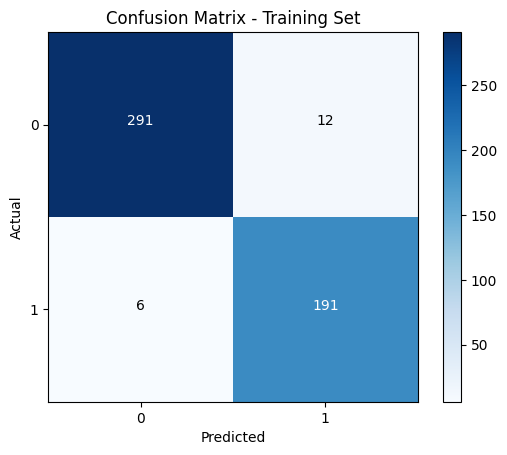

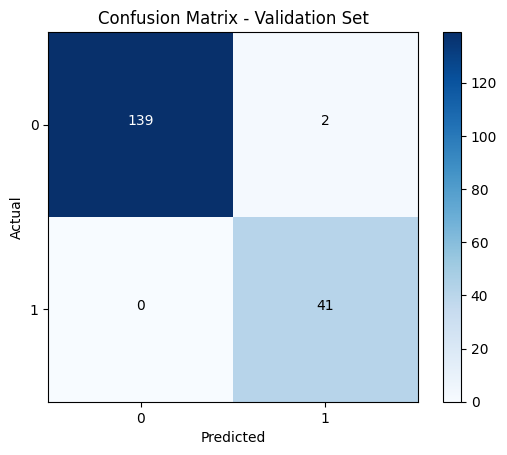

In [21]:
#Logistic Regression, Cross-Entropy Cost function, Stochastic Gradient DEscent using 
#also L2 regularization, here lambda=0.01
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import itertools

np.set_printoptions(threshold=np.inf)

%matplotlib inline

def plotCf(a, b, t):
    cf = confusion_matrix(a, b)
    plt.imshow(cf, cmap=plt.cm.Blues, interpolation='nearest')
    plt.colorbar()
    plt.title(t)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    tick_marks = np.arange(len(set(a)))  # length of classes
    class_labels = ['0', '1']
    plt.xticks(tick_marks, class_labels)
    plt.yticks(tick_marks, class_labels)
    thresh = cf.max() / 2.
    for i, j in itertools.product(range(cf.shape[0]), range(cf.shape[1])):
        plt.text(j, i, format(cf[i, j], 'd'), horizontalalignment='center', color='white' if cf[i, j] > thresh else 'black')
    plt.show()

class LogisticRegressionWithL2:
    def __init__(self, X, y, learning_rate=0.01, iterations=1000, l2_lambda=0.01):
        self.X = X
        self.y = y
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.l2_lambda = l2_lambda
        self.theta = None
        self.loss_history = []

    def sigmoid(self, Z):
        return 1 / (1 + np.exp(-Z))

    def loss(self, h, y, theta):
        reg_term = (self.l2_lambda / (2 * y.size)) * np.sum(np.square(theta[1:]))
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean() + reg_term

    def fit(self):
        self.theta = np.zeros(self.X.shape[1])

        for i in range(self.iterations):
            Z = np.dot(self.X, self.theta)
            h = self.sigmoid(Z)
            gradient = (np.dot(self.X.T, (h - self.y)) + self.l2_lambda * self.theta) / self.y.size
            gradient[0] -= self.l2_lambda * self.theta[0]  # Don't regularize the bias term
            self.theta -= self.learning_rate * gradient

            loss = self.loss(h, self.y, self.theta)
            self.loss_history.append(loss)

            if i % 500 == 0:
                print(f'Iteration {i}, Loss: {loss}')

    def predict(self, X, threshold=0.5):
        Z = np.dot(X, self.theta)
        h = self.sigmoid(Z)
        return (h > threshold).astype(int)

    def evaluate(self, X, y, threshold=0.5):
        predictions = self.predict(X, threshold)
        accuracy = (predictions == y).mean()
        return accuracy

# Load and preprocess the dataset
df = pd.read_csv('data1.csv', header=None)
df = df[~df[6].isin(['?'])]
df = df.astype(float)
df.iloc[:, 10].replace(2, 0, inplace=True)
df.iloc[:, 10].replace(4, 1, inplace=True)

scaled_df = df
names = df.columns[0:10]
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df.iloc[:, 0:10])
scaled_df = pd.DataFrame(scaled_df, columns=names)

x = scaled_df.iloc[0:500, 1:10].values
y = df.iloc[0:500, 10].values

xval = scaled_df.iloc[501:683, 1:10].values
yval = df.iloc[501:683, 10].values

# Train the Logistic Regression model
lr_with_l2 = LogisticRegressionWithL2(x, y, l2_lambda=0.1)
lr_with_l2.fit()

# Make predictions on the training set and validation set
pred_train_with_l2 = lr_with_l2.predict(x)
pred_val_with_l2 = lr_with_l2.predict(xval)

# Evaluate the model
train_accuracy_with_l2 = lr_with_l2.evaluate(x, y)
val_accuracy_with_l2 = lr_with_l2.evaluate(xval, yval)

print(f"Training Accuracy (with L2 regularization): {train_accuracy_with_l2}")
print(f"Validation Accuracy (with L2 regularization): {val_accuracy_with_l2}")

# Plot confusion matrices
plotCf(y, pred_train, 'Confusion Matrix - Training Set')
plotCf(yval, pred_val, 'Confusion Matrix - Validation Set')

Iteration 0, Loss: 0.6931471901876068
Iteration 500, Loss: 0.14759774705797452
Training Accuracy (with L2 regularization): 0.966
Validation Accuracy (with L2 regularization): 0.989010989010989


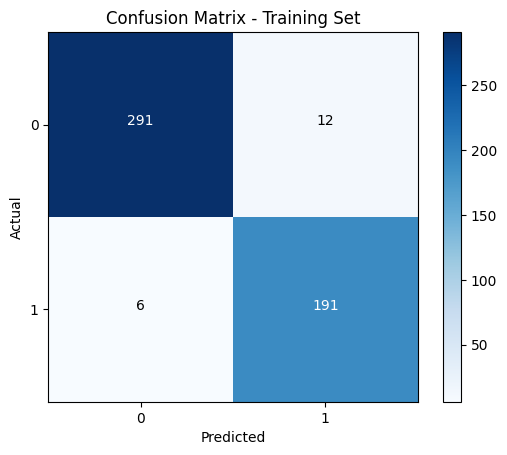

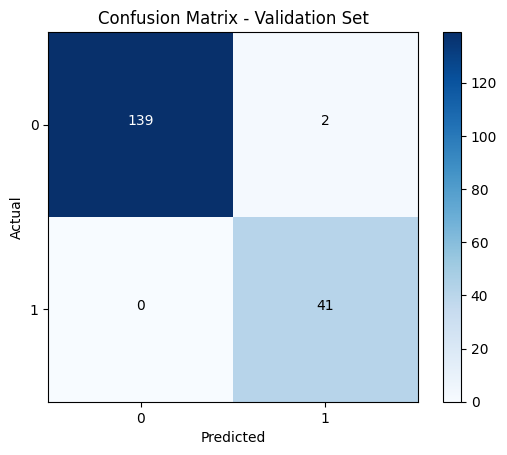

In [22]:
#Logistic Regression, Cross-Entropy Cost function, Stochastic Gradient DEscent using 
#also L2 regularization, here lambda=1
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import itertools

np.set_printoptions(threshold=np.inf)

%matplotlib inline

def plotCf(a, b, t):
    cf = confusion_matrix(a, b)
    plt.imshow(cf, cmap=plt.cm.Blues, interpolation='nearest')
    plt.colorbar()
    plt.title(t)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    tick_marks = np.arange(len(set(a)))  # length of classes
    class_labels = ['0', '1']
    plt.xticks(tick_marks, class_labels)
    plt.yticks(tick_marks, class_labels)
    thresh = cf.max() / 2.
    for i, j in itertools.product(range(cf.shape[0]), range(cf.shape[1])):
        plt.text(j, i, format(cf[i, j], 'd'), horizontalalignment='center', color='white' if cf[i, j] > thresh else 'black')
    plt.show()

class LogisticRegressionWithL2:
    def __init__(self, X, y, learning_rate=0.01, iterations=1000, l2_lambda=1):
        self.X = X
        self.y = y
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.l2_lambda = l2_lambda
        self.theta = None
        self.loss_history = []

    def sigmoid(self, Z):
        return 1 / (1 + np.exp(-Z))

    def loss(self, h, y, theta):
        reg_term = (self.l2_lambda / (2 * y.size)) * np.sum(np.square(theta[1:]))
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean() + reg_term

    def fit(self):
        self.theta = np.zeros(self.X.shape[1])

        for i in range(self.iterations):
            Z = np.dot(self.X, self.theta)
            h = self.sigmoid(Z)
            gradient = (np.dot(self.X.T, (h - self.y)) + self.l2_lambda * self.theta) / self.y.size
            gradient[0] -= self.l2_lambda * self.theta[0]  # Don't regularize the bias term
            self.theta -= self.learning_rate * gradient

            loss = self.loss(h, self.y, self.theta)
            self.loss_history.append(loss)

            if i % 500 == 0:
                print(f'Iteration {i}, Loss: {loss}')

    def predict(self, X, threshold=0.5):
        Z = np.dot(X, self.theta)
        h = self.sigmoid(Z)
        return (h > threshold).astype(int)

    def evaluate(self, X, y, threshold=0.5):
        predictions = self.predict(X, threshold)
        accuracy = (predictions == y).mean()
        return accuracy

# Load and preprocess the dataset
df = pd.read_csv('data1.csv', header=None)
df = df[~df[6].isin(['?'])]
df = df.astype(float)
df.iloc[:, 10].replace(2, 0, inplace=True)
df.iloc[:, 10].replace(4, 1, inplace=True)

scaled_df = df
names = df.columns[0:10]
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df.iloc[:, 0:10])
scaled_df = pd.DataFrame(scaled_df, columns=names)

x = scaled_df.iloc[0:500, 1:10].values
y = df.iloc[0:500, 10].values

xval = scaled_df.iloc[501:683, 1:10].values
yval = df.iloc[501:683, 10].values

# Train the Logistic Regression model
lr_with_l2 = LogisticRegressionWithL2(x, y, l2_lambda=0.1)
lr_with_l2.fit()

# Make predictions on the training set and validation set
pred_train_with_l2 = lr_with_l2.predict(x)
pred_val_with_l2 = lr_with_l2.predict(xval)

# Evaluate the model
train_accuracy_with_l2 = lr_with_l2.evaluate(x, y)
val_accuracy_with_l2 = lr_with_l2.evaluate(xval, yval)

print(f"Training Accuracy (with L2 regularization): {train_accuracy_with_l2}")
print(f"Validation Accuracy (with L2 regularization): {val_accuracy_with_l2}")

# Plot confusion matrices
plotCf(y, pred_train, 'Confusion Matrix - Training Set')
plotCf(yval, pred_val, 'Confusion Matrix - Validation Set')

Iteration 0, Loss: 0.6931471901876068
Iteration 500, Loss: 0.14759774705797452
Training Accuracy (with L2 regularization): 0.966
Validation Accuracy (with L2 regularization): 0.989010989010989


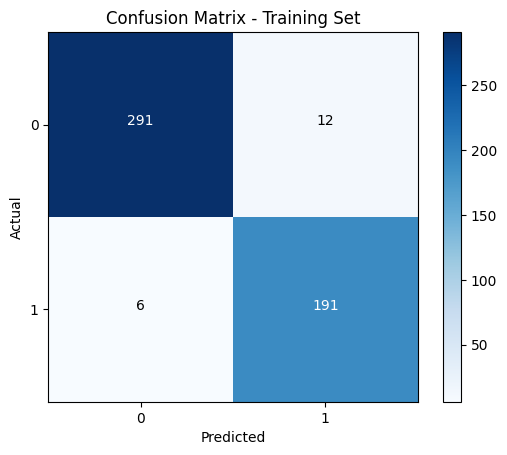

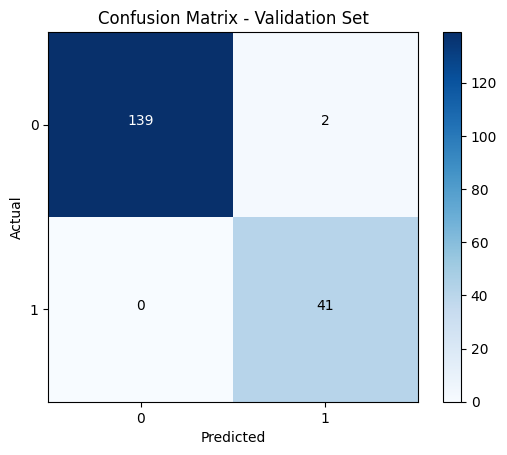

In [23]:
#Logistic Regression, Cross-Entropy Cost function, Stochastic Gradient DEscent using 
#also L2 regularization, here lambda=0.001
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import itertools

np.set_printoptions(threshold=np.inf)

%matplotlib inline

def plotCf(a, b, t):
    cf = confusion_matrix(a, b)
    plt.imshow(cf, cmap=plt.cm.Blues, interpolation='nearest')
    plt.colorbar()
    plt.title(t)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    tick_marks = np.arange(len(set(a)))  # length of classes
    class_labels = ['0', '1']
    plt.xticks(tick_marks, class_labels)
    plt.yticks(tick_marks, class_labels)
    thresh = cf.max() / 2.
    for i, j in itertools.product(range(cf.shape[0]), range(cf.shape[1])):
        plt.text(j, i, format(cf[i, j], 'd'), horizontalalignment='center', color='white' if cf[i, j] > thresh else 'black')
    plt.show()

class LogisticRegressionWithL2:
    def __init__(self, X, y, learning_rate=0.01, iterations=1000, l2_lambda=1):
        self.X = X
        self.y = y
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.l2_lambda = l2_lambda
        self.theta = None
        self.loss_history = []

    def sigmoid(self, Z):
        return 1 / (1 + np.exp(-Z))

    def loss(self, h, y, theta):
        reg_term = (self.l2_lambda / (2 * y.size)) * np.sum(np.square(theta[1:]))
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean() + reg_term

    def fit(self):
        self.theta = np.zeros(self.X.shape[1])

        for i in range(self.iterations):
            Z = np.dot(self.X, self.theta)
            h = self.sigmoid(Z)
            gradient = (np.dot(self.X.T, (h - self.y)) + self.l2_lambda * self.theta) / self.y.size
            gradient[0] -= self.l2_lambda * self.theta[0]  # Don't regularize the bias term
            self.theta -= self.learning_rate * gradient

            loss = self.loss(h, self.y, self.theta)
            self.loss_history.append(loss)

            if i % 500 == 0:
                print(f'Iteration {i}, Loss: {loss}')

    def predict(self, X, threshold=0.5):
        Z = np.dot(X, self.theta)
        h = self.sigmoid(Z)
        return (h > threshold).astype(int)

    def evaluate(self, X, y, threshold=0.5):
        predictions = self.predict(X, threshold)
        accuracy = (predictions == y).mean()
        return accuracy

# Load and preprocess the dataset
df = pd.read_csv('data1.csv', header=None)
df = df[~df[6].isin(['?'])]
df = df.astype(float)
df.iloc[:, 10].replace(2, 0, inplace=True)
df.iloc[:, 10].replace(4, 1, inplace=True)

scaled_df = df
names = df.columns[0:10]
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df.iloc[:, 0:10])
scaled_df = pd.DataFrame(scaled_df, columns=names)

x = scaled_df.iloc[0:500, 1:10].values
y = df.iloc[0:500, 10].values

xval = scaled_df.iloc[501:683, 1:10].values
yval = df.iloc[501:683, 10].values

# Train the Logistic Regression model
lr_with_l2 = LogisticRegressionWithL2(x, y, l2_lambda=0.1)
lr_with_l2.fit()

# Make predictions on the training set and validation set
pred_train_with_l2 = lr_with_l2.predict(x)
pred_val_with_l2 = lr_with_l2.predict(xval)

# Evaluate the model
train_accuracy_with_l2 = lr_with_l2.evaluate(x, y)
val_accuracy_with_l2 = lr_with_l2.evaluate(xval, yval)

print(f"Training Accuracy (with L2 regularization): {train_accuracy_with_l2}")
print(f"Validation Accuracy (with L2 regularization): {val_accuracy_with_l2}")

# Plot confusion matrices
plotCf(y, pred_train, 'Confusion Matrix - Training Set')
plotCf(yval, pred_val, 'Confusion Matrix - Validation Set')

Iteration 0, Loss: 0.6931471901876068
Iteration 500, Loss: 0.14759774705797452
Training Accuracy (with L2 regularization): 0.966
Validation Accuracy (with L2 regularization): 0.989010989010989


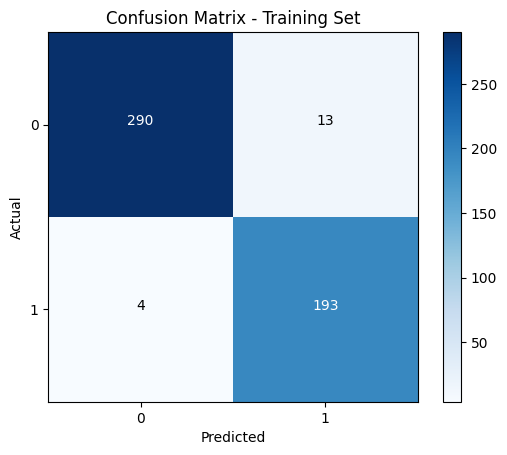

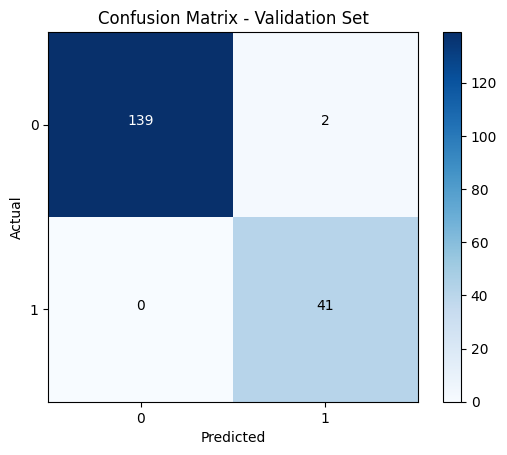

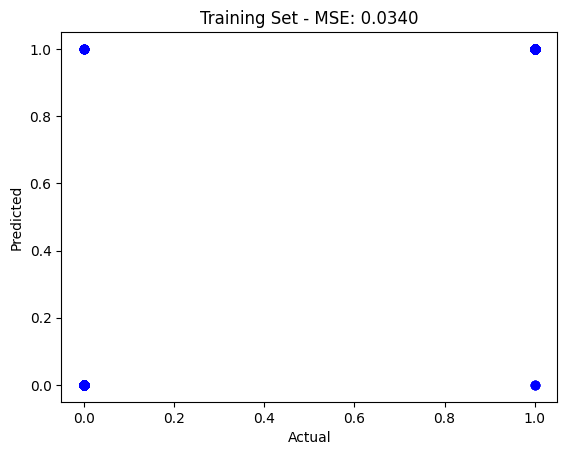

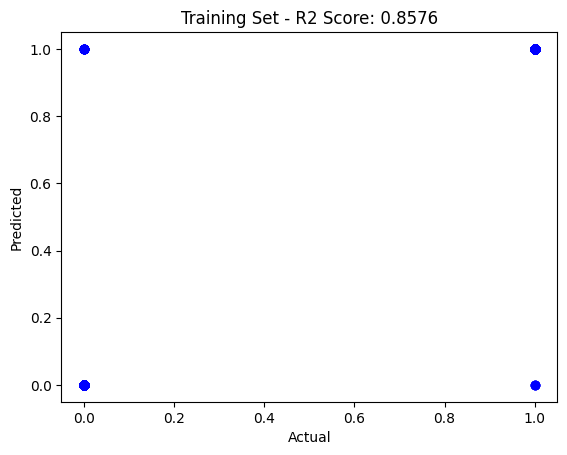

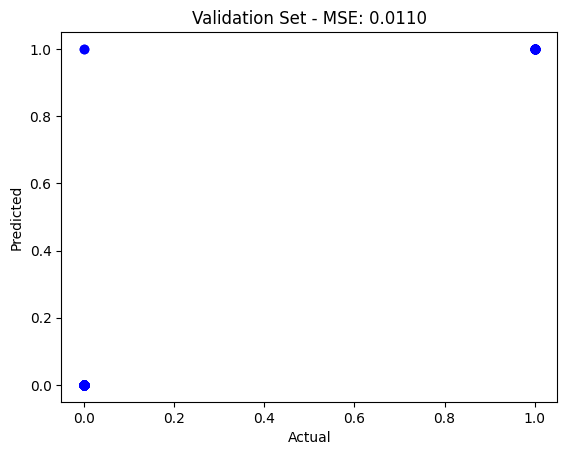

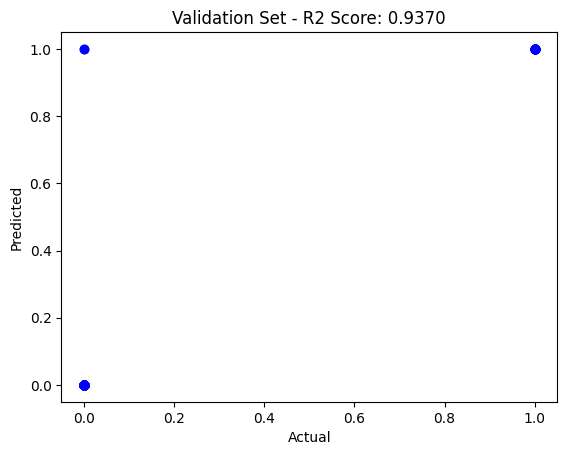

In [51]:
#Logistic Regression, Cross-Entropy Cost function, Stochastic Gradient DEscent using 
#also L2 regularization, with also MSE and R2, here lambda=0.1
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, mean_squared_error, r2_score
import itertools

np.set_printoptions(threshold=np.inf)

%matplotlib inline

class LogisticRegressionWithL2:
    def __init__(self, X, y, learning_rate=0.01, iterations=1000, l2_lambda=1):
        self.X = X
        self.y = y
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.l2_lambda = l2_lambda
        self.theta = None
        self.loss_history = []

    def sigmoid(self, Z):
        return 1 / (1 + np.exp(-Z))

    def loss(self, h, y, theta):
        reg_term = (self.l2_lambda / (2 * y.size)) * np.sum(np.square(theta[1:]))
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean() + reg_term

    def fit(self):
        self.theta = np.zeros(self.X.shape[1])

        for i in range(self.iterations):
            Z = np.dot(self.X, self.theta)
            h = self.sigmoid(Z)
            gradient = (np.dot(self.X.T, (h - self.y)) + self.l2_lambda * self.theta) / self.y.size
            gradient[0] -= self.l2_lambda * self.theta[0]  # Don't regularize the bias term
            self.theta -= self.learning_rate * gradient

            loss = self.loss(h, self.y, self.theta)
            self.loss_history.append(loss)

            if i % 500 == 0:
                print(f'Iteration {i}, Loss: {loss}')

    def predict(self, X, threshold=0.5):
        Z = np.dot(X, self.theta)
        h = self.sigmoid(Z)
        return (h > threshold).astype(int)

    def evaluate(self, X, y, threshold=0.5):
        predictions = self.predict(X, threshold)
        accuracy = (predictions == y).mean()
        return accuracy

def plotCf(a, b, t):
    cf = confusion_matrix(a, b)
    plt.imshow(cf, cmap=plt.cm.Blues, interpolation='nearest')
    plt.colorbar()
    plt.title(t)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    tick_marks = np.arange(len(set(a)))  # length of classes
    class_labels = ['0', '1']
    plt.xticks(tick_marks, class_labels)
    plt.yticks(tick_marks, class_labels)
    thresh = cf.max() / 2.
    for i, j in itertools.product(range(cf.shape[0]), range(cf.shape[1])):
        plt.text(j, i, format(cf[i, j], 'd'), horizontalalignment='center', color='white' if cf[i, j] > thresh else 'black')
    plt.show()

def plotMSE(y, y_pred, title):
    mse = mean_squared_error(y, y_pred)
    plt.figure()
    plt.plot(y, y_pred, 'bo')
    plt.title(f'{title} - MSE: {mse:.4f}')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.show()

def plotR2(y, y_pred, title):
    r2 = r2_score(y, y_pred)
    plt.figure()
    plt.plot(y, y_pred, 'bo')
    plt.title(f'{title} - R2 Score: {r2:.4f}')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.show()

# Load and preprocess the dataset
df = pd.read_csv('data1.csv', header=None)
df = df[~df[6].isin(['?'])]
df = df.astype(float)
df.iloc[:, 10].replace(2, 0, inplace=True)
df.iloc[:, 10].replace(4, 1, inplace=True)

scaled_df = df
names = df.columns[0:10]
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df.iloc[:, 0:10])
scaled_df = pd.DataFrame(scaled_df, columns=names)

x = scaled_df.iloc[0:500, 1:10].values
y = df.iloc[0:500, 10].values

xval = scaled_df.iloc[501:683, 1:10].values
yval = df.iloc[501:683, 10].values

# Train the Logistic Regression model
lr_with_l2 = LogisticRegressionWithL2(x, y, l2_lambda=0.1)
lr_with_l2.fit()

# Make predictions on the training set and validation set
pred_train_with_l2 = lr_with_l2.predict(x)
pred_val_with_l2 = lr_with_l2.predict(xval)

# Evaluate the model
train_accuracy_with_l2 = lr_with_l2.evaluate(x, y)
val_accuracy_with_l2 = lr_with_l2.evaluate(xval, yval)

print(f"Training Accuracy (with L2 regularization): {train_accuracy_with_l2}")
print(f"Validation Accuracy (with L2 regularization): {val_accuracy_with_l2}")

# Plot confusion matrices
plotCf(y, pred_train_with_l2, 'Confusion Matrix - Training Set')
plotCf(yval, pred_val_with_l2, 'Confusion Matrix - Validation Set')

# Calculate and plot MSE and R2 for training and validation sets
plotMSE(y, pred_train_with_l2, 'Training Set')
plotR2(y, pred_train_with_l2, 'Training Set')
plotMSE(yval, pred_val_with_l2, 'Validation Set')
plotR2(yval, pred_val_with_l2, 'Validation Set')

Iteration 0, Loss: 0.6931471815227115
Iteration 500, Loss: 0.15158856560958744
Training Accuracy (with L2 regularization): 0.966
Validation Accuracy (with L2 regularization): 0.989010989010989


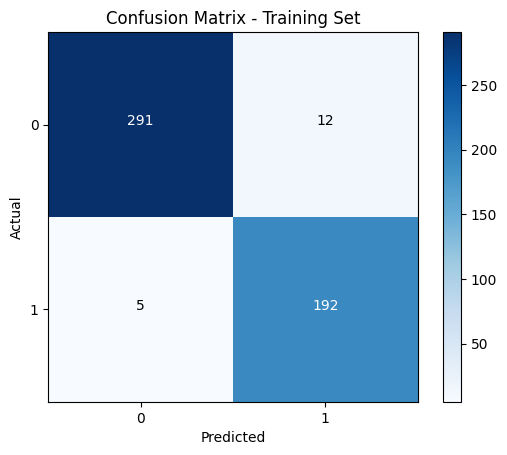

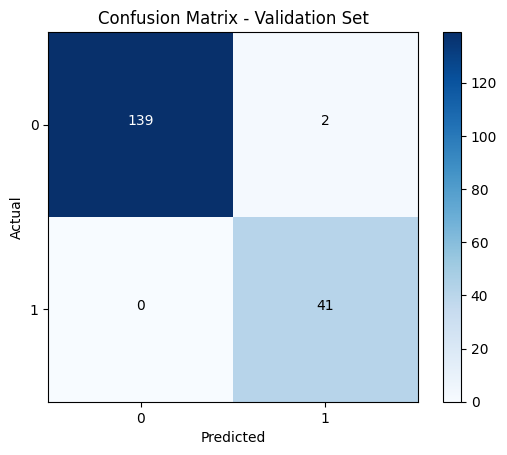

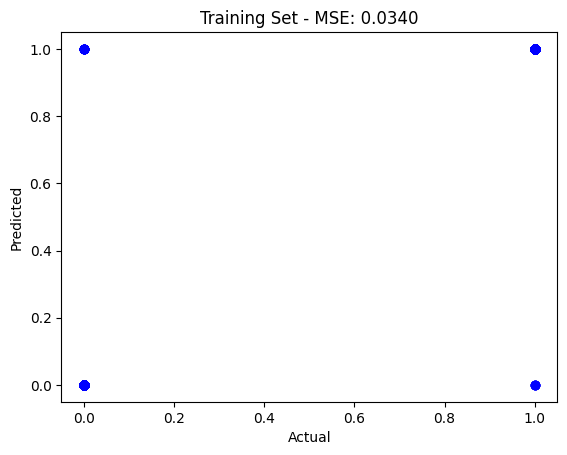

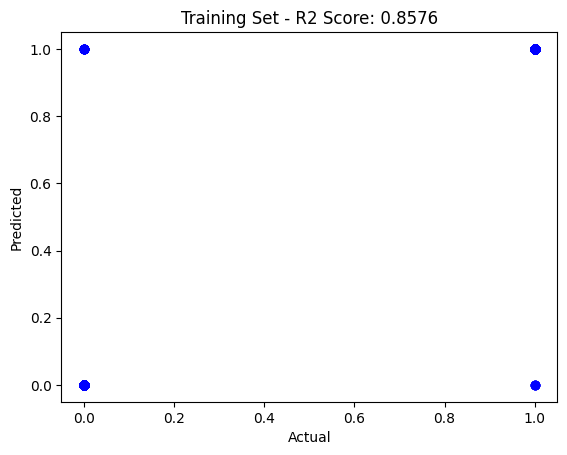

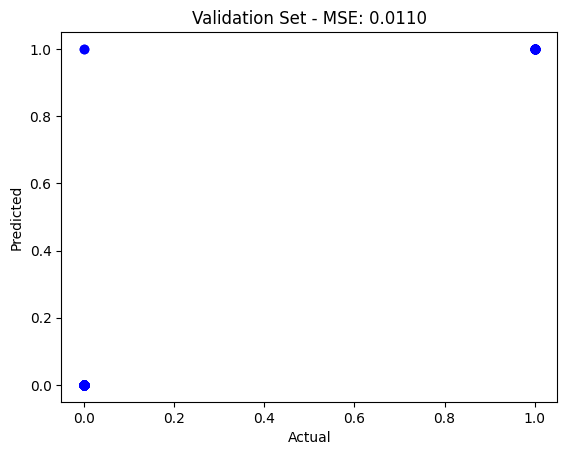

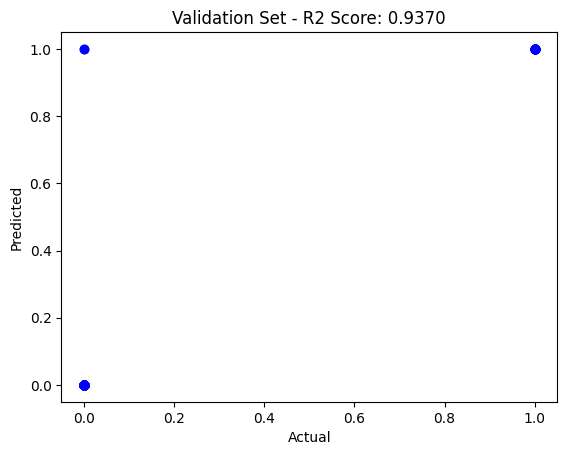

In [52]:
#Logistic Regression, Cross-Entropy Cost function, Stochastic Gradient DEscent using 
#also L2 regularization, with also MSE and R2, here lambda=0.01
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, mean_squared_error, r2_score
import itertools

np.set_printoptions(threshold=np.inf)

%matplotlib inline

class LogisticRegressionWithL2:
    def __init__(self, X, y, learning_rate=0.01, iterations=1000, l2_lambda=1):
        self.X = X
        self.y = y
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.l2_lambda = l2_lambda
        self.theta = None
        self.loss_history = []

    def sigmoid(self, Z):
        return 1 / (1 + np.exp(-Z))

    def loss(self, h, y, theta):
        reg_term = (self.l2_lambda / (2 * y.size)) * np.sum(np.square(theta[1:]))
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean() + reg_term

    def fit(self):
        self.theta = np.zeros(self.X.shape[1])

        for i in range(self.iterations):
            Z = np.dot(self.X, self.theta)
            h = self.sigmoid(Z)
            gradient = (np.dot(self.X.T, (h - self.y)) + self.l2_lambda * self.theta) / self.y.size
            gradient[0] -= self.l2_lambda * self.theta[0]  # Don't regularize the bias term
            self.theta -= self.learning_rate * gradient

            loss = self.loss(h, self.y, self.theta)
            self.loss_history.append(loss)

            if i % 500 == 0:
                print(f'Iteration {i}, Loss: {loss}')

    def predict(self, X, threshold=0.5):
        Z = np.dot(X, self.theta)
        h = self.sigmoid(Z)
        return (h > threshold).astype(int)

    def evaluate(self, X, y, threshold=0.5):
        predictions = self.predict(X, threshold)
        accuracy = (predictions == y).mean()
        return accuracy

def plotCf(a, b, t):
    cf = confusion_matrix(a, b)
    plt.imshow(cf, cmap=plt.cm.Blues, interpolation='nearest')
    plt.colorbar()
    plt.title(t)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    tick_marks = np.arange(len(set(a)))  # length of classes
    class_labels = ['0', '1']
    plt.xticks(tick_marks, class_labels)
    plt.yticks(tick_marks, class_labels)
    thresh = cf.max() / 2.
    for i, j in itertools.product(range(cf.shape[0]), range(cf.shape[1])):
        plt.text(j, i, format(cf[i, j], 'd'), horizontalalignment='center', color='white' if cf[i, j] > thresh else 'black')
    plt.show()

def plotMSE(y, y_pred, title):
    mse = mean_squared_error(y, y_pred)
    plt.figure()
    plt.plot(y, y_pred, 'bo')
    plt.title(f'{title} - MSE: {mse:.4f}')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.show()

def plotR2(y, y_pred, title):
    r2 = r2_score(y, y_pred)
    plt.figure()
    plt.plot(y, y_pred, 'bo')
    plt.title(f'{title} - R2 Score: {r2:.4f}')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.show()

# Load and preprocess the dataset
df = pd.read_csv('data1.csv', header=None)
df = df[~df[6].isin(['?'])]
df = df.astype(float)
df.iloc[:, 10].replace(2, 0, inplace=True)
df.iloc[:, 10].replace(4, 1, inplace=True)

scaled_df = df
names = df.columns[0:10]
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df.iloc[:, 0:10])
scaled_df = pd.DataFrame(scaled_df, columns=names)

x = scaled_df.iloc[0:500, 1:10].values
y = df.iloc[0:500, 10].values

xval = scaled_df.iloc[501:683, 1:10].values
yval = df.iloc[501:683, 10].values

# Train the Logistic Regression model
lr_with_l2 = LogisticRegressionWithL2(x, y, l2_lambda=0.01)
lr_with_l2.fit()

# Make predictions on the training set and validation set
pred_train_with_l2 = lr_with_l2.predict(x)
pred_val_with_l2 = lr_with_l2.predict(xval)

# Evaluate the model
train_accuracy_with_l2 = lr_with_l2.evaluate(x, y)
val_accuracy_with_l2 = lr_with_l2.evaluate(xval, yval)

print(f"Training Accuracy (with L2 regularization): {train_accuracy_with_l2}")
print(f"Validation Accuracy (with L2 regularization): {val_accuracy_with_l2}")

# Plot confusion matrices
plotCf(y, pred_train_with_l2, 'Confusion Matrix - Training Set')
plotCf(yval, pred_val_with_l2, 'Confusion Matrix - Validation Set')

# Calculate and plot MSE and R2 for training and validation sets
plotMSE(y, pred_train_with_l2, 'Training Set')
plotR2(y, pred_train_with_l2, 'Training Set')
plotMSE(yval, pred_val_with_l2, 'Validation Set')
plotR2(yval, pred_val_with_l2, 'Validation Set')

Iteration 0, Loss: 0.693147180656222
Iteration 500, Loss: 0.1519598456881279
Training Accuracy (with L2 regularization): 0.964
Validation Accuracy (with L2 regularization): 0.989010989010989


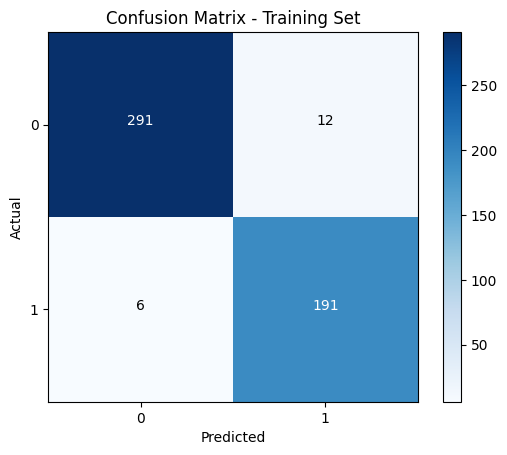

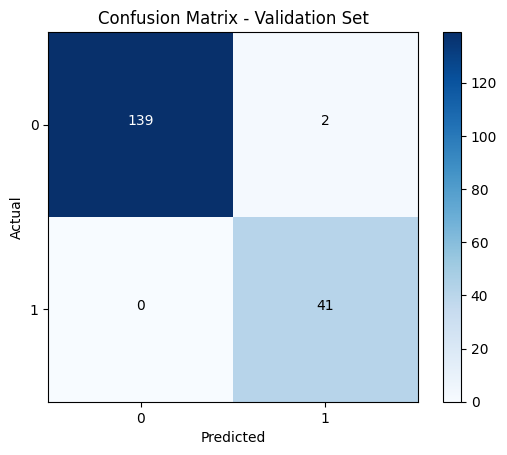

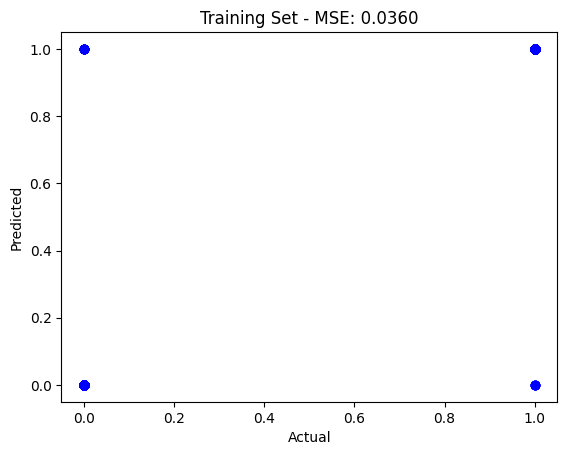

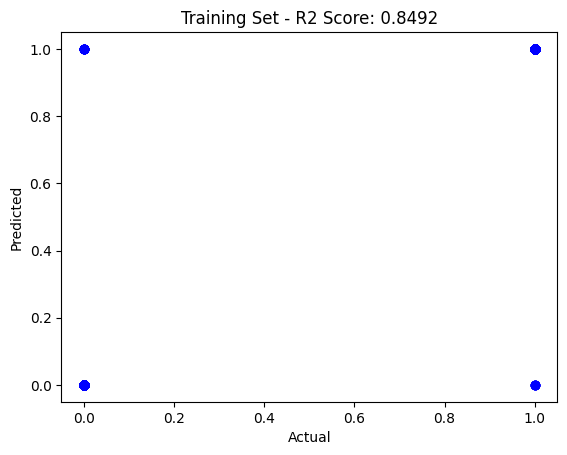

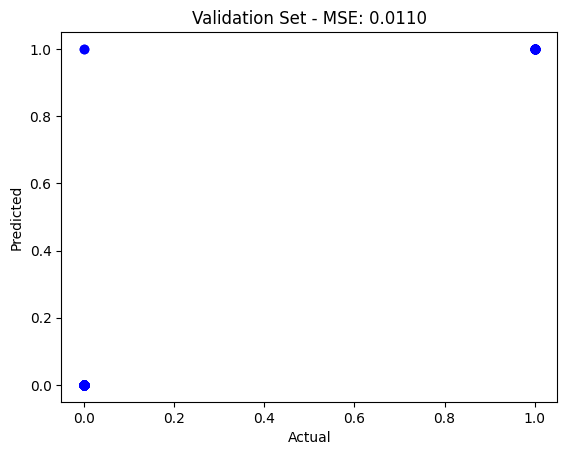

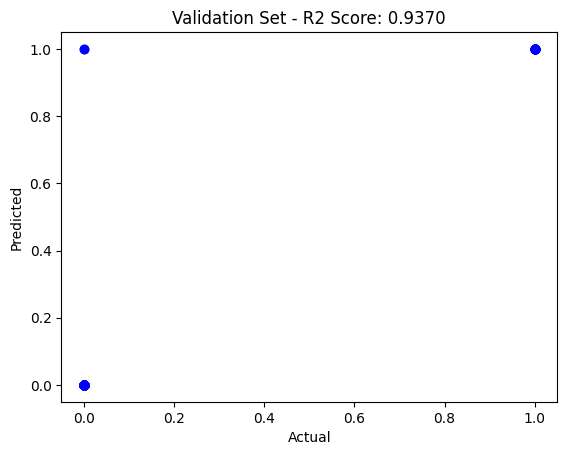

In [53]:
#Logistic Regression, Cross-Entropy Cost function, Stochastic Gradient DEscent using 
#also L2 regularization, with also MSE and R2, here lambda=0.001
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, mean_squared_error, r2_score
import itertools

np.set_printoptions(threshold=np.inf)

%matplotlib inline

class LogisticRegressionWithL2:
    def __init__(self, X, y, learning_rate=0.01, iterations=1000, l2_lambda=1):
        self.X = X
        self.y = y
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.l2_lambda = l2_lambda
        self.theta = None
        self.loss_history = []

    def sigmoid(self, Z):
        return 1 / (1 + np.exp(-Z))

    def loss(self, h, y, theta):
        reg_term = (self.l2_lambda / (2 * y.size)) * np.sum(np.square(theta[1:]))
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean() + reg_term

    def fit(self):
        self.theta = np.zeros(self.X.shape[1])

        for i in range(self.iterations):
            Z = np.dot(self.X, self.theta)
            h = self.sigmoid(Z)
            gradient = (np.dot(self.X.T, (h - self.y)) + self.l2_lambda * self.theta) / self.y.size
            gradient[0] -= self.l2_lambda * self.theta[0]  # Don't regularize the bias term
            self.theta -= self.learning_rate * gradient

            loss = self.loss(h, self.y, self.theta)
            self.loss_history.append(loss)

            if i % 500 == 0:
                print(f'Iteration {i}, Loss: {loss}')

    def predict(self, X, threshold=0.5):
        Z = np.dot(X, self.theta)
        h = self.sigmoid(Z)
        return (h > threshold).astype(int)

    def evaluate(self, X, y, threshold=0.5):
        predictions = self.predict(X, threshold)
        accuracy = (predictions == y).mean()
        return accuracy


def plotCf(a, b, t):
    cf = confusion_matrix(a, b)
    plt.imshow(cf, cmap=plt.cm.Blues, interpolation='nearest')
    plt.colorbar()
    plt.title(t)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    tick_marks = np.arange(len(set(a)))  # length of classes
    class_labels = ['0', '1']
    plt.xticks(tick_marks, class_labels)
    plt.yticks(tick_marks, class_labels)
    thresh = cf.max() / 2.
    for i, j in itertools.product(range(cf.shape[0]), range(cf.shape[1])):
        plt.text(j, i, format(cf[i, j], 'd'), horizontalalignment='center', color='white' if cf[i, j] > thresh else 'black')
    plt.show()

def plotMSE(y, y_pred, title):
    mse = mean_squared_error(y, y_pred)
    plt.figure()
    plt.plot(y, y_pred, 'bo')
    plt.title(f'{title} - MSE: {mse:.4f}')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.show()

def plotR2(y, y_pred, title):
    r2 = r2_score(y, y_pred)
    plt.figure()
    plt.plot(y, y_pred, 'bo')
    plt.title(f'{title} - R2 Score: {r2:.4f}')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.show()

# Load and preprocess the dataset
df = pd.read_csv('data1.csv', header=None)
df = df[~df[6].isin(['?'])]
df = df.astype(float)
df.iloc[:, 10].replace(2, 0, inplace=True)
df.iloc[:, 10].replace(4, 1, inplace=True)

scaled_df = df
names = df.columns[0:10]
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df.iloc[:, 0:10])
scaled_df = pd.DataFrame(scaled_df, columns=names)

x = scaled_df.iloc[0:500, 1:10].values
y = df.iloc[0:500, 10].values

xval = scaled_df.iloc[501:683, 1:10].values
yval = df.iloc[501:683, 10].values

# Train the Logistic Regression model
lr_with_l2 = LogisticRegressionWithL2(x, y, l2_lambda=0.001)
lr_with_l2.fit()

# Make predictions on the training set and validation set
pred_train_with_l2 = lr_with_l2.predict(x)
pred_val_with_l2 = lr_with_l2.predict(xval)

# Evaluate the model
train_accuracy_with_l2 = lr_with_l2.evaluate(x, y)
val_accuracy_with_l2 = lr_with_l2.evaluate(xval, yval)

print(f"Training Accuracy (with L2 regularization): {train_accuracy_with_l2}")
print(f"Validation Accuracy (with L2 regularization): {val_accuracy_with_l2}")

# Plot confusion matrices
plotCf(y, pred_train_with_l2, 'Confusion Matrix - Training Set')
plotCf(yval, pred_val_with_l2, 'Confusion Matrix - Validation Set')

# Calculate and plot MSE and R2 for training and validation sets
plotMSE(y, pred_train_with_l2, 'Training Set')
plotR2(y, pred_train_with_l2, 'Training Set')
plotMSE(yval, pred_val_with_l2, 'Validation Set')
plotR2(yval, pred_val_with_l2, 'Validation Set')

Iteration 0, Loss: 0.693147180656222
Iteration 500, Loss: 0.1519598456881279
Training Accuracy (with L2 regularization): 0.964
Validation Accuracy (with L2 regularization): 0.989010989010989


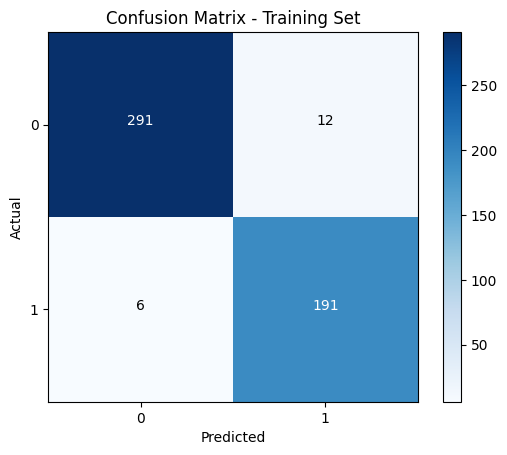

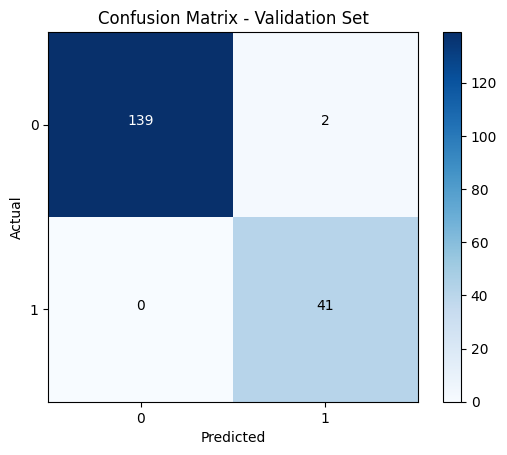

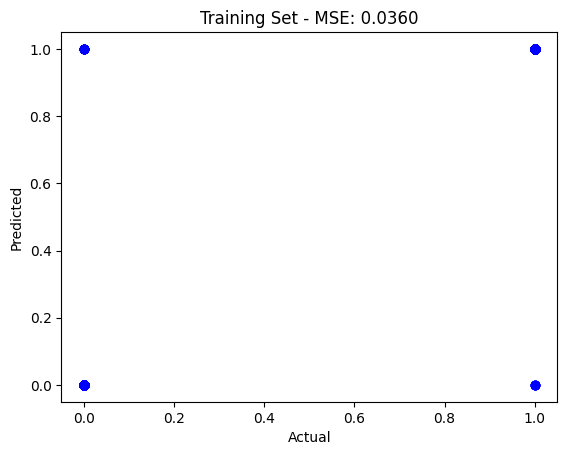

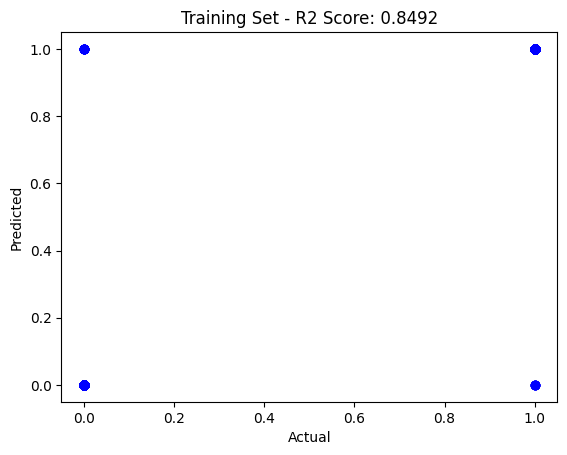

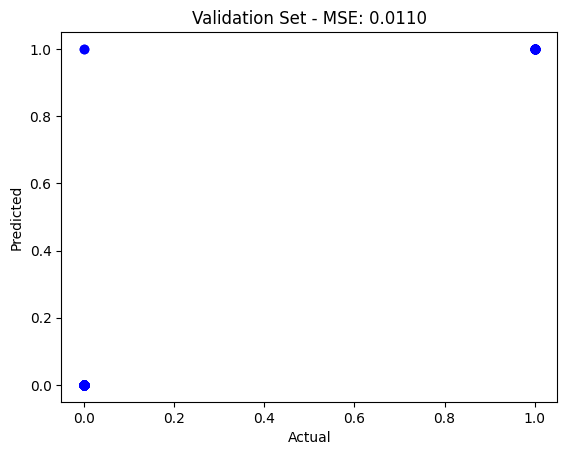

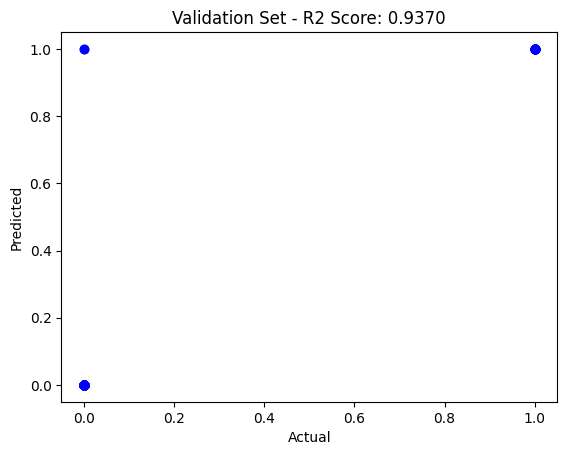

In [54]:
#Logistic Regression, Cross-Entropy Cost function, Stochastic Gradient DEscent using 
#also L2 regularization, with also MSE and R2, here lambda=1
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, mean_squared_error, r2_score
import itertools

np.set_printoptions(threshold=np.inf)

%matplotlib inline

class LogisticRegressionWithL2:
    def __init__(self, X, y, learning_rate=0.01, iterations=1000, l2_lambda=1):
        self.X = X
        self.y = y
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.l2_lambda = l2_lambda
        self.theta = None
        self.loss_history = []

    def sigmoid(self, Z):
        return 1 / (1 + np.exp(-Z))

    def loss(self, h, y, theta):
        reg_term = (self.l2_lambda / (2 * y.size)) * np.sum(np.square(theta[1:]))
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean() + reg_term

    def fit(self):
        self.theta = np.zeros(self.X.shape[1])

        for i in range(self.iterations):
            Z = np.dot(self.X, self.theta)
            h = self.sigmoid(Z)
            gradient = (np.dot(self.X.T, (h - self.y)) + self.l2_lambda * self.theta) / self.y.size
            gradient[0] -= self.l2_lambda * self.theta[0]  # Don't regularize the bias term
            self.theta -= self.learning_rate * gradient

            loss = self.loss(h, self.y, self.theta)
            self.loss_history.append(loss)

            if i % 500 == 0:
                print(f'Iteration {i}, Loss: {loss}')

    def predict(self, X, threshold=0.5):
        Z = np.dot(X, self.theta)
        h = self.sigmoid(Z)
        return (h > threshold).astype(int)

    def evaluate(self, X, y, threshold=0.5):
        predictions = self.predict(X, threshold)
        accuracy = (predictions == y).mean()
        return accuracy


def plotCf(a, b, t):
    cf = confusion_matrix(a, b)
    plt.imshow(cf, cmap=plt.cm.Blues, interpolation='nearest')
    plt.colorbar()
    plt.title(t)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    tick_marks = np.arange(len(set(a)))  # length of classes
    class_labels = ['0', '1']
    plt.xticks(tick_marks, class_labels)
    plt.yticks(tick_marks, class_labels)
    thresh = cf.max() / 2.
    for i, j in itertools.product(range(cf.shape[0]), range(cf.shape[1])):
        plt.text(j, i, format(cf[i, j], 'd'), horizontalalignment='center', color='white' if cf[i, j] > thresh else 'black')
    plt.show()

def plotMSE(y, y_pred, title):
    mse = mean_squared_error(y, y_pred)
    plt.figure()
    plt.plot(y, y_pred, 'bo')
    plt.title(f'{title} - MSE: {mse:.4f}')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.show()

def plotR2(y, y_pred, title):
    r2 = r2_score(y, y_pred)
    plt.figure()
    plt.plot(y, y_pred, 'bo')
    plt.title(f'{title} - R2 Score: {r2:.4f}')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.show()

# Load and preprocess the dataset
df = pd.read_csv('data1.csv', header=None)
df = df[~df[6].isin(['?'])]
df = df.astype(float)
df.iloc[:, 10].replace(2, 0, inplace=True)
df.iloc[:, 10].replace(4, 1, inplace=True)

scaled_df = df
names = df.columns[0:10]
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df.iloc[:, 0:10])
scaled_df = pd.DataFrame(scaled_df, columns=names)

x = scaled_df.iloc[0:500, 1:10].values
y = df.iloc[0:500, 10].values

xval = scaled_df.iloc[501:683, 1:10].values
yval = df.iloc[501:683, 10].values

# Train the Logistic Regression model
lr_with_l2 = LogisticRegressionWithL2(x, y, l2_lambda=0.001)
lr_with_l2.fit()

# Make predictions on the training set and validation set
pred_train_with_l2 = lr_with_l2.predict(x)
pred_val_with_l2 = lr_with_l2.predict(xval)

# Evaluate the model
train_accuracy_with_l2 = lr_with_l2.evaluate(x, y)
val_accuracy_with_l2 = lr_with_l2.evaluate(xval, yval)

print(f"Training Accuracy (with L2 regularization): {train_accuracy_with_l2}")
print(f"Validation Accuracy (with L2 regularization): {val_accuracy_with_l2}")

# Plot confusion matrices
plotCf(y, pred_train_with_l2, 'Confusion Matrix - Training Set')
plotCf(yval, pred_val_with_l2, 'Confusion Matrix - Validation Set')

# Calculate and plot MSE and R2 for training and validation sets
plotMSE(y, pred_train_with_l2, 'Training Set')
plotR2(y, pred_train_with_l2, 'Training Set')
plotMSE(yval, pred_val_with_l2, 'Validation Set')
plotR2(yval, pred_val_with_l2, 'Validation Set')

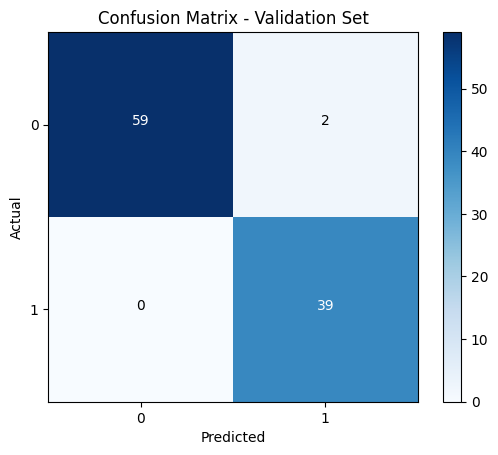

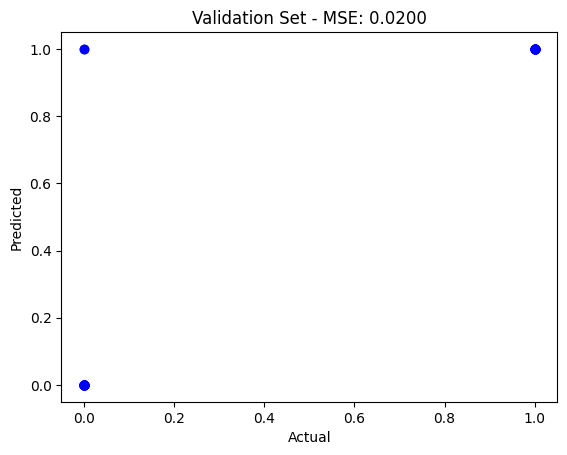

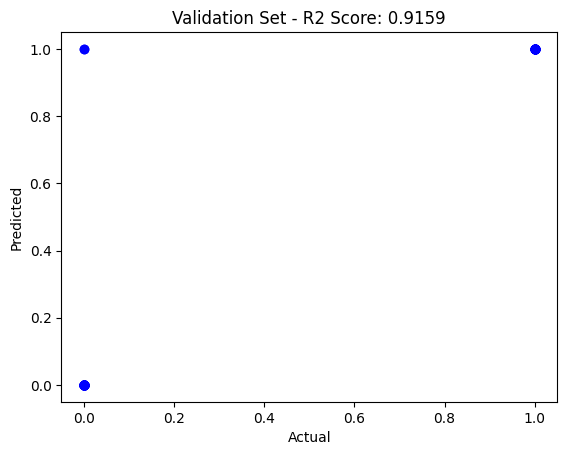

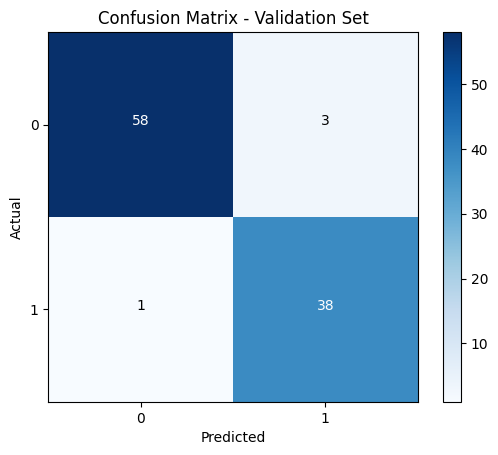

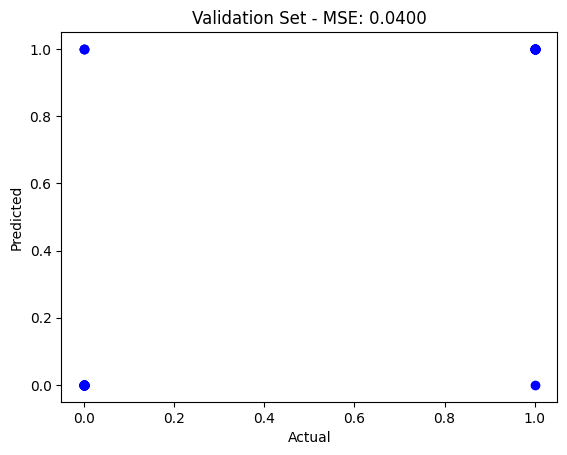

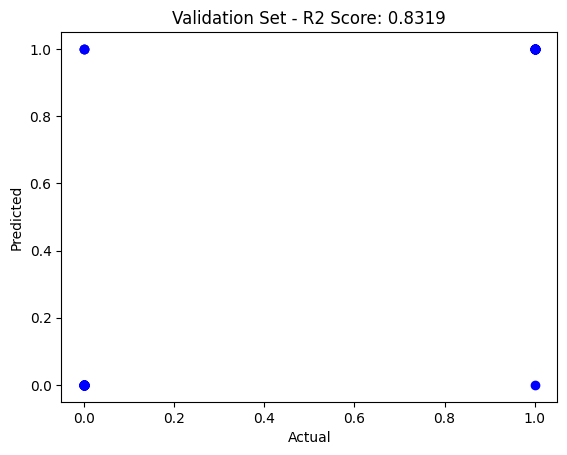

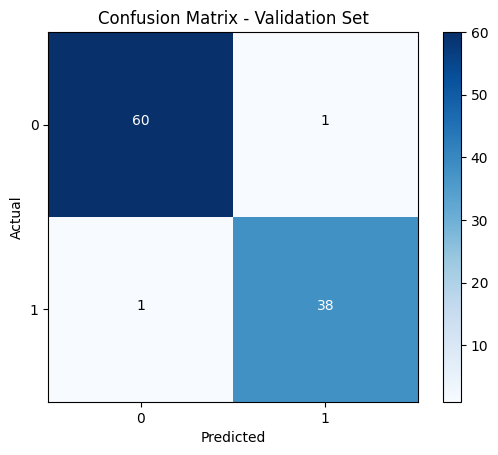

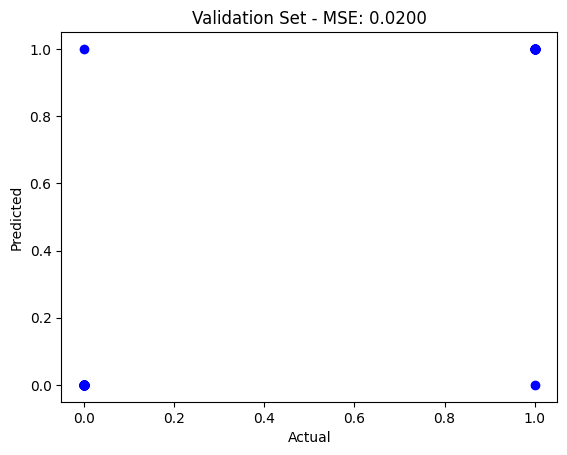

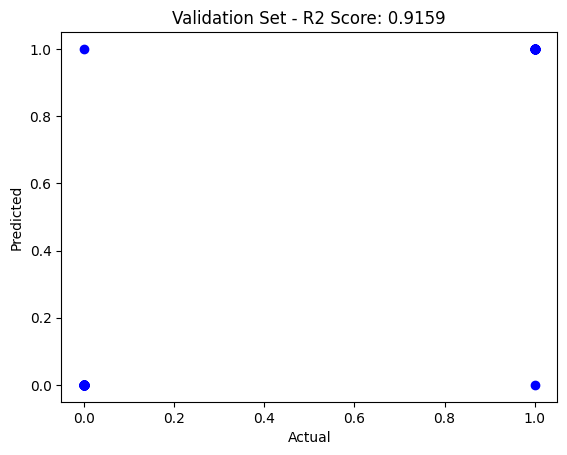

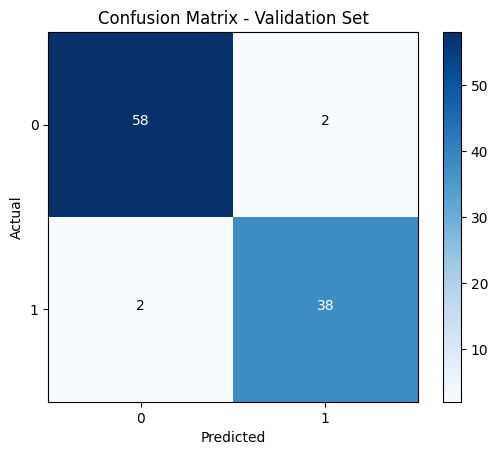

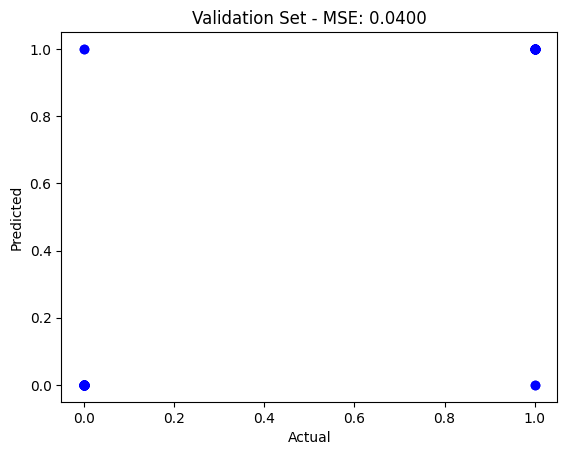

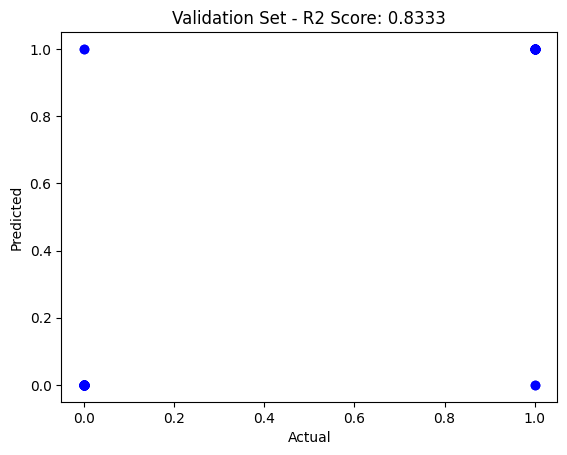

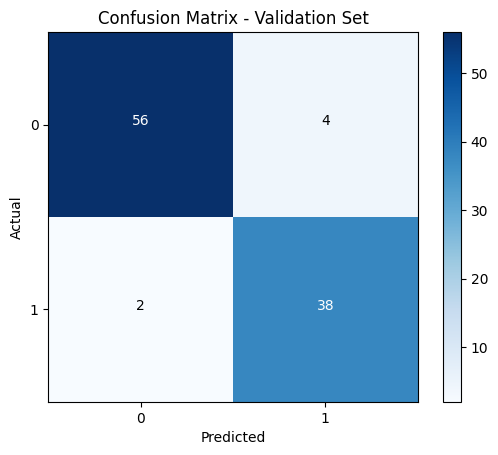

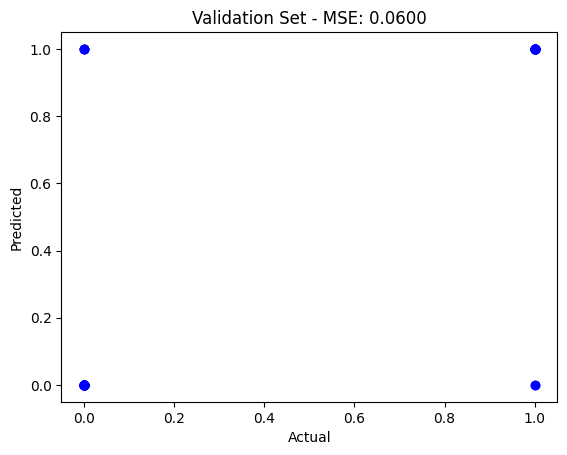

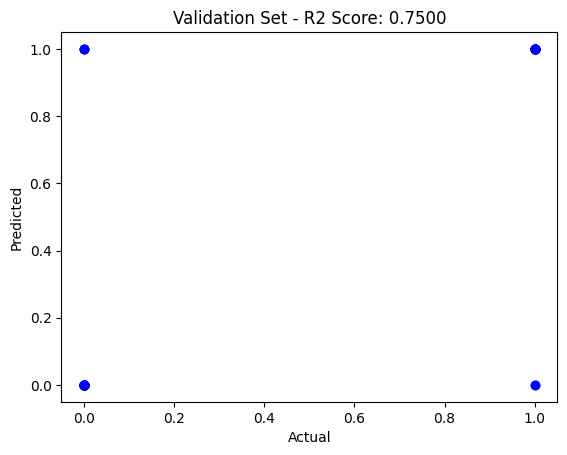

Cross-Validation Accuracy: 0.9640
Cross-Validation MSE: 0.0360
Cross-Validation R2: 0.8494


In [50]:
#Cross-Validated the Logistic Regression:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, mean_squared_error, r2_score
from sklearn.model_selection import StratifiedKFold
import itertools

np.set_printoptions(threshold=np.inf)

%matplotlib inline

def plotCf(a, b, t):
    cf = confusion_matrix(a, b)
    plt.imshow(cf, cmap=plt.cm.Blues, interpolation='nearest')
    plt.colorbar()
    plt.title(t)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    tick_marks = np.arange(len(set(a)))  # length of classes
    class_labels = ['0', '1']
    plt.xticks(tick_marks, class_labels)
    plt.yticks(tick_marks, class_labels)
    thresh = cf.max() / 2.
    for i, j in itertools.product(range(cf.shape[0]), range(cf.shape[1])):
        plt.text(j, i, format(cf[i, j], 'd'), horizontalalignment='center', color='white' if cf[i, j] > thresh else 'black')

def plotMSE(y, y_pred, title):
    mse = mean_squared_error(y, y_pred)
    plt.figure()
    plt.plot(y, y_pred, 'bo')
    plt.title(f'{title} - MSE: {mse:.4f}')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')

def plotR2(y, y_pred, title):
    r2 = r2_score(y, y_pred)
    plt.figure()
    plt.plot(y, y_pred, 'bo')
    plt.title(f'{title} - R2 Score: {r2:.4f}')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')

class LogisticRegressionWithL2:
    def __init__(self, X, y, learning_rate=0.01, iterations=1000, l2_lambda=0.1):
        self.X = X
        self.y = y
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.l2_lambda = l2_lambda
        self.theta = None
        self.loss_history = []

    def fit(self):
        self.theta = np.zeros(self.X.shape[1])

        for i in range(self.iterations):
            Z = np.dot(self.X, self.theta)
            h = 1 / (1 + np.exp(-Z))
            gradient = (np.dot(self.X.T, (h - self.y)) + self.l2_lambda * self.theta) / self.y.size
            gradient[0] -= self.l2_lambda * self.theta[0]  # Don't regularize the bias term
            self.theta -= self.learning_rate * gradient

    def predict(self, X, threshold=0.5):
        Z = np.dot(X, self.theta)
        h = 1 / (1 + np.exp(-Z))
        return (h > threshold).astype(int)

    def evaluate(self, X, y, threshold=0.5):
        predictions = self.predict(X, threshold)
        accuracy = (predictions == y).mean()
        return accuracy
    
    @staticmethod
    def cross_validation(X, y, k=5):
        skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
        accuracies = []
        mse_scores = []
        r2_scores = []

        for train_index, val_index in skf.split(X, y):
            X_train, X_val = X[train_index], X[val_index]
            y_train, y_val = y[train_index], y[val_index]

            lr_with_l2 = LogisticRegressionWithL2(X_train, y_train, l2_lambda=0.01)
            lr_with_l2.fit()

            val_accuracy = lr_with_l2.evaluate(X_val, y_val)
            accuracies.append(val_accuracy)

            y_pred = lr_with_l2.predict(X_val)
            mse = mean_squared_error(y_val, y_pred)
            mse_scores.append(mse)

            r2 = r2_score(y_val, y_pred)
            r2_scores.append(r2)

            # Plot confusion matrix, MSE, and R2
            plotCf(y_val, y_pred, 'Confusion Matrix - Validation Set')
            plt.show()
            plotMSE(y_val, y_pred, 'Validation Set')
            plt.show()
            plotR2(y_val, y_pred, 'Validation Set')
            plt.show()

        return np.mean(accuracies), np.mean(mse_scores), np.mean(r2_scores)

# Load and preprocess the dataset
df = pd.read_csv('data1.csv', header=None)
df = df[~df[6].isin(['?'])]
df = df.astype(float)
df.iloc[:, 10].replace(2, 0, inplace=True)
df.iloc[:, 10].replace(4, 1, inplace=True)

scaled_df = df
names = df.columns[0:10]
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df.iloc[:, 0:10])
scaled_df = pd.DataFrame(scaled_df, columns=names)

X = scaled_df.iloc[0:500, 1:10].values
y = df.iloc[0:500, 10].values

# Apply cross-validation
cv_accuracy, cv_mse, cv_r2 = LogisticRegressionWithL2.cross_validation(X, y, k=5)

print(f"Cross-Validation Accuracy: {cv_accuracy:.4f}")
print(f"Cross-Validation MSE: {cv_mse:.4f}")
print(f"Cross-Validation R2: {cv_r2:.4f}")

Iteration 0, Loss: 0.6931471901876068
Iteration 500, Loss: 0.1110791959599416
Training Accuracy (with L2 regularization): 0.97
Validation Accuracy (with L2 regularization): 0.989010989010989


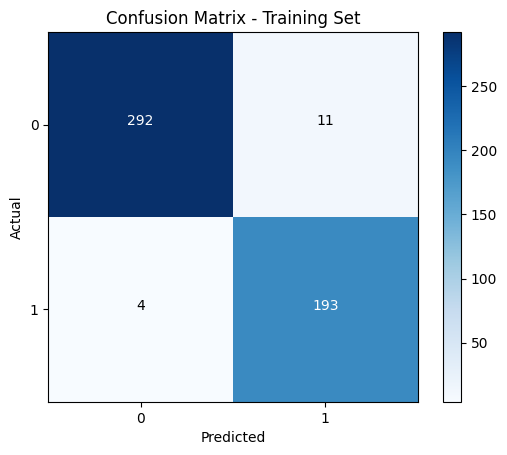

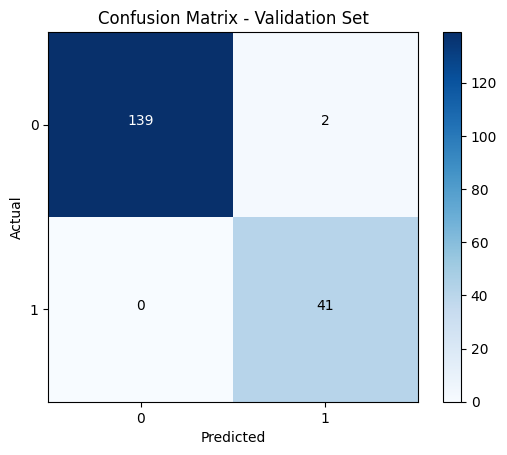

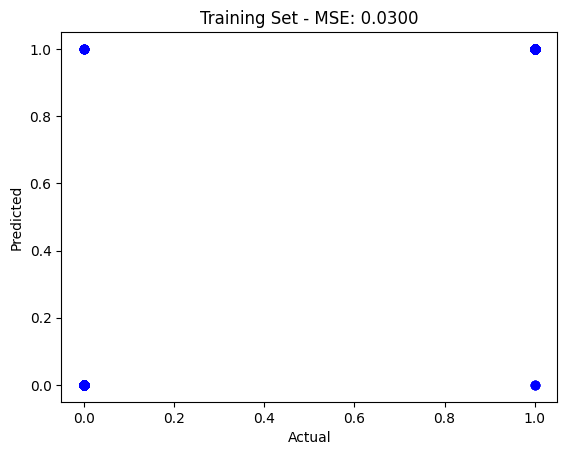

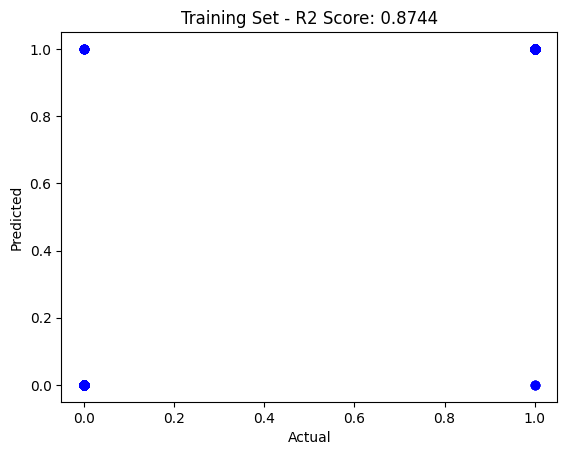

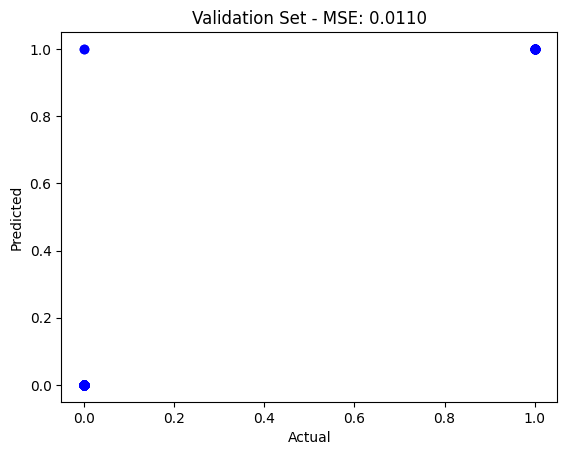

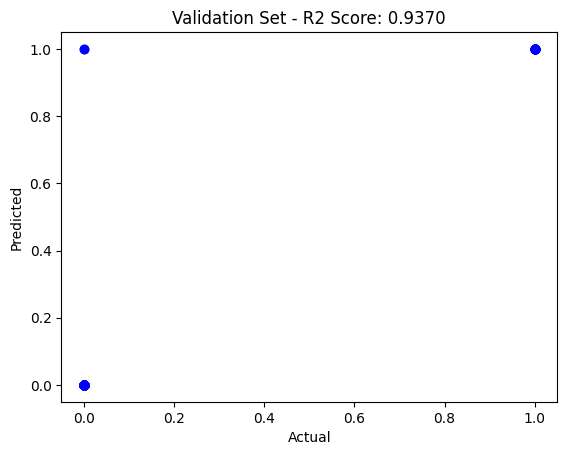

In [55]:
#Logistic Regression, Cross-Entropy Cost function, Stochastic Gradient DEscent using 
#also L2 regularization, with also MSE and R2, here lambda=1, and the learning rate is modified from
#0.01 to 0.1
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, mean_squared_error, r2_score
import itertools

np.set_printoptions(threshold=np.inf)

%matplotlib inline

class LogisticRegressionWithL2:
    def __init__(self, X, y, learning_rate=0.1, iterations=1000, l2_lambda=1):
        self.X = X
        self.y = y
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.l2_lambda = l2_lambda
        self.theta = None
        self.loss_history = []

    def sigmoid(self, Z):
        return 1 / (1 + np.exp(-Z))

    def loss(self, h, y, theta):
        reg_term = (self.l2_lambda / (2 * y.size)) * np.sum(np.square(theta[1:]))
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean() + reg_term

    def fit(self):
        self.theta = np.zeros(self.X.shape[1])

        for i in range(self.iterations):
            Z = np.dot(self.X, self.theta)
            h = self.sigmoid(Z)
            gradient = (np.dot(self.X.T, (h - self.y)) + self.l2_lambda * self.theta) / self.y.size
            gradient[0] -= self.l2_lambda * self.theta[0]  # Don't regularize the bias term
            self.theta -= self.learning_rate * gradient

            loss = self.loss(h, self.y, self.theta)
            self.loss_history.append(loss)

            if i % 500 == 0:
                print(f'Iteration {i}, Loss: {loss}')

    def predict(self, X, threshold=0.5):
        Z = np.dot(X, self.theta)
        h = self.sigmoid(Z)
        return (h > threshold).astype(int)

    def evaluate(self, X, y, threshold=0.5):
        predictions = self.predict(X, threshold)
        accuracy = (predictions == y).mean()
        return accuracy


def plotCf(a, b, t):
    cf = confusion_matrix(a, b)
    plt.imshow(cf, cmap=plt.cm.Blues, interpolation='nearest')
    plt.colorbar()
    plt.title(t)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    tick_marks = np.arange(len(set(a)))  # length of classes
    class_labels = ['0', '1']
    plt.xticks(tick_marks, class_labels)
    plt.yticks(tick_marks, class_labels)
    thresh = cf.max() / 2.
    for i, j in itertools.product(range(cf.shape[0]), range(cf.shape[1])):
        plt.text(j, i, format(cf[i, j], 'd'), horizontalalignment='center', color='white' if cf[i, j] > thresh else 'black')
    plt.show()

def plotMSE(y, y_pred, title):
    mse = mean_squared_error(y, y_pred)
    plt.figure()
    plt.plot(y, y_pred, 'bo')
    plt.title(f'{title} - MSE: {mse:.4f}')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.show()

def plotR2(y, y_pred, title):
    r2 = r2_score(y, y_pred)
    plt.figure()
    plt.plot(y, y_pred, 'bo')
    plt.title(f'{title} - R2 Score: {r2:.4f}')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.show()

# Load and preprocess the dataset
df = pd.read_csv('data1.csv', header=None)
df = df[~df[6].isin(['?'])]
df = df.astype(float)
df.iloc[:, 10].replace(2, 0, inplace=True)
df.iloc[:, 10].replace(4, 1, inplace=True)

scaled_df = df
names = df.columns[0:10]
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df.iloc[:, 0:10])
scaled_df = pd.DataFrame(scaled_df, columns=names)

x = scaled_df.iloc[0:500, 1:10].values
y = df.iloc[0:500, 10].values

xval = scaled_df.iloc[501:683, 1:10].values
yval = df.iloc[501:683, 10].values

# Train the Logistic Regression model
lr_with_l2 = LogisticRegressionWithL2(x, y, l2_lambda=0.001)
lr_with_l2.fit()

# Make predictions on the training set and validation set
pred_train_with_l2 = lr_with_l2.predict(x)
pred_val_with_l2 = lr_with_l2.predict(xval)

# Evaluate the model
train_accuracy_with_l2 = lr_with_l2.evaluate(x, y)
val_accuracy_with_l2 = lr_with_l2.evaluate(xval, yval)

print(f"Training Accuracy (with L2 regularization): {train_accuracy_with_l2}")
print(f"Validation Accuracy (with L2 regularization): {val_accuracy_with_l2}")

# Plot confusion matrices
plotCf(y, pred_train_with_l2, 'Confusion Matrix - Training Set')
plotCf(yval, pred_val_with_l2, 'Confusion Matrix - Validation Set')

# Calculate and plot MSE and R2 for training and validation sets
plotMSE(y, pred_train_with_l2, 'Training Set')
plotR2(y, pred_train_with_l2, 'Training Set')
plotMSE(yval, pred_val_with_l2, 'Validation Set')
plotR2(yval, pred_val_with_l2, 'Validation Set')

Iteration 0, Loss: 0.6931481433260852
Iteration 500, Loss: 0.10671755711391134
Training Accuracy (with L2 regularization): 0.968
Validation Accuracy (with L2 regularization): 0.989010989010989


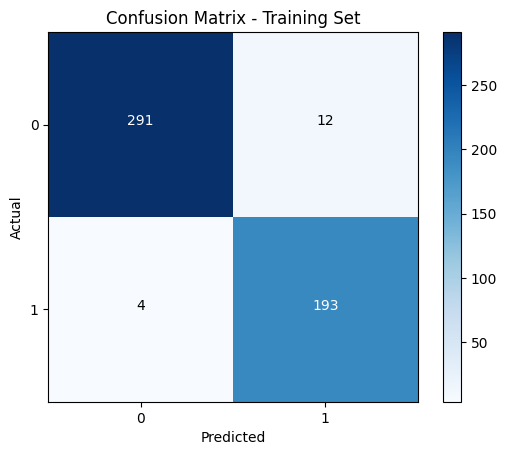

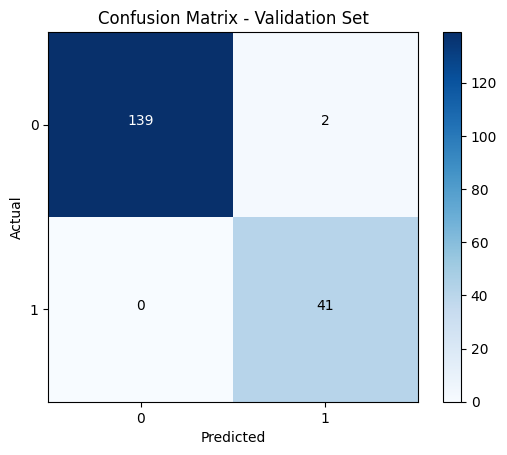

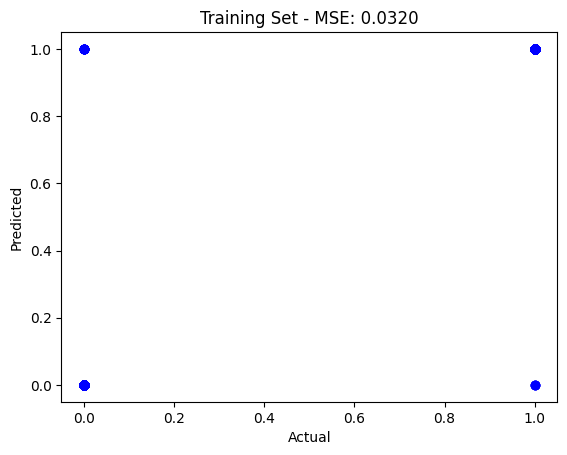

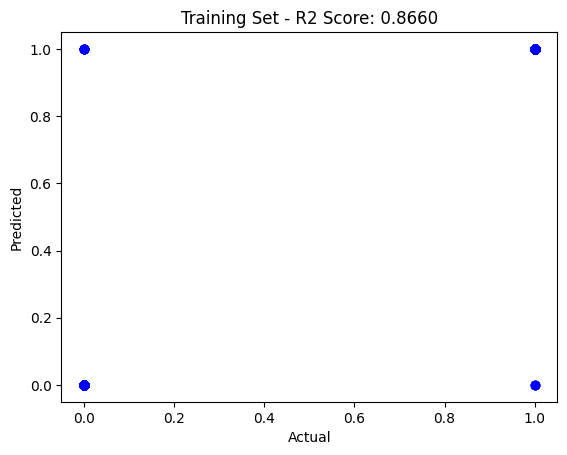

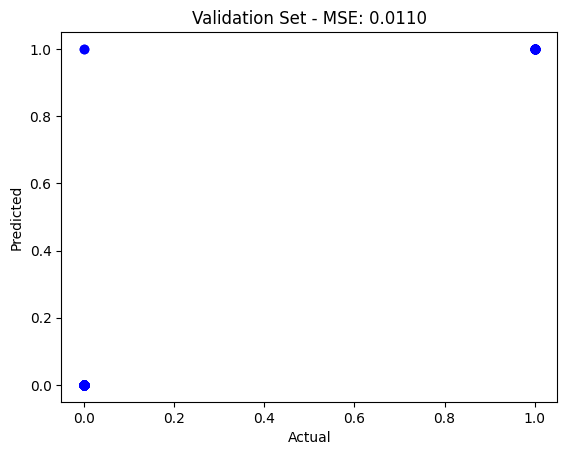

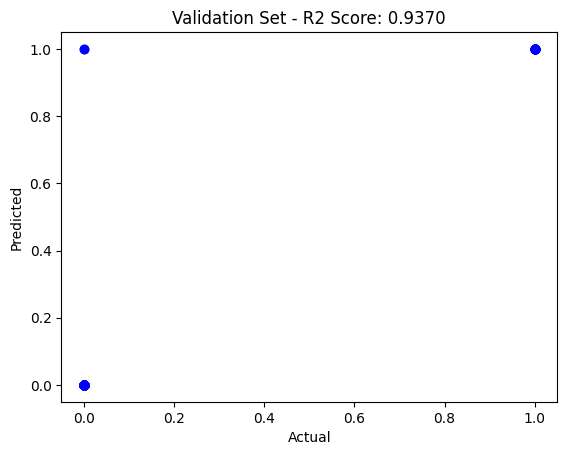

In [65]:
#Logistic Regression, Cross-Entropy Cost function, Stochastic Gradient DEscent using 
#also L2 regularization, with also MSE and R2, here lambda=1, and the learning rate is modified from
#0.1 to 1
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, mean_squared_error, r2_score
import itertools

np.set_printoptions(threshold=np.inf)

%matplotlib inline

class LogisticRegressionWithL2:
    def __init__(self, X, y, learning_rate=1, iterations=1000, l2_lambda=1):
        self.X = X
        self.y = y
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.l2_lambda = l2_lambda
        self.theta = None
        self.loss_history = []

    def sigmoid(self, Z):
        return 1 / (1 + np.exp(-Z))

    def loss(self, h, y, theta):
        reg_term = (self.l2_lambda / (2 * y.size)) * np.sum(np.square(theta[1:]))
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean() + reg_term

    def fit(self):
        self.theta = np.zeros(self.X.shape[1])

        for i in range(self.iterations):
            Z = np.dot(self.X, self.theta)
            h = self.sigmoid(Z)
            gradient = (np.dot(self.X.T, (h - self.y)) + self.l2_lambda * self.theta) / self.y.size
            gradient[0] -= self.l2_lambda * self.theta[0]  # Don't regularize the bias term
            self.theta -= self.learning_rate * gradient

            loss = self.loss(h, self.y, self.theta)
            self.loss_history.append(loss)

            if i % 500 == 0:
                print(f'Iteration {i}, Loss: {loss}')

    def predict(self, X, threshold=0.5):
        Z = np.dot(X, self.theta)
        h = self.sigmoid(Z)
        return (h > threshold).astype(int)

    def evaluate(self, X, y, threshold=0.5):
        predictions = self.predict(X, threshold)
        accuracy = (predictions == y).mean()
        return accuracy


def plotCf(a, b, t):
    cf = confusion_matrix(a, b)
    plt.imshow(cf, cmap=plt.cm.Blues, interpolation='nearest')
    plt.colorbar()
    plt.title(t)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    tick_marks = np.arange(len(set(a)))  # length of classes
    class_labels = ['0', '1']
    plt.xticks(tick_marks, class_labels)
    plt.yticks(tick_marks, class_labels)
    thresh = cf.max() / 2.
    for i, j in itertools.product(range(cf.shape[0]), range(cf.shape[1])):
        plt.text(j, i, format(cf[i, j], 'd'), horizontalalignment='center', color='white' if cf[i, j] > thresh else 'black')
    plt.show()

def plotMSE(y, y_pred, title):
    mse = mean_squared_error(y, y_pred)
    plt.figure()
    plt.plot(y, y_pred, 'bo')
    plt.title(f'{title} - MSE: {mse:.4f}')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.show()

def plotR2(y, y_pred, title):
    r2 = r2_score(y, y_pred)
    plt.figure()
    plt.plot(y, y_pred, 'bo')
    plt.title(f'{title} - R2 Score: {r2:.4f}')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.show()

# Load and preprocess the dataset
df = pd.read_csv('data1.csv', header=None)
df = df[~df[6].isin(['?'])]
df = df.astype(float)
df.iloc[:, 10].replace(2, 0, inplace=True)
df.iloc[:, 10].replace(4, 1, inplace=True)

scaled_df = df
names = df.columns[0:10]
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df.iloc[:, 0:10])
scaled_df = pd.DataFrame(scaled_df, columns=names)

x = scaled_df.iloc[0:500, 1:10].values
y = df.iloc[0:500, 10].values

xval = scaled_df.iloc[501:683, 1:10].values
yval = df.iloc[501:683, 10].values

# Train the Logistic Regression model
lr_with_l2 = LogisticRegressionWithL2(x, y, l2_lambda=0.001)
lr_with_l2.fit()

# Make predictions on the training set and validation set
pred_train_with_l2 = lr_with_l2.predict(x)
pred_val_with_l2 = lr_with_l2.predict(xval)

# Evaluate the model
train_accuracy_with_l2 = lr_with_l2.evaluate(x, y)
val_accuracy_with_l2 = lr_with_l2.evaluate(xval, yval)

print(f"Training Accuracy (with L2 regularization): {train_accuracy_with_l2}")
print(f"Validation Accuracy (with L2 regularization): {val_accuracy_with_l2}")

# Plot confusion matrices
plotCf(y, pred_train_with_l2, 'Confusion Matrix - Training Set')
plotCf(yval, pred_val_with_l2, 'Confusion Matrix - Validation Set')

# Calculate and plot MSE and R2 for training and validation sets
plotMSE(y, pred_train_with_l2, 'Training Set')
plotR2(y, pred_train_with_l2, 'Training Set')
plotMSE(yval, pred_val_with_l2, 'Validation Set')
plotR2(yval, pred_val_with_l2, 'Validation Set')

Iteration 0, Loss: 0.6931471805609082
Iteration 500, Loss: 0.39788271082186333
Training Accuracy (with L2 regularization): 0.964
Validation Accuracy (with L2 regularization): 0.989010989010989


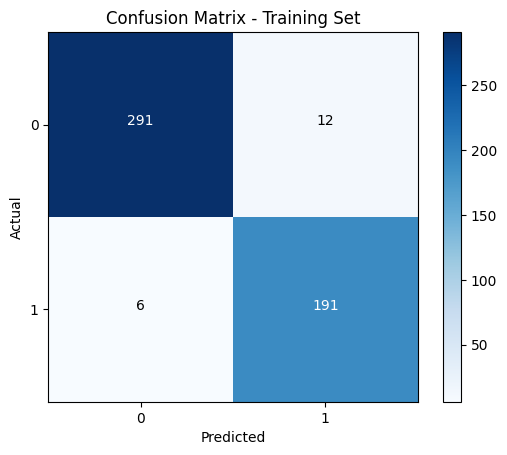

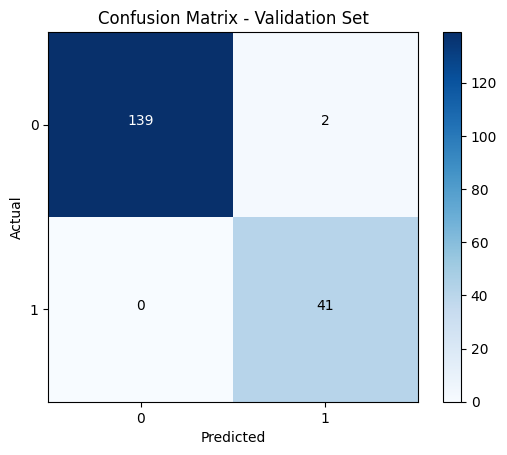

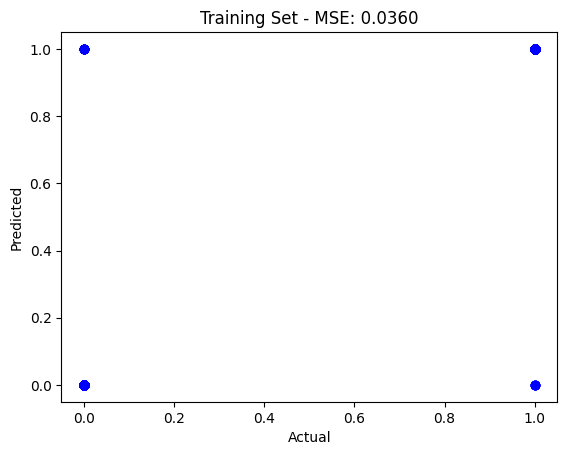

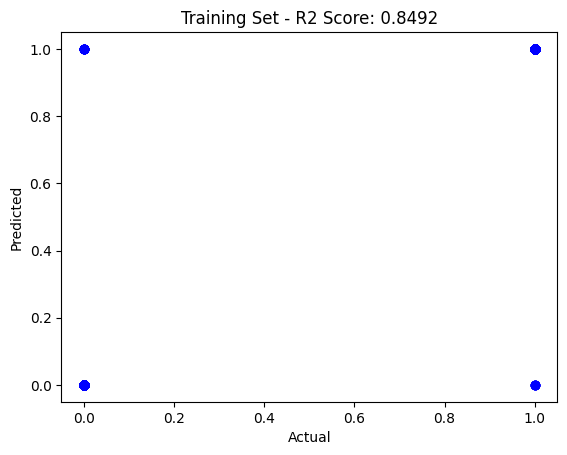

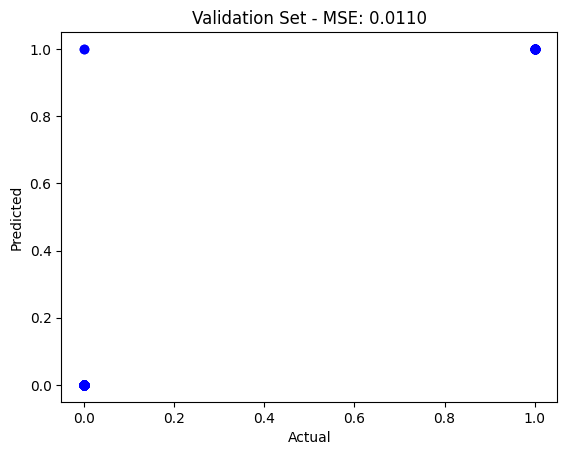

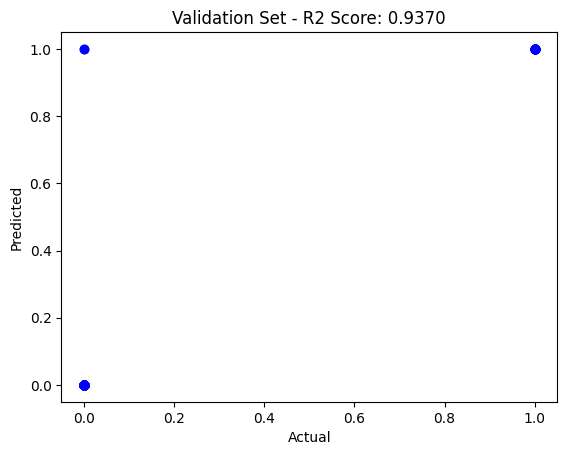

In [66]:
#Logistic Regression, Cross-Entropy Cost function, Stochastic Gradient DEscent using 
#also L2 regularization, with also MSE and R2, here lambda=1, and the learning rate is modified from
#0.01 to 0.001
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, mean_squared_error, r2_score
import itertools

np.set_printoptions(threshold=np.inf)

%matplotlib inline

class LogisticRegressionWithL2:
    def __init__(self, X, y, learning_rate=0.001, iterations=1000, l2_lambda=1):
        self.X = X
        self.y = y
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.l2_lambda = l2_lambda
        self.theta = None
        self.loss_history = []

    def sigmoid(self, Z):
        return 1 / (1 + np.exp(-Z))

    def loss(self, h, y, theta):
        reg_term = (self.l2_lambda / (2 * y.size)) * np.sum(np.square(theta[1:]))
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean() + reg_term

    def fit(self):
        self.theta = np.zeros(self.X.shape[1])

        for i in range(self.iterations):
            Z = np.dot(self.X, self.theta)
            h = self.sigmoid(Z)
            gradient = (np.dot(self.X.T, (h - self.y)) + self.l2_lambda * self.theta) / self.y.size
            gradient[0] -= self.l2_lambda * self.theta[0]  # Don't regularize the bias term
            self.theta -= self.learning_rate * gradient

            loss = self.loss(h, self.y, self.theta)
            self.loss_history.append(loss)

            if i % 500 == 0:
                print(f'Iteration {i}, Loss: {loss}')

    def predict(self, X, threshold=0.5):
        Z = np.dot(X, self.theta)
        h = self.sigmoid(Z)
        return (h > threshold).astype(int)

    def evaluate(self, X, y, threshold=0.5):
        predictions = self.predict(X, threshold)
        accuracy = (predictions == y).mean()
        return accuracy


def plotCf(a, b, t):
    cf = confusion_matrix(a, b)
    plt.imshow(cf, cmap=plt.cm.Blues, interpolation='nearest')
    plt.colorbar()
    plt.title(t)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    tick_marks = np.arange(len(set(a)))  # length of classes
    class_labels = ['0', '1']
    plt.xticks(tick_marks, class_labels)
    plt.yticks(tick_marks, class_labels)
    thresh = cf.max() / 2.
    for i, j in itertools.product(range(cf.shape[0]), range(cf.shape[1])):
        plt.text(j, i, format(cf[i, j], 'd'), horizontalalignment='center', color='white' if cf[i, j] > thresh else 'black')
    plt.show()

def plotMSE(y, y_pred, title):
    mse = mean_squared_error(y, y_pred)
    plt.figure()
    plt.plot(y, y_pred, 'bo')
    plt.title(f'{title} - MSE: {mse:.4f}')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.show()

def plotR2(y, y_pred, title):
    r2 = r2_score(y, y_pred)
    plt.figure()
    plt.plot(y, y_pred, 'bo')
    plt.title(f'{title} - R2 Score: {r2:.4f}')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.show()

# Load and preprocess the dataset
df = pd.read_csv('data1.csv', header=None)
df = df[~df[6].isin(['?'])]
df = df.astype(float)
df.iloc[:, 10].replace(2, 0, inplace=True)
df.iloc[:, 10].replace(4, 1, inplace=True)

scaled_df = df
names = df.columns[0:10]
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df.iloc[:, 0:10])
scaled_df = pd.DataFrame(scaled_df, columns=names)

x = scaled_df.iloc[0:500, 1:10].values
y = df.iloc[0:500, 10].values

xval = scaled_df.iloc[501:683, 1:10].values
yval = df.iloc[501:683, 10].values

# Train the Logistic Regression model
lr_with_l2 = LogisticRegressionWithL2(x, y, l2_lambda=0.001)
lr_with_l2.fit()

# Make predictions on the training set and validation set
pred_train_with_l2 = lr_with_l2.predict(x)
pred_val_with_l2 = lr_with_l2.predict(xval)

# Evaluate the model
train_accuracy_with_l2 = lr_with_l2.evaluate(x, y)
val_accuracy_with_l2 = lr_with_l2.evaluate(xval, yval)

print(f"Training Accuracy (with L2 regularization): {train_accuracy_with_l2}")
print(f"Validation Accuracy (with L2 regularization): {val_accuracy_with_l2}")

# Plot confusion matrices
plotCf(y, pred_train_with_l2, 'Confusion Matrix - Training Set')
plotCf(yval, pred_val_with_l2, 'Confusion Matrix - Validation Set')

# Calculate and plot MSE and R2 for training and validation sets
plotMSE(y, pred_train_with_l2, 'Training Set')
plotR2(y, pred_train_with_l2, 'Training Set')
plotMSE(yval, pred_val_with_l2, 'Validation Set')
plotR2(yval, pred_val_with_l2, 'Validation Set')

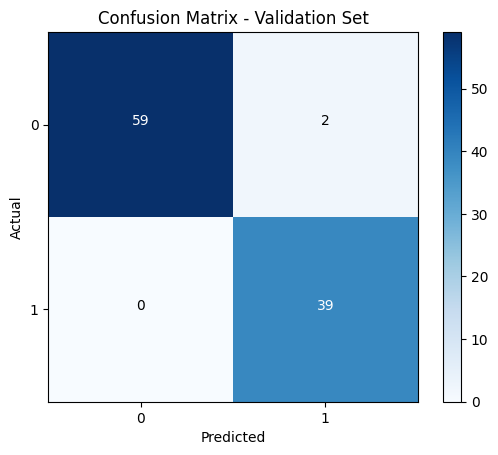

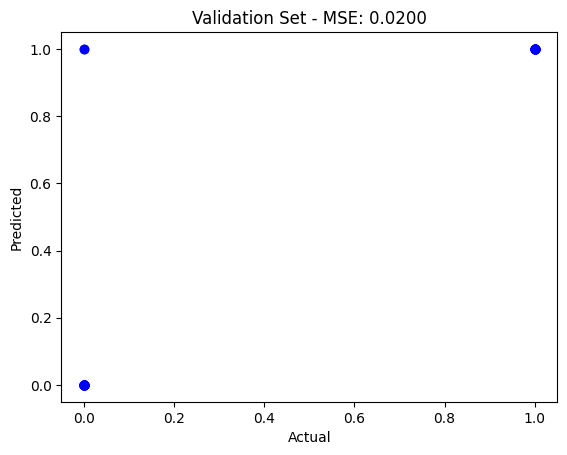

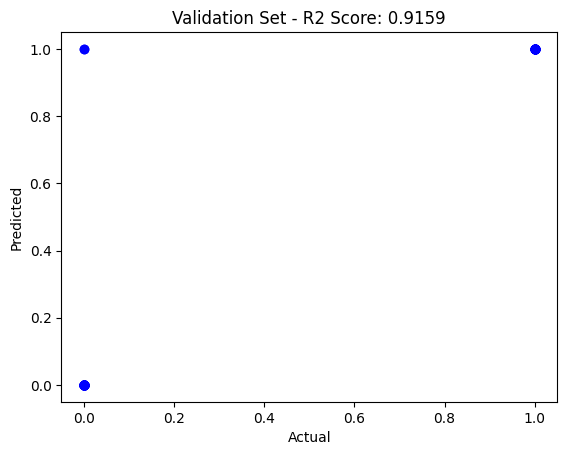

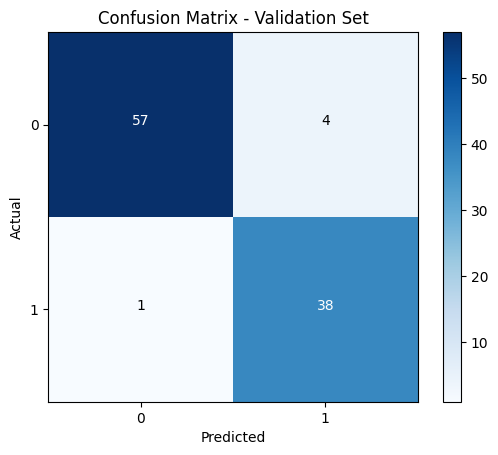

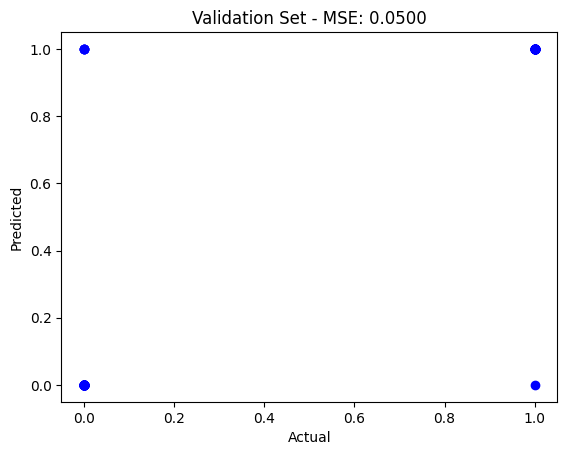

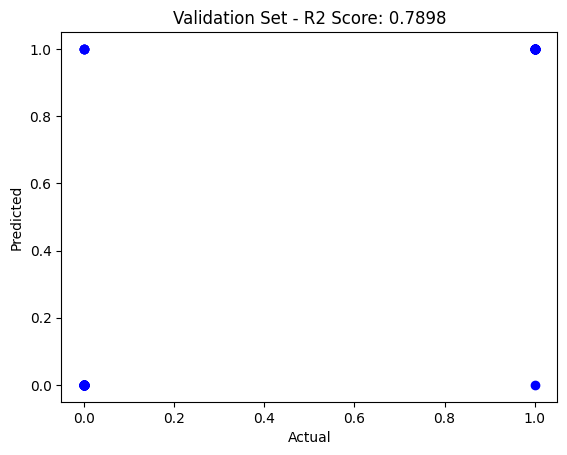

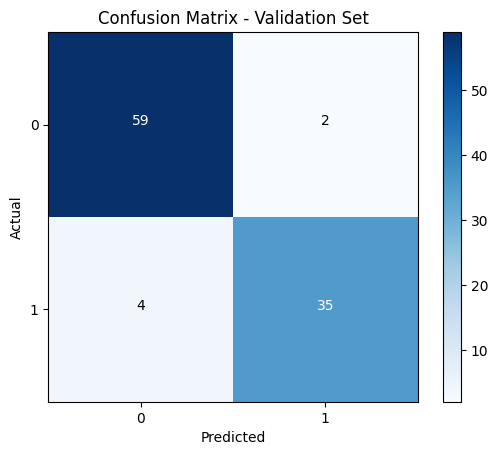

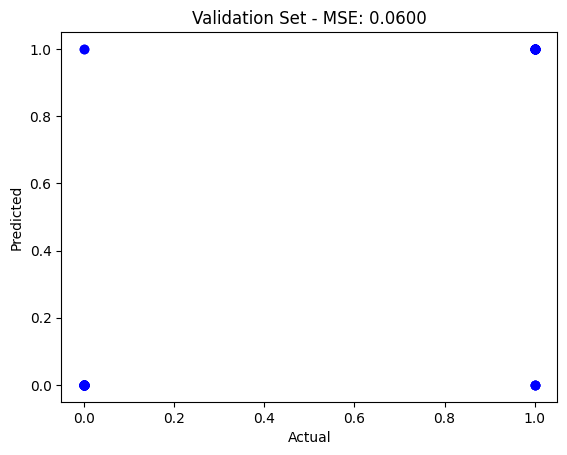

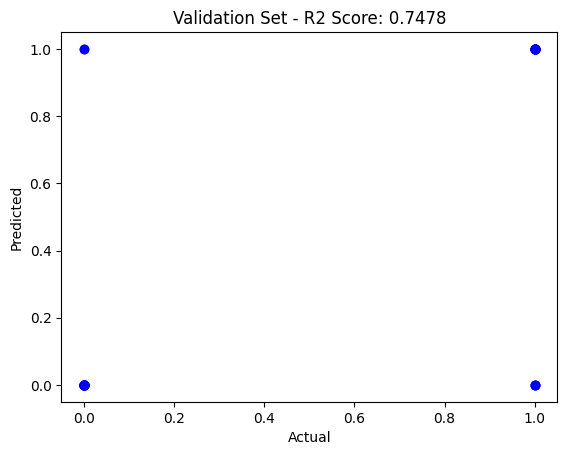

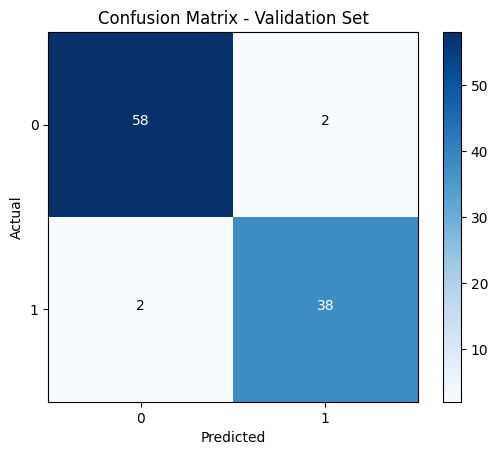

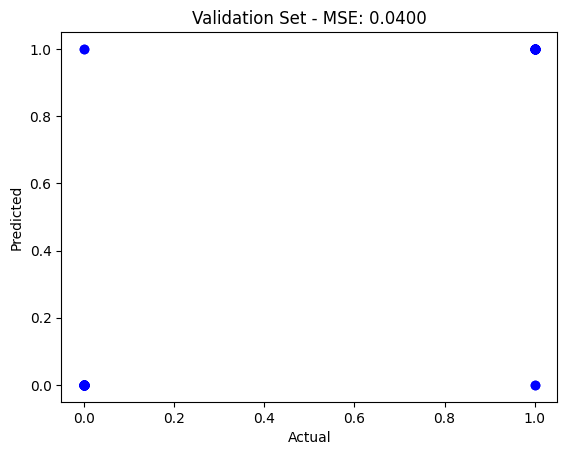

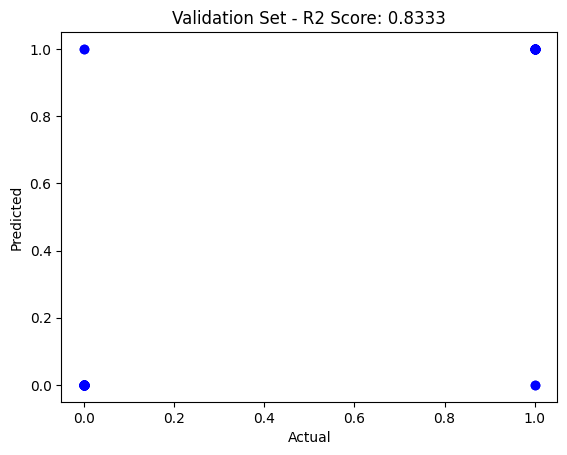

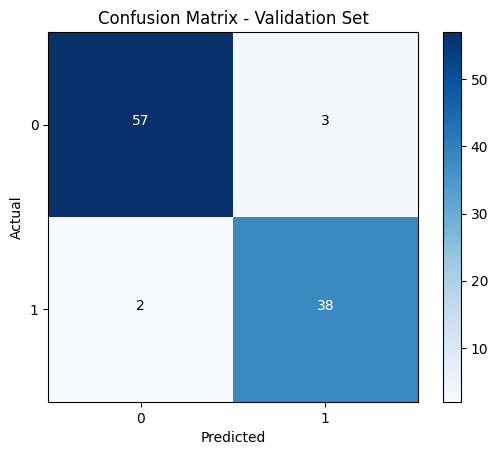

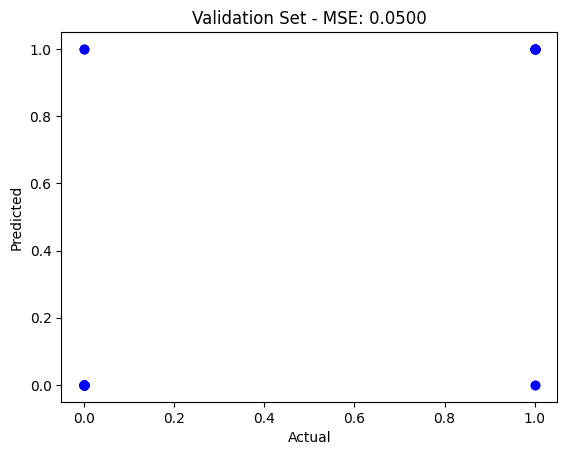

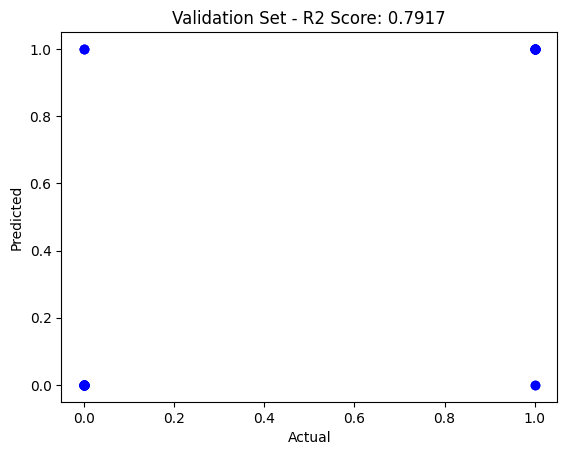

Cross-Validation Accuracy: 0.9560
Cross-Validation MSE: 0.0440
Cross-Validation R2: 0.8157


In [68]:
#Cross-Validated the Logistic Regression with learning rate=1:
#Increasing the learning rate to 1 (which previously gave better results than a lower learning rate)
#but at the same time decreasing the L2 term.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, mean_squared_error, r2_score
from sklearn.model_selection import StratifiedKFold
import itertools

np.set_printoptions(threshold=np.inf)

%matplotlib inline

def plotCf(a, b, t):
    cf = confusion_matrix(a, b)
    plt.imshow(cf, cmap=plt.cm.Blues, interpolation='nearest')
    plt.colorbar()
    plt.title(t)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    tick_marks = np.arange(len(set(a)))  # length of classes
    class_labels = ['0', '1']
    plt.xticks(tick_marks, class_labels)
    plt.yticks(tick_marks, class_labels)
    thresh = cf.max() / 2.
    for i, j in itertools.product(range(cf.shape[0]), range(cf.shape[1])):
        plt.text(j, i, format(cf[i, j], 'd'), horizontalalignment='center', color='white' if cf[i, j] > thresh else 'black')

def plotMSE(y, y_pred, title):
    mse = mean_squared_error(y, y_pred)
    plt.figure()
    plt.plot(y, y_pred, 'bo')
    plt.title(f'{title} - MSE: {mse:.4f}')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')

def plotR2(y, y_pred, title):
    r2 = r2_score(y, y_pred)
    plt.figure()
    plt.plot(y, y_pred, 'bo')
    plt.title(f'{title} - R2 Score: {r2:.4f}')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')

class LogisticRegressionWithL2:
    def __init__(self, X, y, learning_rate=1, iterations=1000, l2_lambda=0.001):
        self.X = X
        self.y = y
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.l2_lambda = l2_lambda
        self.theta = None
        self.loss_history = []

    def fit(self):
        self.theta = np.zeros(self.X.shape[1])

        for i in range(self.iterations):
            Z = np.dot(self.X, self.theta)
            h = 1 / (1 + np.exp(-Z))
            gradient = (np.dot(self.X.T, (h - self.y)) + self.l2_lambda * self.theta) / self.y.size
            gradient[0] -= self.l2_lambda * self.theta[0]  # Don't regularize the bias term
            self.theta -= self.learning_rate * gradient

    def predict(self, X, threshold=0.5):
        Z = np.dot(X, self.theta)
        h = 1 / (1 + np.exp(-Z))
        return (h > threshold).astype(int)

    def evaluate(self, X, y, threshold=0.5):
        predictions = self.predict(X, threshold)
        accuracy = (predictions == y).mean()
        return accuracy
    
    @staticmethod
    def cross_validation(X, y, k=5):
        skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
        accuracies = []
        mse_scores = []
        r2_scores = []

        for train_index, val_index in skf.split(X, y):
            X_train, X_val = X[train_index], X[val_index]
            y_train, y_val = y[train_index], y[val_index]

            lr_with_l2 = LogisticRegressionWithL2(X_train, y_train, l2_lambda=0.001)
            lr_with_l2.fit()

            val_accuracy = lr_with_l2.evaluate(X_val, y_val)
            accuracies.append(val_accuracy)

            y_pred = lr_with_l2.predict(X_val)
            mse = mean_squared_error(y_val, y_pred)
            mse_scores.append(mse)

            r2 = r2_score(y_val, y_pred)
            r2_scores.append(r2)

            # Plot confusion matrix, MSE, and R2
            plotCf(y_val, y_pred, 'Confusion Matrix - Validation Set')
            plt.show()
            plotMSE(y_val, y_pred, 'Validation Set')
            plt.show()
            plotR2(y_val, y_pred, 'Validation Set')
            plt.show()

        return np.mean(accuracies), np.mean(mse_scores), np.mean(r2_scores)

# Load and preprocess the dataset
df = pd.read_csv('data1.csv', header=None)
df = df[~df[6].isin(['?'])]
df = df.astype(float)
df.iloc[:, 10].replace(2, 0, inplace=True)
df.iloc[:, 10].replace(4, 1, inplace=True)

scaled_df = df
names = df.columns[0:10]
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df.iloc[:, 0:10])
scaled_df = pd.DataFrame(scaled_df, columns=names)

X = scaled_df.iloc[0:500, 1:10].values
y = df.iloc[0:500, 10].values

# Apply cross-validation
cv_accuracy, cv_mse, cv_r2 = LogisticRegressionWithL2.cross_validation(X, y, k=5)

print(f"Cross-Validation Accuracy: {cv_accuracy:.4f}")
print(f"Cross-Validation MSE: {cv_mse:.4f}")
print(f"Cross-Validation R2: {cv_r2:.4f}")